In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import utilities.msmr as msmr
import utilities.plotting as mp

from collections import Counter
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from scipy.optimize import fmin_slsqp
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter as sf

plt.style.use('default')

<a id='top'></a>

### Index
1. [Analyzing All Datasets](#Analyzing-The-Experimental-Datasets)
1. [Half Cell Models](#Half-Cell-Models)
1. [Fresh Cell Fit and Comparisons](#Fresh-Cell-Fit-and-Comparisons)
1. [Fitting 300 and 600 Cycles](#Fitting-300-and-600-Cycles)
7. [Individual Electrodes Over Cycling](#Individual-Electrodes-Over-Cycling)
2. [0 Cycle Replicate Fitting](#0-Cycle-Replicate-Fitting)
3. [300 Cycles Replicate Fitting](#300-Cycles-Replicate-Fitting)
4. [600 Cycles Replicate Fitting](#600-Cycles-Replicate-Fitting)
5. [Reaction Peaks Over Cycling](#Reaction-Peaks-Over-Cycling)
7. [Bootstrap Analysis](#Bootstrap-Analysis)
8. [Discharged Fitting Results](#Discharged-Fitting-Results)

<a id= 'Analyzing-The-Experimental-Datasets'></a>

## Analyzing The Experimental Datasets

<p>&nbsp;</p>

[Back To Top](#top)

Importing all data for the three representative cases and going through the data to look at hysteresis, variation in cell capacities, and how reproducible the C/20 curves are amongst replicates. The data for the charge and discharge data are imported in separately

In [2]:
# Loading in voltage, current, capacity, dvdq, and the interpolated values for each cell
voltage_range_c = np.linspace(3.49, 4.15, 1000)
folderpath = '../supplementary-files/experimental-data/'
# 0 Cycles
fresh_voltage_51, fresh_current_51, fresh_capacity_51, fresh_dvdq_51, data_cap_interp_51, data_dvdq_interp_51 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell51.csv', 0.075, 10, 99, voltage_range_c) 
fresh_voltage_52, fresh_current_52, fresh_capacity_52, fresh_dvdq_52, data_cap_interp_52, data_dvdq_interp_52 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell52.csv', 0.075, 10, 99, voltage_range_c)
fresh_voltage_53, fresh_current_53, fresh_capacity_53, fresh_dvdq_53, data_cap_interp_53, data_dvdq_interp_53 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell53.csv', 0.075, 10, 99, voltage_range_c) 
fresh_voltage_54, fresh_current_54, fresh_capacity_54, fresh_dvdq_54, data_cap_interp_54, data_dvdq_interp_54 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell54.csv', 0.075, 10, 99, voltage_range_c) 

# 300 Cycles
aged_300_voltage_1, aged_300_current_1, aged_300_capacity_1, aged_300_dvdq_1, a300_data_cap_interp_1, a300_data_dvdq_interp_1 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell1.csv', 0.075, 10, 99, voltage_range_c) 
aged_300_voltage_2, aged_300_current_2, aged_300_capacity_2, aged_300_dvdq_2, a300_data_cap_interp_2, a300_data_dvdq_interp_2 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell2.csv', 0.075, 10, 99, voltage_range_c) 
aged_300_voltage_3, aged_300_current_3, aged_300_capacity_3, aged_300_dvdq_3, a300_data_cap_interp_3, a300_data_dvdq_interp_3 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell3.csv', 0.075, 10, 99, voltage_range_c) 
aged_300_voltage_4, aged_300_current_4, aged_300_capacity_4, aged_300_dvdq_4, a300_data_cap_interp_4, a300_data_dvdq_interp_4 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell4.csv', 0.075, 10, 99, voltage_range_c) 

# 600 Cycles
aged_600_voltage_49, aged_600_current_49, aged_600_capacity_49, aged_600_dvdq_49, a600_data_cap_interp_49, a600_data_dvdq_interp_49 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell49.csv', 0.075, 10, 99, voltage_range_c)
aged_600_voltage_50, aged_600_current_50, aged_600_capacity_50, aged_600_dvdq_50, a600_data_cap_interp_50, a600_data_dvdq_interp_50 = msmr.load_experiment_data(folderpath+'OCV_estimation_charge_Cell50.csv', 0.075, 10, 99, voltage_range_c)

In [3]:
# Loading in voltage, current, capacity, dvdq, and the interpolated values for each cell
voltage_range_d = np.linspace(3.44, 4.15, 1000)

# 0 Cycles
fresh_voltage_51d, fresh_current_51d, fresh_capacity_51d, fresh_dvdq_51d, data_cap_interp_51d, data_dvdq_interp_51d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell51.csv', 0.075, 10, 99, voltage_range_d, False) 
fresh_voltage_52d, fresh_current_52d, fresh_capacity_52d, fresh_dvdq_52d, data_cap_interp_52d, data_dvdq_interp_52d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell52.csv', 0.075, 10, 99, voltage_range_d, False) 
fresh_voltage_53d, fresh_current_53d, fresh_capacity_53d, fresh_dvdq_53d, data_cap_interp_53d, data_dvdq_interp_53d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell53.csv', 0.075, 10, 99, voltage_range_d, False) 
fresh_voltage_54d, fresh_current_54d, fresh_capacity_54d, fresh_dvdq_54d, data_cap_interp_54d, data_dvdq_interp_54d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell54.csv', 0.075, 10, 99, voltage_range_d, False) 

# 300 Cycles
aged_300_voltage_1d, aged_300_current_1d, aged_300_capacity_1d, aged_300_dvdq_1d, a300_data_cap_interp_1d, a300_data_dvdq_interp_1d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell1.csv', 0.075, 10, 99, voltage_range_d, False) 
aged_300_voltage_2d, aged_300_current_2d, aged_300_capacity_2d, aged_300_dvdq_2d, a300_data_cap_interp_2d, a300_data_dvdq_interp_2d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell2.csv', 0.075, 10, 99, voltage_range_d, False) 
aged_300_voltage_3d, aged_300_current_3d, aged_300_capacity_3d, aged_300_dvdq_3d, a300_data_cap_interp_3d, a300_data_dvdq_interp_3d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell3.csv', 0.075, 10, 99, voltage_range_d, False) 
aged_300_voltage_4d, aged_300_current_4d, aged_300_capacity_4d, aged_300_dvdq_4d, a300_data_cap_interp_4d, a300_data_dvdq_interp_4d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell4.csv', 0.075, 10, 99, voltage_range_d, False) 

# 600 Cycles
aged_600_voltage_49d, aged_600_current_49d, aged_600_capacity_49d, aged_600_dvdq_49d, a600_data_cap_interp_49d, a600_data_dvdq_interp_49d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell49.csv', 0.075, 10, 99, voltage_range_d, False)
aged_600_voltage_50d, aged_600_current_50d, aged_600_capacity_50d, aged_600_dvdq_50d, a600_data_cap_interp_50d, a600_data_dvdq_interp_50d = msmr.load_experiment_data(folderpath+'OCV_estimation_discharge_Cell50.csv', 0.075, 10, 99, voltage_range_d, False)

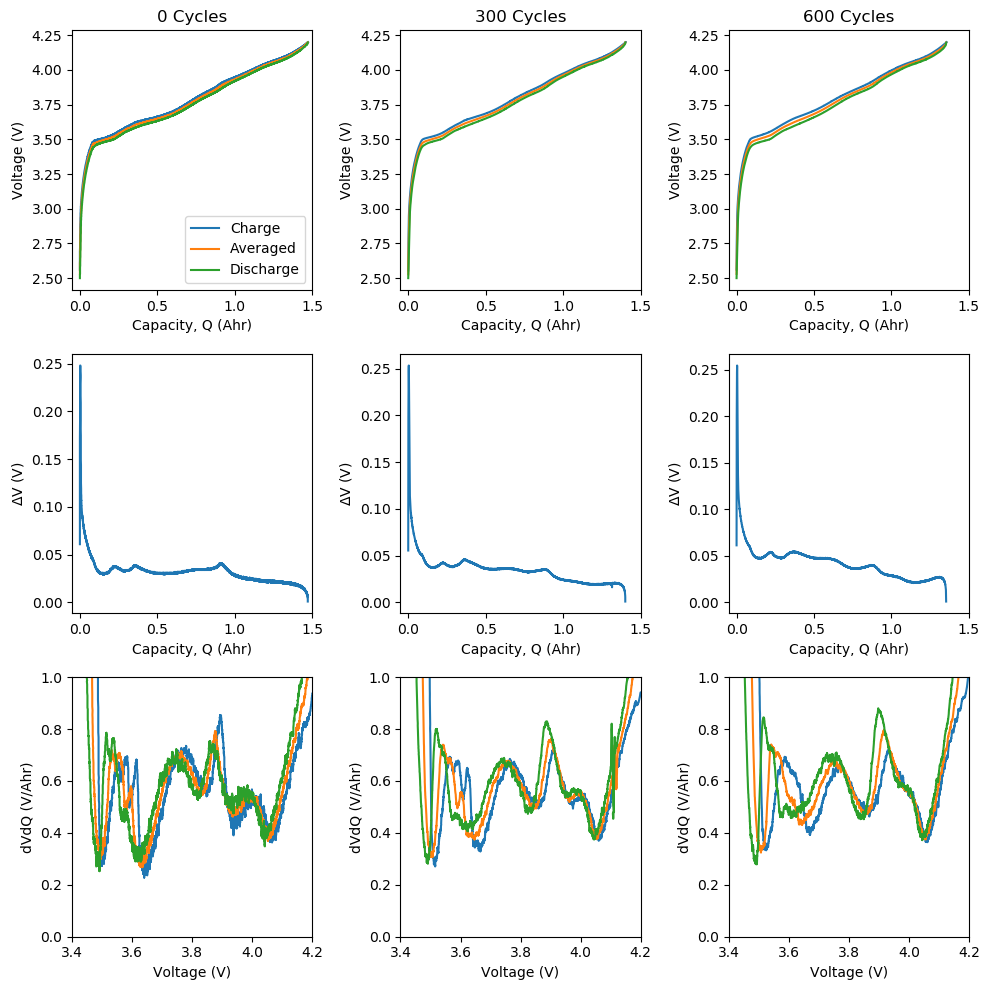

In [4]:
# Plotting fresh, 300, and 600 cycles OCV and dVdQ curves for both charge
# and discharge and the average value between the them.

def interp_data(capacity_data, voltage_data, voltage_range):
    dvdt_data = sf(x=voltage_data, window_length=99, polyorder=3, deriv=1, delta=10)
    dvdq_data = dvdt_data / (0.075/3600)
    f_cap_interp = interp1d(voltage_data, capacity_data)
    f_dvdq_interp = interp1d(voltage_data, dvdq_data)
    return dvdq_data, f_cap_interp(voltage_range), f_dvdq_interp(voltage_range)

fresh_voltage_51a = (fresh_voltage_51[0:len(fresh_capacity_51d)] + fresh_voltage_51d)/2
aged_300_voltage_1a = (aged_300_voltage_1[0:len(aged_300_capacity_1d)] + aged_300_voltage_1d)/2
aged_600_voltage_49a = (aged_600_voltage_49[0:len(aged_600_capacity_49d)] + aged_600_voltage_49d)/2

fresh_dvdq_51a, data_avg_cap_interp, data_avg_dvdq_interp = interp_data(fresh_capacity_51d, fresh_voltage_51a, voltage_range_d)
aged_300_dvdq_1a, data_300_avg_cap_interp_1, data_300_avg_dvdq_interp_1 = interp_data(aged_300_capacity_1d, aged_300_voltage_1a, voltage_range_d)
aged_600_dvdq_49a, data_600_avg_cap_interp_49, data_600_avg_dvdq_interp_49 = interp_data(aged_600_capacity_49d, aged_600_voltage_49a, voltage_range_d)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
ax[0,0].plot(fresh_capacity_51, fresh_voltage_51, label='Charge')
ax[0,0].plot(fresh_capacity_51d, fresh_voltage_51a, label='Averaged')
ax[0,0].plot(fresh_capacity_51d, fresh_voltage_51d, label='Discharge')
ax[0,0].legend(loc=4)

ax[0,1].plot(aged_300_capacity_1, aged_300_voltage_1)
ax[0,1].plot(aged_300_capacity_1d, aged_300_voltage_1a)
ax[0,1].plot(aged_300_capacity_1d, aged_300_voltage_1d)

ax[0,2].plot(aged_600_capacity_49, aged_600_voltage_49)
ax[0,2].plot(aged_600_capacity_49d, aged_600_voltage_49a)
ax[0,2].plot(aged_600_capacity_49d, aged_600_voltage_49d)

ax[1,0].plot(fresh_capacity_51d, fresh_voltage_51[0:len(fresh_voltage_51d)]-fresh_voltage_51d)
ax[1,1].plot(aged_300_capacity_1d, aged_300_voltage_1[0:len(aged_300_voltage_1d)]-aged_300_voltage_1d)
ax[1,2].plot(aged_600_capacity_49d, aged_600_voltage_49[0:len(aged_600_voltage_49d)]-aged_600_voltage_49d)

ax[2,0].plot(fresh_voltage_51, fresh_dvdq_51, label='Charge')
ax[2,0].plot(fresh_voltage_51a, fresh_dvdq_51a, label='Averaged')
ax[2,0].plot(fresh_voltage_51d, fresh_dvdq_51d, label='Discharge')

ax[2,1].plot(aged_300_voltage_1, aged_300_dvdq_1)
ax[2,1].plot(aged_300_voltage_1a, aged_300_dvdq_1a)
ax[2,1].plot(aged_300_voltage_1d, aged_300_dvdq_1d)

ax[2,2].plot(aged_600_voltage_49, aged_600_dvdq_49)
ax[2,2].plot(aged_600_voltage_49a, aged_600_dvdq_49a)
ax[2,2].plot(aged_600_voltage_49d, aged_600_dvdq_49d)

cycles = [0, 300, 600]
for i in range(0,3):
    ax[0,i].set_title(str(cycles[int(i)]) + ' Cycles')
    ax[0,i].set_ylabel('Voltage (V)')
    ax[1,i].set_ylabel(r'$\Delta$V (V)')
    ax[2,i].set_xlabel('Voltage (V)')
    ax[2,i].set_ylabel('dVdQ (V/Ahr)')
    ax[2,i].set_xlim(3.4, 4.2)
    ax[2,i].set_ylim(0, 1)
    for j in range(0,2):
        ax[j,i].set_xlim(-0.05, 1.5)
        ax[j,i].set_xlabel('Capacity, Q (Ahr)')
        
plt.tight_layout()

Text(0, 0.5, 'Capacity (Ahr)')

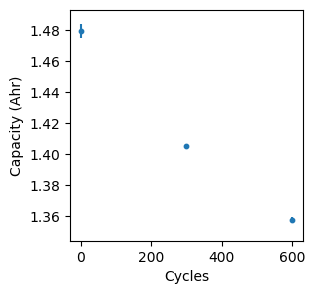

In [5]:
# Compiling the mean capacities and standard deviations at 0, 300, and 600 cycle cells
fresh_capacities = np.array([fresh_capacity_51.max(),fresh_capacity_52.max(), fresh_capacity_53.max(),fresh_capacity_54.max()])
fresh_capacities_avg, fresh_capacities_std = np.mean(fresh_capacities), np.std(fresh_capacities)

aged300_capacities = np.array([aged_300_capacity_1.max(), aged_300_capacity_2.max(),aged_300_capacity_3.max(), aged_300_capacity_4.max()])
aged300_capacities_avg, aged300_capacities_std = np.mean(aged300_capacities), np.std(aged300_capacities)

aged600_capacities = np.array([aged_600_capacity_49.max(),aged_600_capacity_50.max()])
aged600_capacities_avg, aged600_capacities_std = np.mean(aged600_capacities), np.std(aged600_capacities)

cycles = [0, 300, 600]
cap_avgs = [fresh_capacities_avg, aged300_capacities_avg, aged600_capacities_avg]
cap_stds = [fresh_capacities_std, aged300_capacities_std, aged600_capacities_std]

# Plotting
fig = plt.figure(figsize = (3,3))
plt.scatter(x=cycles, y=cap_avgs,s=10)
plt.errorbar(x=cycles, y=cap_avgs, xerr=None, yerr=cap_stds, fmt='none')

plt.xlabel('Cycles')
plt.ylabel('Capacity (Ahr)')

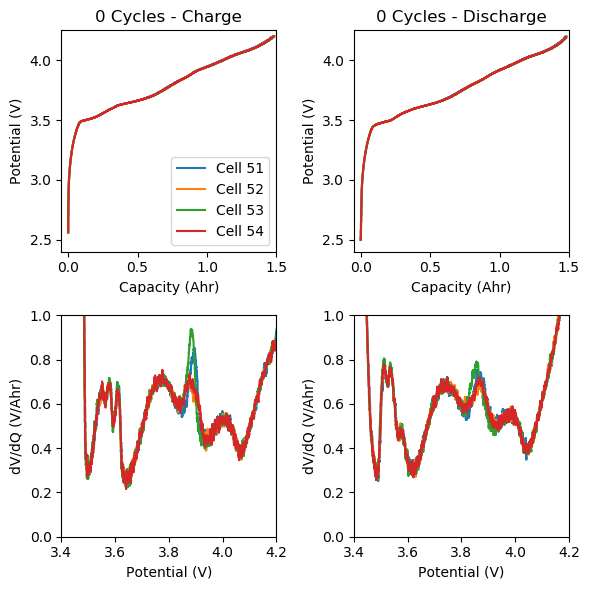

In [6]:
# Comparing capacity and differential voltage for each replicate of the 0 cycle cells
fresh_capacity_c_list = [fresh_capacity_51, fresh_capacity_52, fresh_capacity_53, fresh_capacity_54]
fresh_voltage_c_list = [fresh_voltage_51, fresh_voltage_52, fresh_voltage_53, fresh_voltage_54]
fresh_dvdq_c_list = [fresh_dvdq_51, fresh_dvdq_52, fresh_dvdq_53, fresh_dvdq_54]

fresh_capacity_d_list = [fresh_capacity_51d, fresh_capacity_52d, fresh_capacity_53d, fresh_capacity_54d]
fresh_voltage_d_list = [fresh_voltage_51d, fresh_voltage_52d, fresh_voltage_53d, fresh_voltage_54d]
fresh_dvdq_d_list = [fresh_dvdq_51d, fresh_dvdq_52d, fresh_dvdq_53d, fresh_dvdq_54d]
labels = ['Cell 51', 'Cell 52', 'Cell 53', 'Cell 54']

fig = plt.figure(figsize = (6,6))
ax, ax2, ax3, ax4 = fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)

for i in (ax, ax2):
    i.set_xlabel('Capacity (Ahr)')
    i.set_ylabel('Potential (V)')
    i.set_xlim(-0.05, 1.5)
    i.set_ylim(2.4, 4.25)
    
for i in (ax3, ax4):
    i.set_xlim(3.4, 4.2)
    i.set_ylim(0,1)
    i.set_xlabel('Potential (V)')
    i.set_ylabel('dV/dQ (V/Ahr)')

for i in range(0,len(fresh_capacity_c_list)):
    ax.plot(fresh_capacity_c_list[i], fresh_voltage_c_list[i], label=labels[i])
    ax2.plot(fresh_capacity_d_list[i], fresh_voltage_d_list[i], label=labels[i])    
    ax3.plot(fresh_voltage_c_list[i], fresh_dvdq_c_list[i], label=labels[i])
    ax4.plot(fresh_voltage_d_list[i], fresh_dvdq_d_list[i], label=labels[i])

ax.legend(loc=4)
ax.set_title('0 Cycles - Charge')
ax2.set_title('0 Cycles - Discharge')
plt.tight_layout()

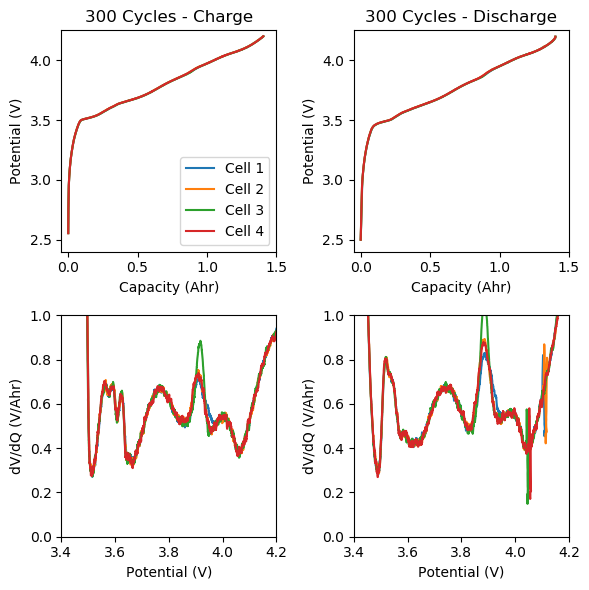

In [7]:
# Comparing capacity and differential voltage for each replicate of the 300 cycle cells
aged_300_capacity_c_list = [aged_300_capacity_1, aged_300_capacity_2, aged_300_capacity_3, aged_300_capacity_4]
aged_300_voltage_c_list = [aged_300_voltage_1, aged_300_voltage_2, aged_300_voltage_3, aged_300_voltage_4]
aged_300_dvdq_c_list = [aged_300_dvdq_1, aged_300_dvdq_2, aged_300_dvdq_3, aged_300_dvdq_4]

aged_300_capacity_d_list = [aged_300_capacity_1d, aged_300_capacity_2d, aged_300_capacity_3d, aged_300_capacity_4d]
aged_300_voltage_d_list = [aged_300_voltage_1d, aged_300_voltage_2d, aged_300_voltage_3d, aged_300_voltage_4d]
aged_300_dvdq_d_list = [aged_300_dvdq_1d, aged_300_dvdq_2d, aged_300_dvdq_3d, aged_300_dvdq_4d]
labels = ['Cell 1', 'Cell 2', 'Cell 3', 'Cell 4']

fig = plt.figure(figsize = (6,6))
ax, ax2, ax3, ax4 = fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)

for i in (ax, ax2):
    i.set_xlabel('Capacity (Ahr)')
    i.set_ylabel('Potential (V)')
    i.set_xlim(-0.05, 1.5)
    i.set_ylim(2.4, 4.25)
    
for i in (ax3, ax4):
    i.set_xlim(3.4, 4.2)
    i.set_ylim(0,1)
    i.set_xlabel('Potential (V)')
    i.set_ylabel('dV/dQ (V/Ahr)')

for i in range(0,len(aged_300_capacity_c_list)):
    ax.plot(aged_300_capacity_c_list[i], aged_300_voltage_c_list[i], label=labels[i])
    ax2.plot(aged_300_capacity_d_list[i], aged_300_voltage_d_list[i], label=labels[i])    
    ax3.plot(aged_300_voltage_c_list[i], aged_300_dvdq_c_list[i], label=labels[i])
    ax4.plot(aged_300_voltage_d_list[i], aged_300_dvdq_d_list[i], label=labels[i])

ax.legend(loc=4)
ax.set_title('300 Cycles - Charge')
ax2.set_title('300 Cycles - Discharge')
plt.tight_layout()

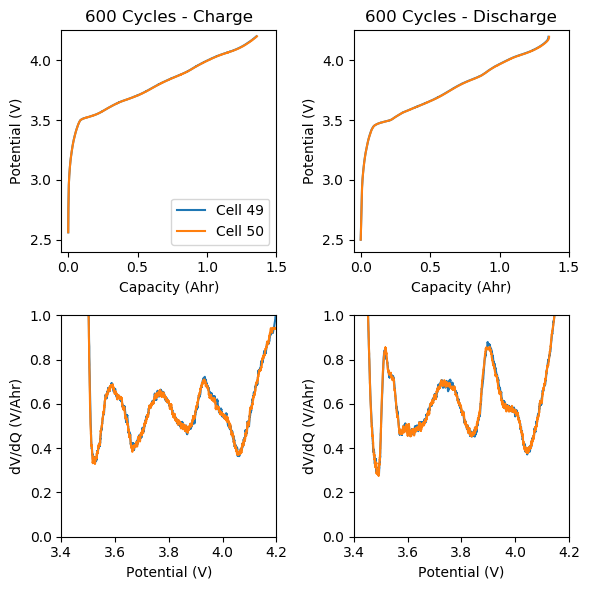

In [8]:
# Comparing capacity and differential voltage for each replicate of the 600 cycle cells
aged_600_capacity_c_list = [aged_600_capacity_49, aged_600_capacity_50]
aged_600_voltage_c_list = [aged_600_voltage_49, aged_600_voltage_50]
aged_600_dvdq_c_list = [aged_600_dvdq_49, aged_600_dvdq_50]

aged_600_capacity_d_list = [aged_600_capacity_49d, aged_600_capacity_50d]
aged_600_voltage_d_list = [aged_600_voltage_49d, aged_600_voltage_50d]
aged_600_dvdq_d_list = [aged_600_dvdq_49d, aged_600_dvdq_50d]
labels = ['Cell 49', 'Cell 50']

fig = plt.figure(figsize = (6,6))
ax, ax2, ax3, ax4 = fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)

for i in (ax, ax2):
    i.set_xlabel('Capacity (Ahr)')
    i.set_ylabel('Potential (V)')
    i.set_xlim(-0.05, 1.5)
    i.set_ylim(2.4, 4.25)
    
for i in (ax3, ax4):
    i.set_xlim(3.4, 4.2)
    i.set_ylim(0,1)
    i.set_xlabel('Potential (V)')
    i.set_ylabel('dV/dQ (V/Ahr)')

for i in range(0,len(aged_600_capacity_c_list)):
    ax.plot(aged_600_capacity_c_list[i], aged_600_voltage_c_list[i], label=labels[i])
    ax2.plot(aged_600_capacity_d_list[i], aged_600_voltage_d_list[i], label=labels[i])    
    ax3.plot(aged_600_voltage_c_list[i], aged_600_dvdq_c_list[i], label=labels[i])
    ax4.plot(aged_600_voltage_d_list[i], aged_600_dvdq_d_list[i], label=labels[i])
    
ax.legend(loc=4)
ax.set_title('600 Cycles - Charge')
ax2.set_title('600 Cycles - Discharge')
plt.tight_layout()

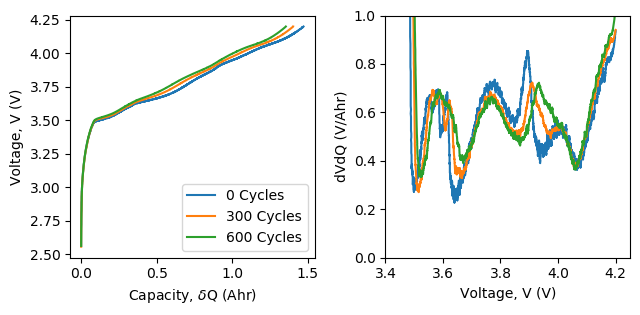

In [9]:
fig = plt.figure(figsize=(6.5,3.25))
ax, ax2 = fig.add_subplot(121), fig.add_subplot(122)

ax.plot(fresh_capacity_51, fresh_voltage_51, label='0 Cycles')
ax.plot(aged_300_capacity_1, aged_300_voltage_1, label='300 Cycles')
ax.plot(aged_600_capacity_49, aged_600_voltage_49, label='600 Cycles')

ax2.plot(fresh_voltage_51, fresh_dvdq_51)
ax2.plot(aged_300_voltage_1, aged_300_dvdq_1)
ax2.plot(aged_600_voltage_49, aged_600_dvdq_49)

ax.set_xlabel('Capacity, $\delta$Q (Ahr)')
ax.set_ylabel('Voltage, V (V)')
ax.legend()

ax2.set_xlabel('Voltage, V (V)')
ax2.set_ylabel('dVdQ (V/Ahr)')
ax2.set_xlim(3.4, 4.25)
ax2.set_ylim(0,1)

plt.tight_layout()

fig.savefig('../figures/Figures SI/Cycle_Comparison_Charged.png', dpi = 300)

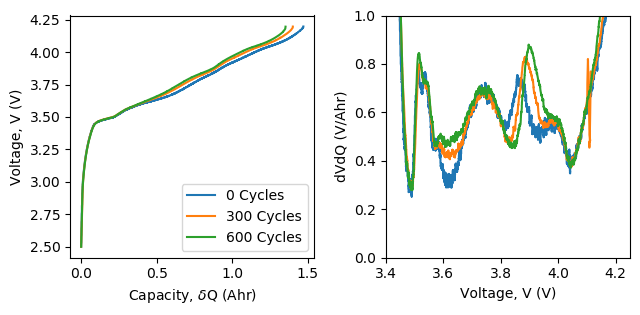

In [10]:
fig = plt.figure(figsize=(6.5,3.25))
ax, ax2 = fig.add_subplot(121), fig.add_subplot(122)

ax.plot(fresh_capacity_51d, fresh_voltage_51d, label='0 Cycles')
ax.plot(aged_300_capacity_1d, aged_300_voltage_1d, label='300 Cycles')
ax.plot(aged_600_capacity_49d, aged_600_voltage_49d, label='600 Cycles')

ax2.plot(fresh_voltage_51d, fresh_dvdq_51d)
ax2.plot(aged_300_voltage_1d, aged_300_dvdq_1d)
ax2.plot(aged_600_voltage_49d, aged_600_dvdq_49d)

ax.set_xlabel('Capacity, $\delta$Q (Ahr)')
ax.set_ylabel('Voltage, V (V)')
ax.legend()

ax2.set_xlabel('Voltage, V (V)')
ax2.set_ylabel('dVdQ (V/Ahr)')
ax2.set_xlim(3.4, 4.25)
ax2.set_ylim(0,1)

plt.tight_layout()

fig.savefig('../figures/Figures SI/Cycle_Comparison_Discharged.png', dpi = 300)

<a id='Half-Cell-Models'></a>

## Half Cell Models
<p>&nbsp;</p>

[Back To Top](#top)

In [11]:
# Assuming NMC capacity is ~ 180 mAh, LiMNO is 130
# We collected XRD and EPS data to show us that our electrodes are roughly 66% NMC and 34% LMO
# From measurements, we estimate true insertion positive electrode capacity to be 1.8 Ahr.
# Assuming an N-P Ratio of 1.1

nmc_cap, lmo_cap = 200, 120 # mAh/g # , 120 mAh/g # Source = Nitta (2017)
nmc_mass_percent, lmo_mass_percent = 0.66, 0.34
pos_q, n_p, nor_pos, nor_neg  = 1.8, 1.1, 6, 6
neg_q = pos_q*n_p

nmc_cap_percent = (nmc_mass_percent*nmc_cap)/(nmc_mass_percent*nmc_cap + lmo_mass_percent*lmo_cap)
lmo_cap_percent = (lmo_mass_percent*lmo_cap)/(nmc_mass_percent*nmc_cap + lmo_mass_percent*lmo_cap)

# Base parameters from Verbrugge et al. (2017)
blend_matrix = np.array([3.62274, 0.13442*nmc_cap_percent*pos_q, 0.96710,
                         3.72645, 0.32460*nmc_cap_percent*pos_q, 1.39712,
                         3.90575, 0.21118*nmc_cap_percent*pos_q, 3.50500,
                         4.22955, 0.32980*nmc_cap_percent*pos_q, 5.52757,
                         4.01173, 0.55070*lmo_cap_percent*pos_q, 1.52000,
                         4.14902, 0.44930*lmo_cap_percent*pos_q, 0.93000])

graphite_matrix = np.array([0.08843, 0.43336*neg_q, 0.08611,
                            0.12799, 0.23963*neg_q, 0.08009,
                            0.14331, 0.15018*neg_q, 0.72469,
                            0.16984, 0.05462*neg_q, 2.53277,
                            0.21446, 0.06744*neg_q, 0.09470,
                            0.36325, 0.05476*neg_q, 5.97354])

# Total parameter matrix
params = np.append(blend_matrix.flatten(), graphite_matrix.flatten())

Visualizing electrode reactions and the underlying reactions that make up the summed curves

G:\My Drive\A- Research\github\msmr-whole-cell-manuscript\jupyter\utilities\msmr.py:87: RuntimeWarning: overflow encountered in square
  dxjdu = (-Xj/w)*((f*np.exp(f*(U-U0)/w))/(1+np.exp(f*(U-U0)/w))**2)


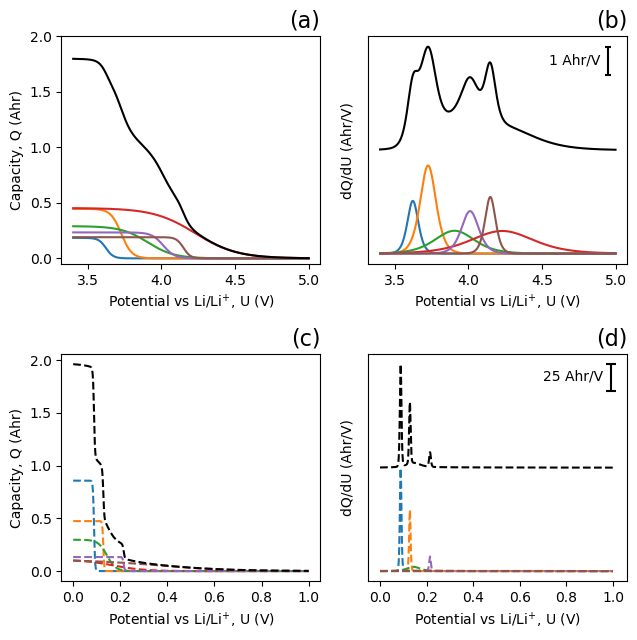

In [12]:
p_vrange = np.linspace(3.4, 5, 500)
n_vrange = np.linspace(0, 1, 500)

indvd_rxn_caps, indvd_rxn_dqdus = {}, {}
indvd_rxn_caps['pos'], indvd_rxn_caps['neg'] = {}, {}
indvd_rxn_dqdus['pos'], indvd_rxn_dqdus['neg'] = {}, {}
# For this case, we are using one for loop since nor_pos = nor_neg
# Solving for each qj, and dqjdu for each reaction and storing them in dictionary for easier recall
for i in range(0, nor_pos):
    indvd_rxn_caps['pos'][i+1], indvd_rxn_dqdus['pos'][i+1] = msmr.individual_reactions(p_vrange,
                                                                                        blend_matrix[0+(i*3)],
                                                                                        blend_matrix[1+(i*3)],
                                                                                        blend_matrix[2+(i*3)], 298)
    indvd_rxn_caps['neg'][i+1], indvd_rxn_dqdus['neg'][i+1] = msmr.individual_reactions(n_vrange,
                                                                                        graphite_matrix[0+(i*3)],
                                                                                        graphite_matrix[1+(i*3)],
                                                                                        graphite_matrix[2+(i*3)], 298)
# Calculating electrode response using the same parameters for easier recall
pos_whole = msmr.electrode_response(blend_matrix, 298, 3.4, 5, 6)
neg_whole = msmr.electrode_response(graphite_matrix, 298, 0, 1, 6)

# Plotting
fig = plt.figure(figsize = (6.5, 6.5))
ax1, ax2, ax3, ax4 = fig.add_subplot(221),fig.add_subplot(222),fig.add_subplot(223),fig.add_subplot(224)
axes=[ax1, ax2, ax3, ax4]
labels=['(a)', '(b)', '(c)', '(d)']

# Using plotting function to create figure
mp.all_electrode_curves(p_vrange, indvd_rxn_caps['pos'], indvd_rxn_dqdus['pos'], ax1, ax2, pos_whole,
                     True, 1, 4.55, 4.95, 4.949)
mp.all_electrode_curves(n_vrange, indvd_rxn_caps['neg'], indvd_rxn_dqdus['neg'], ax3, ax4, neg_whole,
                     False, 25, 0.7, 0.99, 0.991)

for idx, ax in enumerate(axes):
    ax.set_title(labels[idx], fontsize=16, loc='right')

ax1.set_ylim(-0.05,2)
ax1.set_yticks([0, 0.5, 1, 1.5, 2])

fig.tight_layout()

# plt.savefig('../figures/Figure 1/Figure1.eps', dpi = 300, format='eps')
# plt.savefig('../figures/Figure 1/Figure1.pdf', dpi = 300, format='pdf')
# plt.savefig('../figures/Figure 1/Figure1.png', dpi = 300, format='png')

### Initial Whole Cell MSMR Model

How to do this (Density of States Figure but meeting constraints)

* Break down the code to get the positive and negative electrode solvers
* Set usable capacity and set pos_lower_li_limit
* Iterate to see where neg_lower_li_limit would be to satisfy V_model(dQ=0) = V_exp(dQ=0)
* Then add usable capacity to both, find the voltages, and then see what the V_model(dQ=1.48 Ahr) is
* Iterate through and plot

* If a pos_lower_li_limit is found that satisfies the conditions, then use that and make the density of states-looking plot with that.
* If feeling spicy like you have time, try it with varying Q_tot_pos and pos_lower_li_limit, and draw a 2D plot with that and see if there's a well.


0.185 0.001


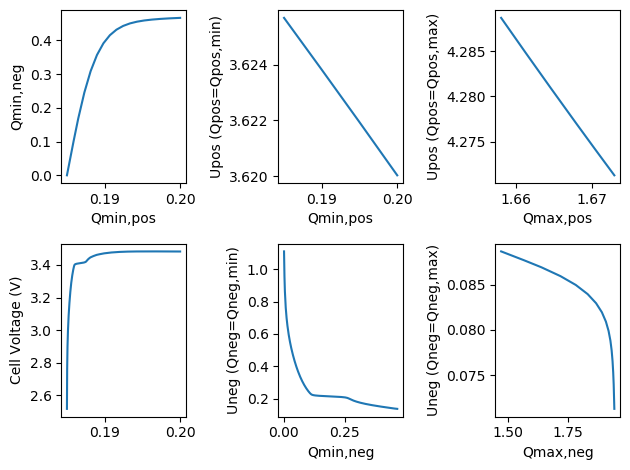

In [13]:
usable_cap = fresh_capacity_51.max()
lower_v_limit = fresh_voltage_51.min()
upper_v_limit = fresh_voltage_51.max()
blend_volt, blend_cap, blend_dqdu = pos_whole
graph_volt, graph_cap, graph_dqdu = neg_whole
f_pos_cap_interp = interp1d(blend_cap, blend_volt, fill_value='extrapolate')
f_neg_cap_interp = interp1d(graph_cap, graph_volt, fill_value='extrapolate')

f_pos_v_interp = interp1d(blend_volt, blend_cap, fill_value='extrapolate')
f_neg_v_interp = interp1d(graph_volt, graph_cap, fill_value='extrapolate')

pos_low_li_np = np.linspace(0.185, 0.2, 1000)

pos_low_li_lims, neg_low_li_lims = np.array([]), np.array([])
pos_high_li_lims, neg_high_li_lims = pos_low_li_lims + usable_cap, np.array([])
pos_upp_vs, neg_low_vs = np.array([]), np.array([])
pos_low_vs, neg_upp_vs = np.array([]), np.array([])
lower_voltages = np.array([])

for i in pos_low_li_np:
    pos_upper_v = f_pos_cap_interp(i+usable_cap) # Lower voltage because higher fill
    pos_lower_v = f_pos_cap_interp(i) # Higher voltage because lower fill
    neg_upper_v = pos_lower_v - upper_v_limit # Calculates 4.2 V
    if neg_upper_v < 0:
        pass
    elif neg_upper_v >= 0:
        neg_upper_q = f_neg_v_interp(neg_upper_v)
        neg_lower_q = neg_upper_q - usable_cap
        neg_lower_v = f_neg_cap_interp(neg_lower_q)
        min_v = pos_upper_v - neg_lower_v
    
        if neg_lower_q < 0:
            pass
        elif neg_lower_q >= 0:
            pos_low_li_lims = np.append(pos_low_li_lims, i)
            neg_low_li_lims = np.append(neg_low_li_lims, neg_lower_q)
            pos_high_li_lims = np.append(pos_high_li_lims, (i+usable_cap))
            neg_high_li_lims = np.append(neg_high_li_lims, neg_upper_q)
            neg_low_vs = np.append(neg_low_vs, neg_lower_v)
            neg_upp_vs = np.append(neg_upp_vs, neg_upper_v)
            pos_upp_vs = np.append(pos_upp_vs, pos_upper_v)
            pos_low_vs = np.append(pos_low_vs, pos_lower_v)
            lower_voltages = np.append(lower_voltages, min_v)

fig = plt.figure()
ax1, ax2, ax3 = fig.add_subplot(231), fig.add_subplot(232), fig.add_subplot(233), 
ax4, ax5, ax6 = fig.add_subplot(234), fig.add_subplot(235), fig.add_subplot(236) 
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

ax1.plot(pos_low_li_lims, neg_low_li_lims)
ax2.plot(pos_low_li_lims, pos_upp_vs)
ax3.plot(pos_high_li_lims, pos_low_vs)
ax4.plot(pos_low_li_lims, lower_voltages)
ax5.plot(neg_low_li_lims, neg_low_vs)
ax6.plot(neg_high_li_lims, neg_upp_vs)
    
ax1.set_ylabel('Qmin,neg')
ax1.set_xlabel('Qmin,pos')
ax2.set_xlabel('Qmin,pos')
ax2.set_ylabel('Upos (Qpos=Qpos,min)')
ax3.set_xlabel('Qmax,pos')
ax3.set_ylabel('Upos (Qpos=Qpos,max)')
ax4.set_ylabel('Cell Voltage (V)')
ax5.set_xlabel('Qmin,neg')
ax5.set_ylabel('Uneg (Qneg=Qneg,min)')
ax6.set_xlabel('Qmax,neg')
ax6.set_ylabel('Uneg (Qneg=Qneg,max)')
plt.tight_layout()

posin = interp1d(lower_voltages, pos_low_li_lims)
negin = interp1d(lower_voltages, neg_low_li_lims)

pos_lower_lim_c = np.round(posin(fresh_voltage_51.min()), 3)
neg_lower_lim_c = np.round(negin(fresh_voltage_51.min()), 3)
print(pos_lower_lim_c, neg_lower_lim_c)

C:\Users\victo\Anaconda3\envs\msmr\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


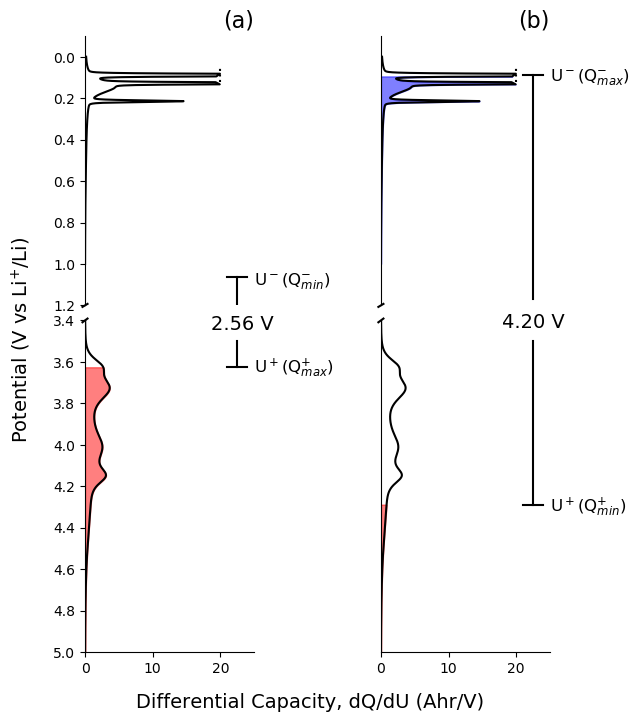

In [14]:
import matplotlib.gridspec as gridspec

# Setting up the whole plot, with the ylim being the ranges shown exclusive of the breaks
ylim, ylim2 = [1.2, -0.1], [5.0, 3.4]
ylimratio = (ylim[1]-ylim[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
ylim2ratio = (ylim2[1]-ylim2[0])/(ylim2[1]-ylim2[0]+ylim[1]-ylim[0])
gs = gridspec.GridSpec(2, 2, height_ratios=[ylimratio, ylim2ratio])
    
fig = plt.figure(figsize=(6,8))
ax, ax2 = fig.add_subplot(gs[0]),  fig.add_subplot(gs[2])
ax3, ax4 = fig.add_subplot(gs[1]), fig.add_subplot(gs[3])

ax.set_ylim(ylim)
ax2.set_ylim(ylim2)

# Solving the dQ/dUs and plotting
pos0_v, pos0_q, pos0_dqdu = msmr.electrode_response(blend_matrix, 298, 3.4, 5, 6)
neg0_v, neg0_q, neg0_dqdu = msmr.electrode_response(graphite_matrix, 298, 0, 1, 6, 5000)
mask = [-neg0_dqdu < 20]
for i in (ax, ax2, ax3, ax4):
    i.plot(-pos0_dqdu, pos0_v, 'k')
    i.plot(-neg0_dqdu[mask], neg0_v[mask], 'k')
    
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.set_xlim(0,25)
    
ax.set_ylim(ylim)
ax.set_xticks([])
ax2.set_ylim(ylim2)
ax2.set_xticks([0, 10, 20])
ax.spines['bottom'].set_visible(False)
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Putting in diagonals to denote the break in the y-axis
d = .015  # how big to make the diagonal lines in axes coordinates
d2 = 1.75
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d*0.375, +d*0.375), **kwargs)        # top-left diagonal
ax.plot((0.8, 0.8), (0.83, 0.89), ls=':', **kwargs) # Dashed line at x = 20 to denote breaking

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d*0.375, 1 + d*0.375), **kwargs)  # bottom-left diagonal

kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax3.plot((d2 - d, d2 + d), (-d*0.375, +d*0.375), **kwargs)        # top-left diagonal
ax3.plot((2.547, 2.547), (0.83, 0.89), ls=':', **kwargs) # Dashed line at x = 20 to denote breaking

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax4.plot((d2 - d, d2 + d), (1 - d*0.375, 1 + d*0.375), **kwargs)  # bottom-left diagonal

ax3.set_ylim(ylim)
ax3.set_xticks([])
ax4.set_ylim(ylim2)
ax4.set_xticks([0, 10, 20])
ax3.set_yticks([])
ax4.set_yticks([])
ax3.spines['bottom'].set_visible(False)
ax3.tick_params(labeltop=False)  # don't put tick labels at the top
ax4.xaxis.tick_bottom()

# Discharged
neg_lower_q_lim, neg_upper_q_lim = 0, 0.001 # Bounds of the shaded regions
vlim_l_nidx = np.argmin(abs(neg0_q-neg_lower_q_lim)) # Finds closest valued index for lower bound Q
vlim_u_nidx = np.argmin(abs(neg0_q-neg_upper_q_lim)) # Finds closest valued index for upper bound Q

pos_lower_q_lim, pos_upper_q_lim = 0, 0.185 + fresh_capacity_51.max()
vlim_l_pidx = np.argmin(abs(pos0_q-pos_lower_q_lim)) # Finds closest valued index for lower bound Q
vlim_u_pidx = np.argmin(abs(pos0_q-pos_upper_q_lim)) # Finds closest valued index for upper bound Q

y_neg_fill_dis = neg0_v[vlim_u_nidx:vlim_l_nidx]
y_pos_fill_dis = pos0_v[vlim_u_pidx:vlim_l_pidx]

# Charged
neg_upper_q_lim_cha = 0.001 + fresh_capacity_51.max()
vlim_u_nidx_cha = np.argmin(abs(neg0_q-neg_upper_q_lim_cha)) # Finds closest valued index for upper bound Q

pos_upper_q_lim_cha = 0.185
vlim_u_pidx_cha = np.argmin(abs(pos0_q-pos_upper_q_lim_cha)) # Finds closest valued index for upper bound Q

y_neg_fill_cha = neg0_v[vlim_u_nidx_cha:vlim_l_nidx]
y_pos_fill_cha = pos0_v[vlim_u_pidx_cha:vlim_l_pidx]

mask2 = -neg0_dqdu[vlim_u_nidx_cha:vlim_l_nidx] < 20 # Cuts off the dQdU of neg at 20 for ease of visualization
ax.fill_betweenx(y_neg_fill_dis, -neg0_dqdu[vlim_u_nidx:vlim_l_nidx], 0 , color = 'blue', alpha = 0.5)
ax2.fill_betweenx(y_pos_fill_dis, -pos0_dqdu[vlim_u_pidx:vlim_l_pidx], 0 , color = 'red', alpha = 0.5)

ax3.fill_betweenx(y_neg_fill_cha[mask2], -neg0_dqdu[vlim_u_nidx_cha:vlim_l_nidx][mask2], 0 , color = 'blue', alpha = 0.5)
ax4.fill_betweenx(y_pos_fill_cha, -pos0_dqdu[vlim_u_pidx_cha:vlim_l_pidx], 0 , color = 'red', alpha = 0.5)

fig.subplots_adjust(hspace=0.05)

# Drawing the bars that denote the potential difference between  U- and U+ 
x_line_coord = 22.5
y_line_length = 3
y_line_top_coord_left = f_neg_cap_interp(neg_upper_q_lim)
y_line_top_coord_right = f_neg_cap_interp(neg_upper_q_lim_cha)
y_line_bot_coord_left = f_pos_cap_interp(pos_upper_q_lim)
y_line_bot_coord_right = f_pos_cap_interp(pos_upper_q_lim_cha)

# Making the value bars
ax.plot((x_line_coord - y_line_length/2, x_line_coord + y_line_length/2), (y_line_top_coord_left, y_line_top_coord_left), color='k')
ax3.plot((x_line_coord - y_line_length/2, x_line_coord + y_line_length/2), (y_line_top_coord_right, y_line_top_coord_right), color='k')
ax2.plot((x_line_coord - y_line_length/2, x_line_coord + y_line_length/2), (y_line_bot_coord_left, y_line_bot_coord_left), color='k')
ax4.plot((x_line_coord - y_line_length/2, x_line_coord + y_line_length/2), (y_line_bot_coord_right, y_line_bot_coord_right), color='k')

ax.plot((x_line_coord, x_line_coord), (y_line_top_coord_left,y_line_bot_coord_left), color='k')
ax2.plot((x_line_coord, x_line_coord), (3.5,y_line_bot_coord_left), color='k')
ax3.plot((x_line_coord, x_line_coord), (y_line_top_coord_right,1.17), color='k')
ax4.plot((x_line_coord, x_line_coord), (3.5,y_line_bot_coord_right), color='k')

ax.set_title(label='(a)', loc='right',fontsize=16)
ax3.set_title(label='(b)', loc='right', fontsize=16)

plt.subplots_adjust(wspace=0.75)
ax.text(s='U$^-$(Q$_{min}^{-})$', x = 25, y=1.1,fontsize=12)
ax2.text(s='U$^+$(Q$_{max}^{+})$', x = 25, y=3.65,fontsize=12)
ax3.text(s='U$^-$(Q$_{max}^{-})$', x = 25, y=0.12,fontsize=12)
ax4.text(s='U$^+$(Q$_{min}^{+})$', x = 25, y=4.32,fontsize=12)
fig.text(0.335, 0.5125, '2.56 V', fontsize = 14)
fig.text(0.82, 0.515, '4.20 V', fontsize = 14)
fig.text(0.0, 0.5, 'Potential (V vs Li$^{+}$/Li)', va='center', rotation='vertical', fontsize = 14)
fig.text(0.5, 0.04, 'Differential Capacity, dQ/dU (Ahr/V)', ha='center', fontsize = 14 )
#fig.text(0.95, 0.04, 'a', ha='center', size=18)
fig.savefig('../figures/Figure 1/figure_1.png', dpi = 300, bbox_inches='tight')

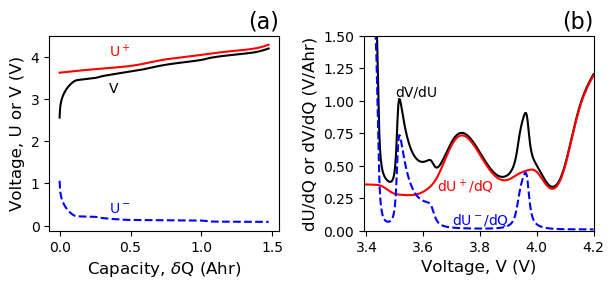

In [15]:
# Using all_output setting to get both electrode information out of MSMR model
results = msmr.whole_cell(parameter_matrix=params, nor_pos = 6, nor_neg = 6,
                          pos_lower_li_limit = 0.185, neg_lower_li_limit=0.001,
                          temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1),
                          usable_cap = fresh_capacity_51.max(), Qj_or_Xj='Qj', 
                          n_p=None, p_capacity=None, all_output=True)

capacities, voltages, dqdus, dvdqs = results[0], results[1], results[2], results[3]
fig = plt.figure(figsize = (6.5, 3.25))
ax, ax2 = fig.add_subplot(121), fig.add_subplot(122)

ax.plot(capacities[0], voltages[0], label='Whole Cell', color='k')
ax.plot(np.flip(capacities[0]), voltages[1], label='Positive', color='r')
ax.plot(capacities[0], voltages[2], label='Negative', ls='--', color='b')
ax.set_xlabel('Capacity, $\delta$Q (Ahr)',fontsize=12)
ax.set_ylabel('Voltage, U or V (V)',fontsize=12)

ax2.plot(voltages[0], -dvdqs[0], label='Whole Cell', color='k')
ax2.plot(np.flip(voltages[0]), -dvdqs[1], label='Positive', color='r')
ax2.plot(voltages[0], -dvdqs[2], label='Negative', ls='--', color='b')
ax2.set_xlabel('Voltage, V (V)',fontsize=12)
ax2.set_ylabel('dU/dQ or dV/dQ (V/Ahr)',fontsize=12)

ax2.set_xlim(3.39, 4.2)
ax2.set_ylim(0,1.5)

ax.set_title('(a)', loc='right', fontsize=16)
ax2.set_title('(b)', loc='right', fontsize=16)

ax.text(s='U$^+$', color='r', x=0.35, y=4)
ax.text(s='V', color='k', x=0.35, y=3.15)
ax.text(s='U$^-$', color='b', x=0.35, y=0.3)

ax2.text(s='dV/dU', color='k', x=3.5, y=1.04)
ax2.text(s='dU$^+$/dQ', color='r', x=3.65, y=0.3)
ax2.text(s='dU$^-$/dQ', color='b', x=3.7, y=0.05)

plt.tight_layout(pad=2.0)
plt.savefig('../figures/Figure 2/Figure2.eps', dpi = 300, format='eps')
plt.savefig('../figures/Figure 2/Figure2.pdf', dpi = 300, format='pdf')
plt.savefig('../figures/Figure 2/Figure2.png', dpi = 300, format='png')

<a id='Fresh-Cell-Fit-and-Comparisons'></a>

## Fresh Cell Fit and Comparisons

<p>&nbsp;</p>

[Back To Top](#top)

In [16]:
# Fresh guess for the charge data
pos_c = 1.8
neg_c = 1.98

# Take the Xj form of the initial guess and multiply it by the initial guesses of the 
# total electrode capacities

fresh_guess = np.array([3.6827400e+00, 1.0268194e-01*pos_c, 9.6710000e-01, # Positive Electrode
                        3.7264500e+00, 2.4795833e-01*pos_c, 1.3971200e+00, 
                        3.9057500e+00, 1.6131806e-01*pos_c, 3.5050000e+00, 
                        4.2605500e+00, 2.5193056e-01*pos_c, 5.5275700e+00,
                        4.0117300e+00, 1.3002639e-01*pos_c, 1.5200000e+00, 
                        4.1690200e+00, 1.0608472e-01*pos_c, 9.3000000e-01, 
                        
                        7.5430000e-02, 5.7137000e-01*neg_c, 8.6110000e-02, # Negative Electrode
                        1.0299000e-01, 2.5463000e-01*neg_c, 8.0090000e-02,
                        1.2431000e-01, 2.4680000e-02*neg_c, 1.5000000e-01, 
                        1.4634000e-01, 2.7120000e-02*neg_c, 1.7500000e-01, 
                        1.6846000e-01, 6.7440000e-02*neg_c, 1.2200000e-01, 
                        3.6325000e-01, 5.4760000e-02*neg_c, 5.9735400e+00,
                        
                        0.185, 0.00098]) # Lower Lithiation Bounds

In [17]:
# Bounds for each parameter
fresh_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    fresh_ocv_bounds.append((fresh_guess[i*3] - 0.02, fresh_guess[i*3] + 0.02))
    fresh_ocv_bounds.append((fresh_guess[i*3 + 1]*0.75, fresh_guess[i*3 + 1]*1.25))
    fresh_ocv_bounds.append((fresh_guess[i*3 + 2]*0.75, fresh_guess[i*3 + 2]*1.25))

fresh_ocv_bounds.append((0.09, 0.185))
fresh_ocv_bounds.append((0, 0.0108))
    
fresh_ocv_bounds[13] = (fresh_guess[13]*0.95, fresh_guess[13]*1.05)
fresh_ocv_bounds[16] = (fresh_guess[16]*0.95, fresh_guess[16]*1.05)

# Fitting
yvolt0_51c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess, 
                        args=(voltage_range_c,             # interpolated voltage range
                              data_cap_interp_51,       # interpolated capacity data
                              data_dvdq_interp_51,     # interpolated dvdq data
                              fresh_voltage_51.min(),   # Minimum voltage
                              fresh_voltage_51.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              pos_lower_lim_c, neg_lower_lim_c,                 # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_51.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',              # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False, True,               # fixed voltage | fixed Xj or Qj limit
                              0.5, 0.5),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)

print(yvolt0_51c)

G:\My Drive\A- Research\github\msmr-whole-cell-manuscript\jupyter\utilities\msmr.py:87: RuntimeWarning: overflow encountered in square
  dxjdu = (-Xj/w)*((f*np.exp(f*(U-U0)/w))/(1+np.exp(f*(U-U0)/w))**2)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.021688745372023213
            Iterations: 95
            Function evaluations: 3854
            Gradient evaluations: 95
[3.66304799e+00 2.31034365e-01 7.25325000e-01 3.74645000e+00
 4.06924595e-01 1.07204849e+00 3.88841390e+00 3.06174882e-01
 2.65562346e+00 4.26206383e+00 3.91940094e-01 4.14567750e+00
 4.01879078e+00 2.22345127e-01 1.47206887e+00 4.15278880e+00
 1.81404871e-01 1.11839942e+00 7.73795635e-02 1.25073890e+00
 1.07637500e-01 1.07780425e-01 5.49293442e-01 1.00112500e-01
 1.31922161e-01 6.10680693e-02 1.85111173e-01 1.53861758e-01
 6.11243260e-02 2.18750000e-01 1.77128207e-01 1.64802757e-01
 1.52500000e-01 3.43250000e-01 8.13186000e-02 6.82759930e+00
 1.85000000e-01 9.80000000e-04]


In [19]:
# Solving MSMR model for charge and discharged initial guesses and resultant fits 
guess_full_0_51c = yvolt0_51c[0:(3*(nor_pos+nor_neg))]

# Verbrugge et al. (2017) Base Parameters
cap_verb, v_verb, dqdu_verb, dvdq_verb = msmr.whole_cell(parameter_matrix=params, nor_pos = 6, 
                                                         nor_neg = 6, pos_lower_li_limit = 0.185, 
                                                         neg_lower_li_limit=0.00098, temp = 298, n_p=None, p_capacity=None,
                                                         pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                         usable_cap = fresh_capacity_51.max(), Qj_or_Xj='Qj')

# Charged - Initial Guess
cap_g_c, v_g_c, dqdu_g_c, dvdq_g_c = msmr.whole_cell(fresh_guess, nor_pos = 6, nor_neg = 6,
                                                     pos_lower_li_limit = 0.185, neg_lower_li_limit=0.00098,
                                                     temp = 298, pos_volt_range = (3.4, 5), 
                                                     neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                                                     usable_cap = fresh_capacity_51.max(), Qj_or_Xj='Qj')
# Charged - Fit
cap0_51c, v0_51c, dqdu0_51c, dvdq0_51c = msmr.whole_cell(guess_full_0_51c, nor_pos = 6, nor_neg = 6,
                                                         pos_lower_li_limit = 0.185, neg_lower_li_limit=0.00098,
                                                         temp = 298, pos_volt_range = (3.4, 5), 
                                                         neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                                                         usable_cap = fresh_capacity_51.max(), Qj_or_Xj='Qj')

model_vs = [v_verb, v_g_c, v0_51c]
# Charged (MAE)
capacity_range0_51 = np.linspace(fresh_capacity_51.min(), fresh_capacity_51.max(), 1000)
verb_mae = msmr.mae(fresh_voltage_51, v_verb, cap_verb, fresh_capacity_51, capacity_range0_51)
guess_mae = msmr.mae(fresh_voltage_51, v_g_c, cap_g_c, fresh_capacity_51, capacity_range0_51)
fit0_51_mae_c = msmr.mae(fresh_voltage_51, v0_51c, cap0_51c, fresh_capacity_51, capacity_range0_51)
ocv_mae_list_c = [verb_mae, guess_mae, fit0_51_mae_c]

deriv_list = [(v_verb, dvdq_verb), (v_g_c, dvdq_g_c), (v0_51c, dvdq0_51c)]
deriv_mae_list_c = [msmr.mae(fresh_dvdq_51, -(item[1]), item[0], fresh_voltage_51, np.linspace(3.49, 4.15, 1000)) for item in deriv_list]

# MAE Residuals as f(Q)
verb_mae_res = msmr.percent_residuals(fresh_voltage_51, v_verb, cap_verb, fresh_capacity_51, capacity_range0_51)
guess_mae_res = msmr.percent_residuals(fresh_voltage_51, v_g_c, cap_g_c, fresh_capacity_51, capacity_range0_51)
fit0_51_mae_c_res = msmr.percent_residuals(fresh_voltage_51, v0_51c, cap0_51c, fresh_capacity_51, capacity_range0_51)
ocv_mae_list_c_res = [verb_mae_res, guess_mae_res, fit0_51_mae_c_res]

deriv_mae_list_c_res = [msmr.percent_residuals(fresh_dvdq_51, -(item[1]), item[0], fresh_voltage_51, np.linspace(3.49, 4.15, 1000)) for item in deriv_list]

for idx, i in enumerate(ocv_mae_list_c_res):
    if np.argwhere(np.isnan(i)) == 0:
        i[0] = 100*((fresh_voltage_51[0] - model_vs[idx][0])/fresh_voltage_51[0])

C:\Users\victo\Anaconda3\envs\msmr\lib\site-packages\scipy\interpolate\interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
C:\Users\victo\Anaconda3\envs\msmr\lib\site-packages\scipy\interpolate\interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


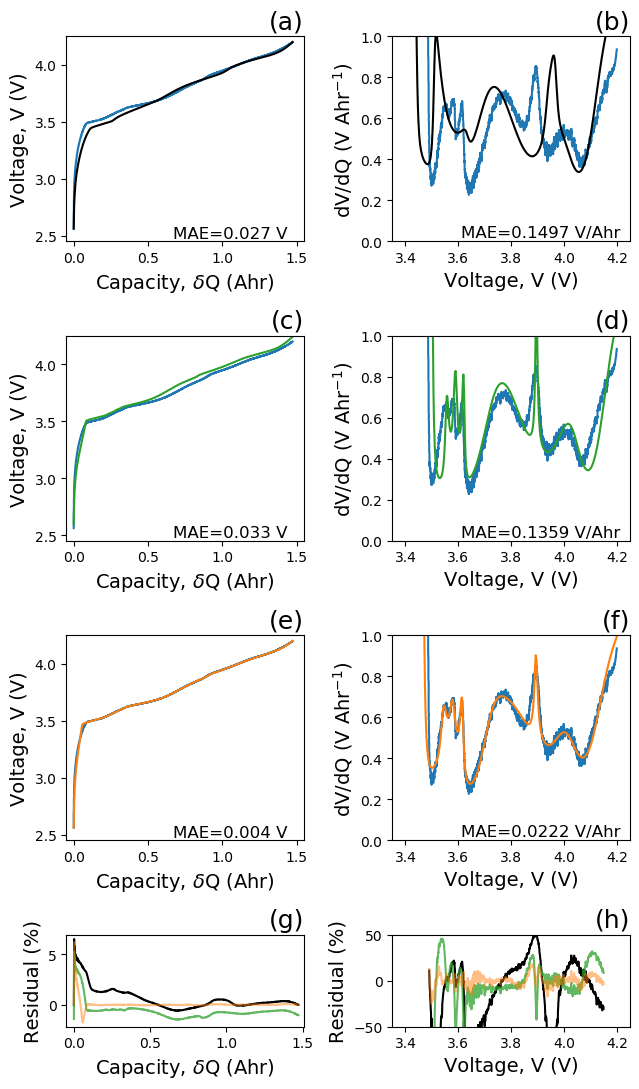

In [20]:
# Charged
main_fig_height = 0.29
gs = gridspec.GridSpec(4, 2, height_ratios=[main_fig_height, main_fig_height, main_fig_height, 1-main_fig_height*3])
    
fig = plt.figure(figsize=(6.5,11))
ax, ax2 = fig.add_subplot(gs[0]),  fig.add_subplot(gs[1])
ax3, ax4 = fig.add_subplot(gs[2]), fig.add_subplot(gs[3])
ax5, ax6 = fig.add_subplot(gs[4]), fig.add_subplot(gs[5]) # Third Row
ax7, ax8 = fig.add_subplot(gs[6]), fig.add_subplot(gs[7]) # Third Row
axes, axes_left, axes_right = [ax, ax2, ax3, ax4, ax5, ax6, ax7, ax8], [ax, ax3, ax5], [ax2, ax4, ax6] 

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
color_map = ['#1f77b4', 'k', '#2ca02c', '#ff7f0e', '#d62728', '#9467bd']
cycles = [0, 300, 600]
linestyles = ['-', ':', '--']
for idx, axe in enumerate(axes):
    axe.set_title(letters[idx], loc='right', fontsize = 18)
    
for idx, axe in enumerate(axes_left):
    axe.plot(fresh_capacity_51, fresh_voltage_51, label='Data', color=color_map[0])
    axe.set_xlabel('Capacity, $\delta$Q (Ahr)',fontsize=14)
    axe.set_ylabel('Voltage, V (V)',fontsize=14)
    axe.text(.67, 2.48, 'MAE=%1.3f V' %ocv_mae_list_c[idx],fontsize=12)
    axe.set_ylim(2.45, 4.25)
    axe.set_xlim(-0.05, 1.55)
    
for idx, axe in enumerate(axes_right):
    axe.plot(fresh_voltage_51, fresh_dvdq_51, label='Data', color=color_map[0])
    axe.set_xlabel('Voltage, V (V)',fontsize=14)
    axe.set_ylabel('dV/dQ (V Ahr$^{-1})$',fontsize=14)
    axe.set_xlim(3.35, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.61, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_c[idx],fontsize=12)

# Capacity vs OCV 
ax.plot(cap_verb, v_verb, color=color_map[1])
ax3.plot(cap_g_c, v_g_c, color=color_map[2])
ax5.plot(cap0_51c, v0_51c, color=color_map[3])

# OCV vs dV/dQ
ax2.plot(v_verb, -dvdq_verb, color=color_map[1])
ax4.plot(v_g_c, -dvdq_g_c, color=color_map[2])
ax6.plot(v0_51c, -dvdq0_51c, color=color_map[3])

alpha=[1.0, 0.75, 0.5]

for idx, i in enumerate(ocv_mae_list_c_res):
    ax7.plot(capacity_range0_51, i, label=cycles[idx], color=color_map[idx+1], alpha=alpha[idx])
    ax8.plot(voltage_range_c, deriv_mae_list_c_res[idx], label=cycles[idx], color=color_map[idx+1], alpha=alpha[idx])

ax7.set_ylabel('Residual (%)', fontsize=14)
ax7.set_xlabel('Capacity, $\delta$Q (Ahr)',fontsize=14)
ax7.set_xlim(-0.05, 1.51)
ax8.set_ylabel('Residual (%)', fontsize=14)
ax8.set_ylim(-50, 50)
ax8.set_xlim(3.35, 4.25)
ax8.set_xlabel('Voltage, V (V)', fontsize=14)
fig.tight_layout()

# plt.savefig('../figures/Figure 3/Figure3.eps', dpi = 300, format='eps')
# plt.savefig('../figures/Figure 3/Figure3.pdf', dpi = 300, format='pdf')
# plt.savefig('../figures/Figure 3/Figure3.png', dpi = 300, format='png')

<a id='Fitting-300-and-600-Cycles'></a>

## Fitting 300 and 600 Cycles  

<p>&nbsp;</p>

[Back To Top](#top)

In [21]:
# Charge - 300 Cycles

# Setting bounds for each parameter
aged_300_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    aged_300_ocv_bounds.append((yvolt0_51c[i*3] - 0.02, yvolt0_51c[i*3] + 0.02))
    aged_300_ocv_bounds.append((yvolt0_51c[i*3 + 1]*0.75, yvolt0_51c[i*3 + 1]*1.25))
    aged_300_ocv_bounds.append((yvolt0_51c[i*3 + 2]*0.75, yvolt0_51c[i*3 + 2]*1.25))

aged_300_ocv_bounds.append((0.1, 0.185))
aged_300_ocv_bounds.append((0, 0.0108))
    
yvolt300_1c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51c, 
                         args=(voltage_range_c,        # interpolated voltage range
                               a300_data_cap_interp_1,      # interpolated capacity data
                               a300_data_dvdq_interp_1,     # interpolated dvdq data
                               aged_300_voltage_1.min(),  # Minimum voltage
                               aged_300_voltage_1.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_1.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',         # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.5,                  # capacity weight on error function
                               0.5),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_1c)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.02051051237377839
            Iterations: 67
            Function evaluations: 2733
            Gradient evaluations: 67
[3.68304799e+00 2.88792956e-01 5.43993750e-01 3.74916534e+00
 4.13085743e-01 1.25360847e+00 3.90841390e+00 2.60215981e-01
 2.56006496e+00 4.24206383e+00 4.29067193e-01 3.89589368e+00
 4.00097817e+00 2.26068333e-01 1.84008609e+00 4.13727804e+00
 1.36053653e-01 9.48456864e-01 7.06504839e-02 1.26896139e+00
 1.34546875e-01 1.04108083e-01 5.35520428e-01 1.25140625e-01
 1.29019055e-01 5.38091479e-02 1.82266306e-01 1.50840936e-01
 6.55474769e-02 2.73437500e-01 1.78254435e-01 1.58266785e-01
 1.70131901e-01 3.23250000e-01 9.85072195e-02 6.81757122e+00
 1.85000000e-01 6.39320838e-04]


In [22]:
# 600 Cycles
# Setting bounds for each parameter
aged_600_ocv_bounds = []

for i in range(0,int(nor_pos+nor_neg)):
    aged_600_ocv_bounds.append((yvolt300_1c[i*3] - 0.01, yvolt300_1c[i*3] + 0.01))
    aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 1]*0.75, yvolt300_1c[i*3 + 1]*1.25))
    aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 2]*0.75, yvolt300_1c[i*3 + 2]*1.25))

aged_600_ocv_bounds.append((0.05, yvolt300_1c[-2]))
aged_600_ocv_bounds.append((0, yvolt300_1c[-1]))

yvolt600_49c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt300_1c, 
                          args=(voltage_range_c,        # interpolated voltage range
                                a600_data_cap_interp_49,      # interpolated capacity data
                                a600_data_dvdq_interp_49,     # interpolated dvdq data
                                aged_600_voltage_49.min(),  # Minimum voltage
                                aged_600_voltage_49.max(),  # Maximum voltage
                                298,                  # temperature
                                6, 6,                 # number of pos rxns, number of neg rxns
                                (3.4,5), (0,1),       # positive voltage range, negative voltange range
                                None,                 # positive lower X limit
                                None,                 # negative lower X limit
                                None,                 # N|P Ratio
                                None,                 # positive electrode full capacity
                                aged_600_capacity_49.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',          # Qj or Xj
                                None,                 # list of pos_U0s
                                None,                 # list of neg_U0s
                                False,                # fixed voltage
                                False,                 # fixed xj_limit
                                0.5,                  # capacity weight on error function
                                0.5),                 # dvdq weight on error function
                          eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                          bounds=aged_600_ocv_bounds, iter=500, full_output=False)

print(yvolt600_49c)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.01849669294723745
            Iterations: 60
            Function evaluations: 2451
            Gradient evaluations: 60
[3.69208987e+00 2.16594717e-01 4.07995313e-01 3.75916534e+00
 3.91583591e-01 1.39801335e+00 3.91841390e+00 2.20962112e-01
 2.45216775e+00 4.23218582e+00 4.25560830e-01 3.85768797e+00
 3.99097817e+00 2.24950660e-01 1.76269404e+00 4.13390375e+00
 1.39548290e-01 8.96392619e-01 6.82822447e-02 1.26648635e+00
 1.68183594e-01 1.06203725e-01 5.37958582e-01 1.51416964e-01
 1.29410140e-01 5.40803805e-02 2.27832882e-01 1.49332634e-01
 8.13002171e-02 3.41796875e-01 1.74870016e-01 1.47605492e-01
 2.12664876e-01 3.13250000e-01 9.25358217e-02 6.65218358e+00
 1.73611026e-01 5.30334906e-04]


In [23]:
# charged Fits

# MSMR Results for Charged 300 cycle fit
guess_full_300_1c = yvolt300_1c[0:(3*(nor_pos+nor_neg))]
cap300_1c, v300_1c, dqdu300_1c, dvdq300_1c = msmr.whole_cell(guess_full_300_1c, nor_pos = 6, nor_neg = 6, 
                                                           pos_lower_li_limit = yvolt300_1c[-2], neg_lower_li_limit = yvolt300_1c[-1],
                                                           temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                           usable_cap = aged_300_capacity_1.max(), n_p=None, p_capacity=None,
                                                        Qj_or_Xj='Qj')
# MSMR Results for Charged 600 cycle fit
guess_full_600_49c = yvolt600_49c[0:(3*(nor_pos+nor_neg))]
cap600_49c, v600_49c, dqdu600_49c, dvdq600_49c = msmr.whole_cell(guess_full_600_49c, nor_pos = 6, nor_neg = 6, 
                                                               pos_lower_li_limit = yvolt600_49c[-2], neg_lower_li_limit = yvolt600_49c[-1],
                                                               temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                               usable_cap = aged_600_capacity_49.max(), n_p=None, p_capacity=None,
                                                                Qj_or_Xj='Qj')

capacity_range300_1 = np.linspace(0.0, aged_300_capacity_1.max(), 1000)
capacity_range600_49 = np.linspace(0.0, aged_600_capacity_49.max(), 1000)

# Calculating MAE for capcity and dV/dQ data
fit300_1_mae_c = msmr.mae(aged_300_voltage_1, v300_1c, cap300_1c, aged_300_capacity_1, capacity_range300_1)
fit600_49_mae_c = msmr.mae(aged_600_voltage_49, v600_49c, cap600_49c, aged_600_capacity_49, capacity_range600_49)
ocv_mae_list_fits_all = [fit0_51_mae_c, fit300_1_mae_c, fit600_49_mae_c]

# Residual Calculations
fit300_1_mae_c_res = msmr.percent_residuals(aged_300_voltage_1, v300_1c, cap300_1c, aged_300_capacity_1, capacity_range300_1)
fit600_49_mae_c_res = msmr.percent_residuals(aged_600_voltage_49, v600_49c, cap600_49c, aged_600_capacity_49, capacity_range600_49)
ocv_mae_list_fits_all_res = [fit0_51_mae_c_res, fit300_1_mae_c_res, fit600_49_mae_c_res]

deriv_list = [(v0_51c, dvdq0_51c, fresh_voltage_51, fresh_dvdq_51),
              (v300_1c, dvdq300_1c, aged_300_voltage_1, aged_300_dvdq_1),
              (v600_49c, dvdq600_49c, aged_600_voltage_49, aged_600_dvdq_49)]

deriv_mae_list_fits_all = [msmr.mae(item[3], -(item[1]), item[0], item[2], voltage_range_c) for item in deriv_list]
deriv_mae_list_fits_all_res = [msmr.percent_residuals(item[3], -(item[1]), item[0], item[2], voltage_range_c) for item in deriv_list]

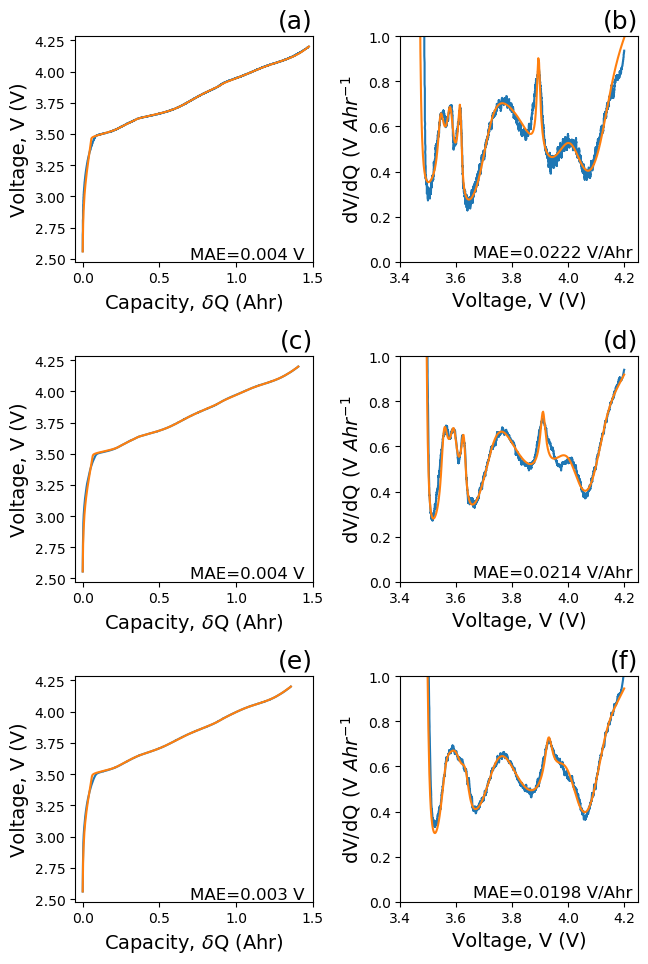

In [24]:
# Plotting
fig = plt.figure(figsize=(6.5, 9.75))
ax, ax2 = fig.add_subplot(321), fig.add_subplot(322)
ax3, ax4 = fig.add_subplot(323), fig.add_subplot(324)
ax5, ax6 = fig.add_subplot(325), fig.add_subplot(326)
axes, axes_left, axes_right = [ax, ax2, ax3, ax4, ax5, ax6], [ax, ax3, ax5], [ax2, ax4, ax6]
letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for idx, axe in enumerate(axes):
    axe.set_title(letters[idx], loc='right', fontsize = 18)

# Capacity vs OCV 
ax.plot(fresh_capacity_51, fresh_voltage_51, label='Data', color=color_map[0])
ax.plot(cap0_51c, v0_51c, label='Fit', color=color_map[3])

ax3.plot(aged_300_capacity_1, aged_300_voltage_1, label='Data', color=color_map[0])
ax3.plot(cap300_1c, v300_1c, label='Fit', color=color_map[3])

ax5.plot(aged_600_capacity_49, aged_600_voltage_49, label='Data', color=color_map[0])
ax5.plot(cap600_49c, v600_49c, label='Fit', color=color_map[3])

# OCV vs dV/dQ
ax2.plot(fresh_voltage_51, fresh_dvdq_51, label='Data', color=color_map[0])
ax2.plot(v0_51c, -dvdq0_51c, label='Fit', color=color_map[3])

ax4.plot(aged_300_voltage_1, aged_300_dvdq_1, label='Data', color=color_map[0])
ax4.plot(v300_1c, -dvdq300_1c, label='Fit', color=color_map[3])

ax6.plot(aged_600_voltage_49, aged_600_dvdq_49, label='Data', color=color_map[0])
ax6.plot(v600_49c, -dvdq600_49c, label='Fit', color=color_map[3])

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity, $\delta$Q (Ahr)',fontsize=14)
    axe.set_ylabel('Voltage, V (V)',fontsize=14)
    axe.text(.7, 2.5, 'MAE=%1.3f V' %ocv_mae_list_fits_all[idx], fontsize=12)
    axe.set_xlim(-0.05, 1.5)
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Voltage, V (V)',fontsize=14)
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$',fontsize=14)
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1.)
    axe.text(3.66, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_fits_all[idx],fontsize=12)

    
fig.tight_layout()
plt.savefig('../figures/Figure 4/Figure4.eps', dpi = 300, format='eps')
plt.savefig('../figures/Figure 4/Figure4.pdf', dpi = 300, format='pdf')
plt.savefig('../figures/Figure 4/Figure4.png', dpi = 300, format='png')

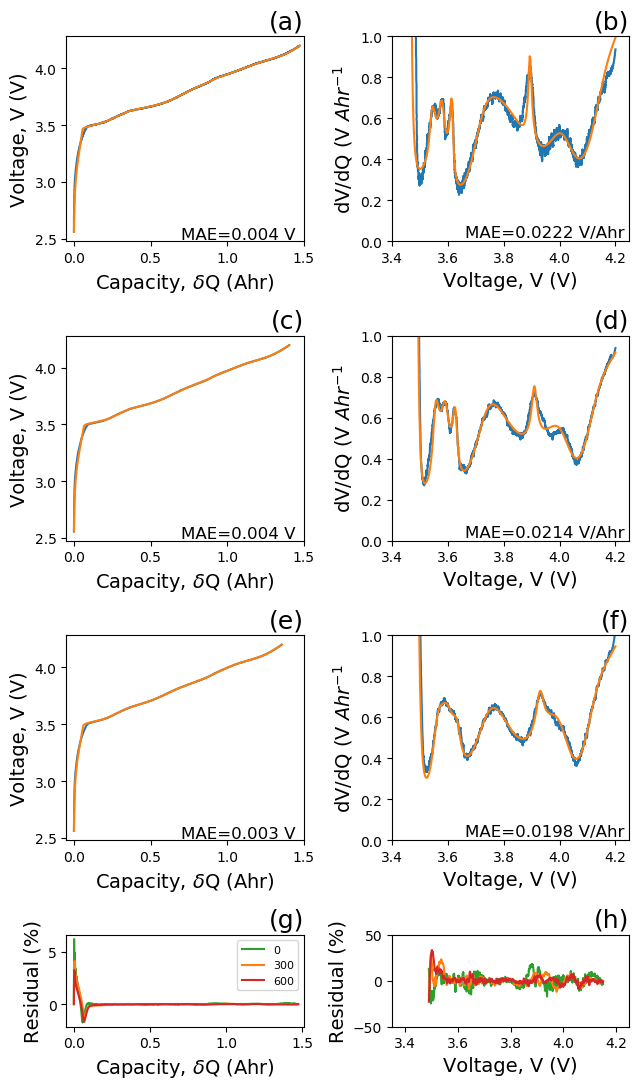

In [25]:
# Charged
main_fig_height = 0.29
gs = gridspec.GridSpec(4, 2, height_ratios=[main_fig_height, main_fig_height, main_fig_height, 1-main_fig_height*3])
    
fig = plt.figure(figsize=(6.5,11))
ax, ax2 = fig.add_subplot(gs[0]),  fig.add_subplot(gs[1])
ax3, ax4 = fig.add_subplot(gs[2]), fig.add_subplot(gs[3])
ax5, ax6 = fig.add_subplot(gs[4]), fig.add_subplot(gs[5]) # Third Row
ax7, ax8 = fig.add_subplot(gs[6]), fig.add_subplot(gs[7]) # Third Row
axes, axes_left, axes_right = [ax, ax2, ax3, ax4, ax5, ax6, ax7, ax8], [ax, ax3, ax5], [ax2, ax4, ax6] 

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
for idx, axe in enumerate(axes):
    axe.set_title(letters[idx], loc='right', fontsize = 18)

# Capacity vs OCV 
ax.plot(fresh_capacity_51, fresh_voltage_51, label='Data', color=color_map[0])
ax.plot(cap0_51c, v0_51c, label='Fit', color=color_map[3])

ax3.plot(aged_300_capacity_1, aged_300_voltage_1, label='Data', color=color_map[0])
ax3.plot(cap300_1c, v300_1c, label='Fit', color=color_map[3])

ax5.plot(aged_600_capacity_49, aged_600_voltage_49, label='Data', color=color_map[0])
ax5.plot(cap600_49c, v600_49c, label='Fit', color=color_map[3])

# OCV vs dV/dQ
ax2.plot(fresh_voltage_51, fresh_dvdq_51, label='Data', color=color_map[0])
ax2.plot(v0_51c, -dvdq0_51c, label='Fit', color=color_map[3])

ax4.plot(aged_300_voltage_1, aged_300_dvdq_1, label='Data', color=color_map[0])
ax4.plot(v300_1c, -dvdq300_1c, label='Fit', color=color_map[3])

ax6.plot(aged_600_voltage_49, aged_600_dvdq_49, label='Data', color=color_map[0])
ax6.plot(v600_49c, -dvdq600_49c, label='Fit', color=color_map[3])

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity, $\delta$Q (Ahr)',fontsize=14)
    axe.set_ylabel('Voltage, V (V)',fontsize=14)
    axe.text(.7, 2.5, 'MAE=%1.3f V' %ocv_mae_list_fits_all[idx], fontsize=12)
    axe.set_xlim(-0.05, 1.5)
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Voltage, V (V)',fontsize=14)
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$',fontsize=14)
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1.)
    axe.text(3.66, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_fits_all[idx],fontsize=12)

for idx, i in enumerate(ocv_mae_list_fits_all_res):
    ax7.plot(capacity_range0_51, i, label=cycles[idx], color = color_map[idx+2])
    ax8.plot(voltage_range_c, deriv_mae_list_fits_all_res[idx], label=cycles[idx], color = color_map[idx+2])

ax7.legend(fontsize=8)
ax7.set_ylabel('Residual (%)', fontsize=14)
ax7.set_xlabel('Capacity, $\delta$Q (Ahr)',fontsize=14)
ax7.set_xlim(-0.05, 1.51)
ax8.set_ylabel('Residual (%)', fontsize=14)
ax8.set_ylim(-50, 50)
ax8.set_xlim(3.35, 4.25)
ax8.set_xlabel('Voltage, V (V)', fontsize=14)    

fig.tight_layout()

<a id='Individual-Electrodes-Over-Cycling'></a>

## Individual Electrodes Over Cycling


<p>&nbsp;</p>

[Back To Top](#top)

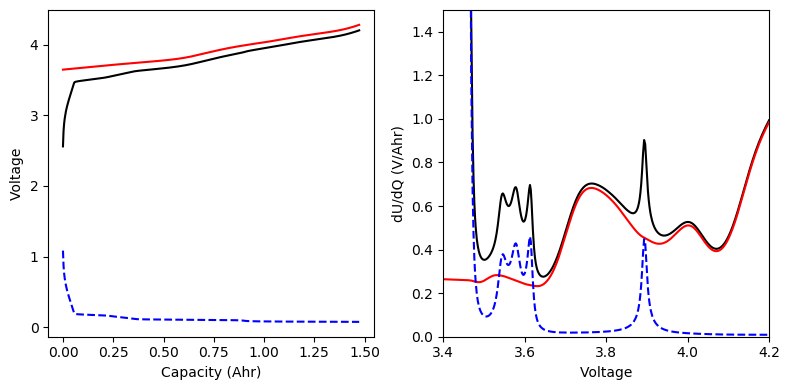

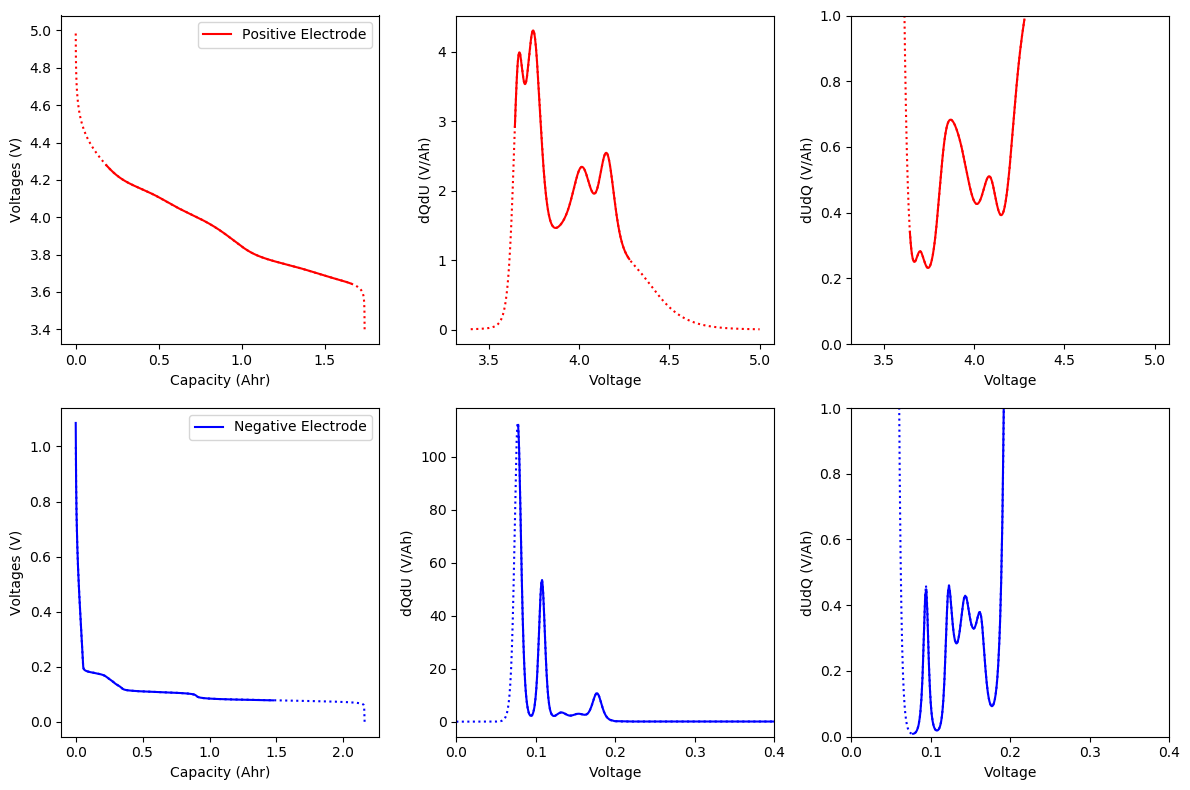

In [26]:
# 0 Cycles
results_51_0c = msmr.whole_cell(guess_full_0_51c, nor_pos = 6, nor_neg = 6,
                                pos_lower_li_limit = 0.185006060, neg_lower_li_limit=0.00098081,
                                temp = 298, pos_volt_range = (3.4, 5), 
                                neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                                usable_cap = fresh_capacity_51.max(), Qj_or_Xj='Qj', all_output=True)

pos_whole_0 = msmr.electrode_response(guess_full_0_51c[0:18], 298, 3.4, 5, 6)
neg_whole_0 = msmr.electrode_response(guess_full_0_51c[18:36], 298, 0, 1, 6)

fig_1_0, fig_2_0 = mp.individual_electrode_analysis(results_51_0c, pos_whole_0, neg_whole_0)


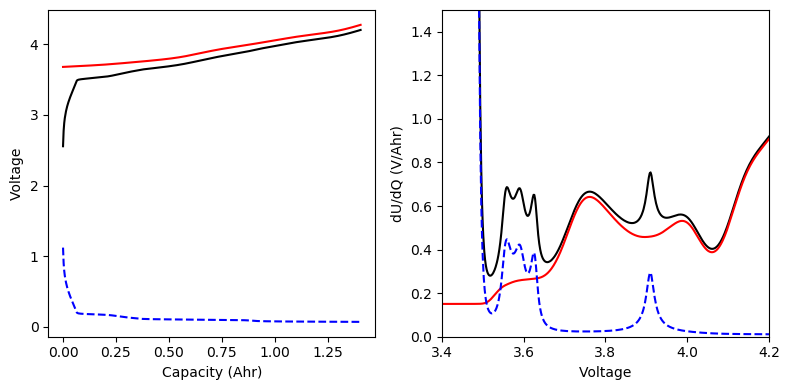

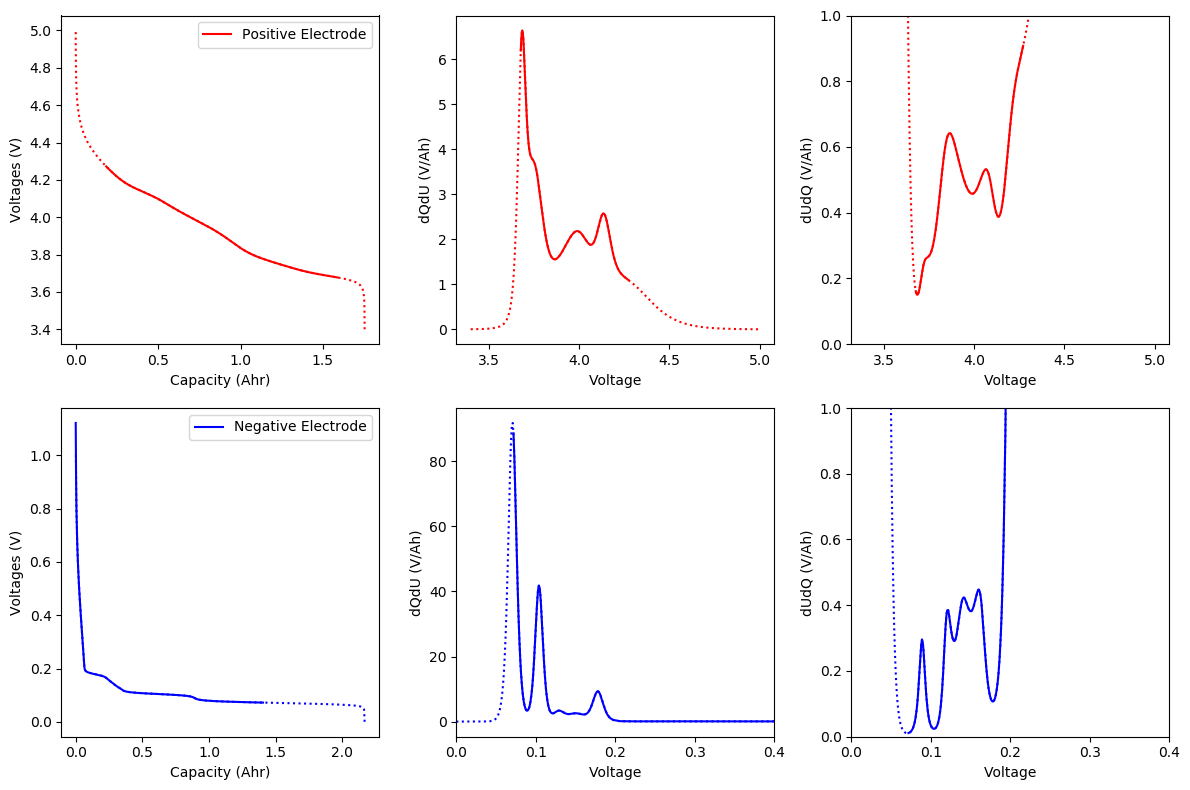

In [27]:
# 300 Cycles
results_300_1c = msmr.whole_cell(guess_full_300_1c, nor_pos = 6, nor_neg = 6, 
                                 pos_lower_li_limit = yvolt300_1c[-2], neg_lower_li_limit = yvolt300_1c[-1],
                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                 usable_cap = aged_300_capacity_1.max(), n_p=None, p_capacity=None,
                                 Qj_or_Xj='Qj', all_output=True)

pos_whole_300 = msmr.electrode_response(guess_full_300_1c[0:18], 298, 3.4, 5, 6)
neg_whole_300 = msmr.electrode_response(guess_full_300_1c[18:36], 298, 0, 1, 6)

fig_1_300, fig_2_300 = mp.individual_electrode_analysis(results_300_1c, pos_whole_300, neg_whole_300)

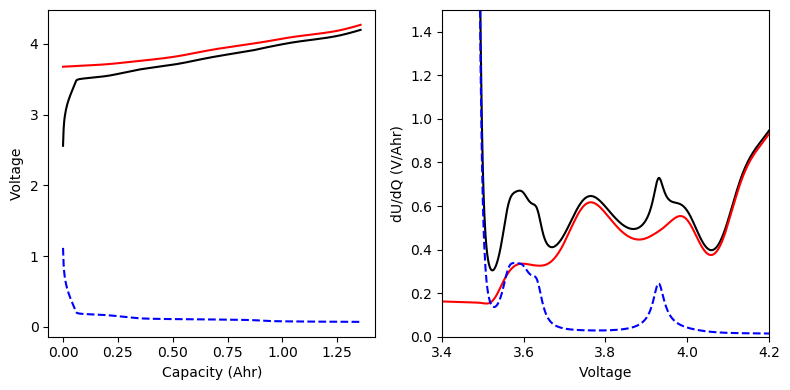

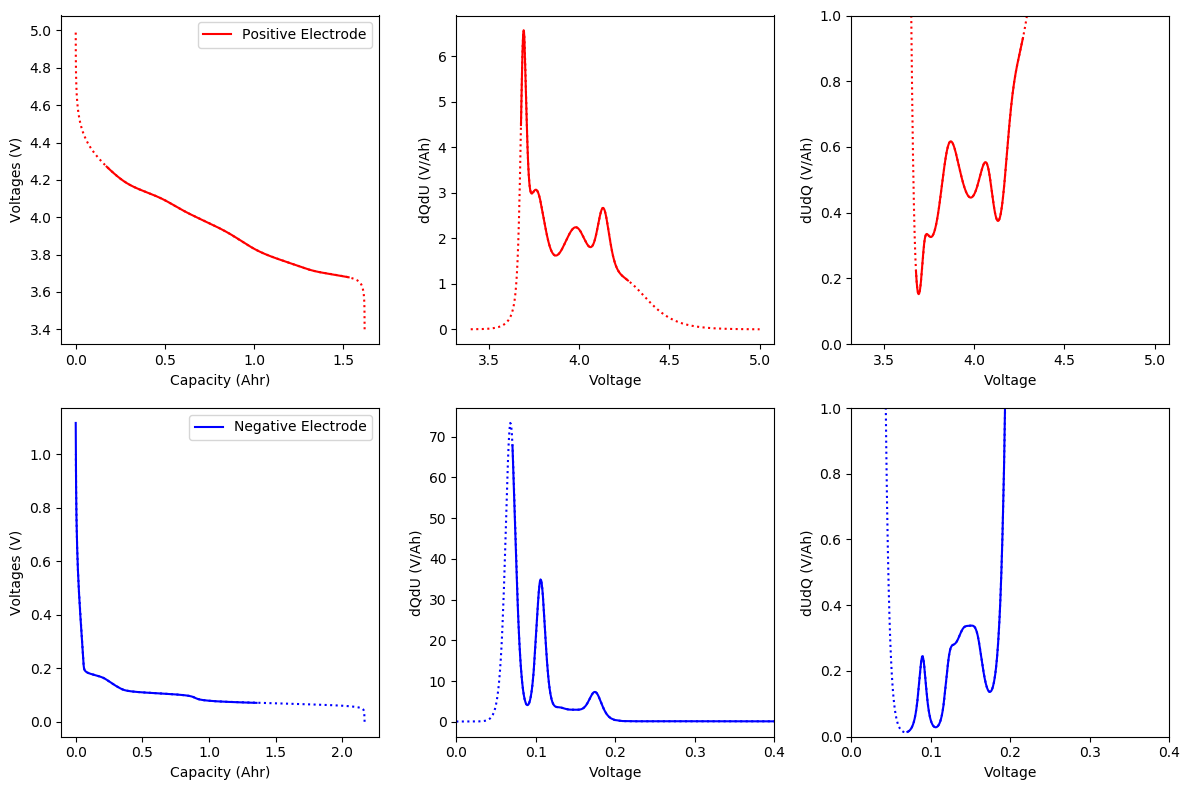

In [28]:
# 600 Cycles
results_600_49c = msmr.whole_cell(guess_full_600_49c, nor_pos = 6, nor_neg = 6, 
                                 pos_lower_li_limit = yvolt600_49c[-2], neg_lower_li_limit = yvolt600_49c[-1],
                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                 usable_cap = aged_600_capacity_49.max(), n_p=None, p_capacity=None,
                                 Qj_or_Xj='Qj', all_output=True)

pos_whole_600 = msmr.electrode_response(guess_full_600_49c[0:18], 298, 3.4, 5, 6)
neg_whole_600 = msmr.electrode_response(guess_full_600_49c[18:36], 298, 0, 1, 6)

fig_1_600, fig_2_600 = mp.individual_electrode_analysis(results_600_49c, pos_whole_600, neg_whole_600)

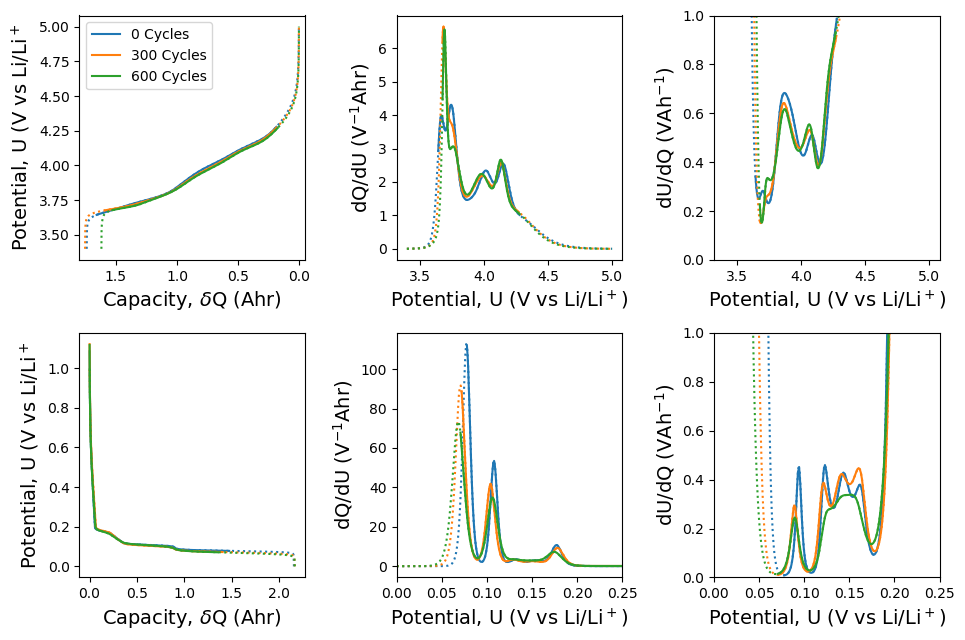

In [29]:
fig = plt.figure(figsize = (9.75, 6.5))

axe1, axe2, axe3 = fig.add_subplot(231), fig.add_subplot(232), fig.add_subplot(233)
axe4, axe5, axe6 = fig.add_subplot(234), fig.add_subplot(235), fig.add_subplot(236)

cap_ax, dqdu_ax, dudq_ax = [axe1, axe4], [axe2, axe5], [axe3, axe6]

color_map_2 = ['#1f77b4', '#ff7f0e', '#2ca02c']
cycles = ['0 Cycles', '300 Cycles', '600 Cycles']

# color_p = ['maroon', 'red', 'lightcoral'] # Different reds
# color_n = ['darkblue', 'blue', 'skyblue'] # Different blues

whole_cell_results = [results_51_0c, results_300_1c, results_600_49c]
pos_wholes = [pos_whole_0, pos_whole_300, pos_whole_600]
neg_wholes = [neg_whole_0, neg_whole_300, neg_whole_600]

for idx, i in enumerate(whole_cell_results):
    capacities, voltages, dqdus, dudqs = i[0], i[1], i[2], i[3]
    pv, pq, pd = pos_wholes[idx]
    nv, nq, nd = neg_wholes[idx]
    
    axe1.plot(pq, pv, ':', color = color_map_2[idx])
    axe1.plot(capacities[1], voltages[1], color = color_map_2[idx], label=cycles[idx])

    axe2.plot(pv, -pd, ':', color = color_map_2[idx])
    axe2.plot(voltages[1], -dqdus[1], color = color_map_2[idx])

    axe3.plot(pv, -1/pd, ':', color = color_map_2[idx])
    axe3.plot(voltages[1], -dudqs[1], color = color_map_2[idx])

    axe4.plot(nq, nv, ':', color = color_map_2[idx])
    axe4.plot(capacities[2], voltages[2], color = color_map_2[idx], label=cycles[idx])

    axe5.plot(nv, -nd, ':', color = color_map_2[idx])
    axe5.plot(voltages[2], -dqdus[2], color = color_map_2[idx])

    axe6.plot(nv, -1/nd, ':', color = color_map_2[idx])
    axe6.plot(voltages[2], -dudqs[2], color = color_map_2[idx])

for axe in cap_ax:
    axe.set_xlabel('Capacity, $\delta$Q (Ahr)', fontsize=14)
    axe.set_ylabel('Potential, U (V vs Li/Li$^+$', fontsize=14)

for axe in dqdu_ax:
    axe.set_xlabel('Potential, U (V vs Li/Li$^+$)', fontsize=14)
    axe.set_ylabel('dQ/dU (V$^{-1}$Ahr)', fontsize=14)

for axe in dudq_ax:
    axe.set_xlabel('Potential, U (V vs Li/Li$^+$)', fontsize=14)
    axe.set_ylabel('dU/dQ (VAh$^{-1}$)', fontsize=14)
    axe.set_ylim(0,1)

axe1.set_xlim(1.8, -0.05)
axe1.legend(fontsize=10)
axe5.set_xlim(0,0.25)
axe6.set_xlim(0,0.25)
fig.tight_layout()

#fig.savefig('../figures/Figure 5/potential_new_figure_5.png', dpi = 300)

#### Saving the Data and Figures

In [30]:
run = True

if run == True:
    fit_0_data = np.append(yvolt0_51c, (ocv_mae_list_fits_all[0], deriv_mae_list_fits_all[0]))
    fit_300_data = np.append(yvolt300_1c, (ocv_mae_list_fits_all[1], deriv_mae_list_fits_all[1]))
    fit_600_data = np.append(yvolt600_49c, (ocv_mae_list_fits_all[2], deriv_mae_list_fits_all[2]))

    save_data = np.vstack((fit_0_data, fit_300_data, fit_600_data))
    np.savetxt('../supplementary-files/parameter-fits/0-300-600-charge-fit-parameters-101521-50-50split.txt', save_data)

else:
    pass

<a id='0-Cycle-Replicate-Fitting'></a>

## 0 Cycle Replicate Fitting

<p>&nbsp;</p>

[Back To Top](#top)

In [31]:
# Charged
fresh_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    fresh_ocv_bounds.append((fresh_guess[i*3] - 0.02, fresh_guess[i*3] + 0.02))
    fresh_ocv_bounds.append((fresh_guess[i*3 + 1]*0.75, fresh_guess[i*3 + 1]*1.25))
    fresh_ocv_bounds.append((fresh_guess[i*3 + 2]*0.75, fresh_guess[i*3 + 2]*1.25))

fresh_ocv_bounds.append((0.18, 0.27))
fresh_ocv_bounds.append((0, 0.0108))
    
fresh_ocv_bounds[13] = (fresh_guess[13]*0.95, fresh_guess[13]*1.05)
fresh_ocv_bounds[16] = (fresh_guess[16]*0.95, fresh_guess[16]*1.05)

yvolt0_52c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess, 
                        args=(voltage_range_c,             # interpolated voltage range
                              data_cap_interp_52,       # interpolated capacity data
                              data_dvdq_interp_52,     # interpolated dvdq data
                              fresh_voltage_52.min(),   # Minimum voltage
                              fresh_voltage_52.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              pos_lower_lim_c, neg_lower_lim_c,                 # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_52.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',                     # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False,                     # fixed voltage
                              True,                      # fixed xj_limit
                              0.5, 0.5),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)
print('Fit for Cell 52 done')

yvolt0_53c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess, 
                        args=(voltage_range_c,             # interpolated voltage range
                              data_cap_interp_53,       # interpolated capacity data
                              data_dvdq_interp_53,     # interpolated dvdq data
                              fresh_voltage_53.min(),   # Minimum voltage
                              fresh_voltage_53.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              pos_lower_lim_c, neg_lower_lim_c,                 # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_53.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',                      # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False,                     # fixed voltage
                              True,                      # fixed xj_limit
                              0.5, 0.5),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)
print('Fit for Cell 53 Done')

yvolt0_54c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess, 
                        args=(voltage_range_c,             # interpolated voltage range
                              data_cap_interp_54,       # interpolated capacity data
                              data_dvdq_interp_54,     # interpolated dvdq data
                              fresh_voltage_54.min(),   # Minimum voltage
                              fresh_voltage_54.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              pos_lower_lim_c, neg_lower_lim_c,                 # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_54.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',                      # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False,                     # fixed voltage
                              True,                      # fixed xj_limit
                              0.5, 0.5),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)

print('Fit for Cell 54 complete')

G:\My Drive\A- Research\github\msmr-whole-cell-manuscript\jupyter\utilities\msmr.py:87: RuntimeWarning: overflow encountered in square
  dxjdu = (-Xj/w)*((f*np.exp(f*(U-U0)/w))/(1+np.exp(f*(U-U0)/w))**2)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.02134400414879361
            Iterations: 103
            Function evaluations: 4169
            Gradient evaluations: 103
Fit for Cell 52 done
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.023263196758673613
            Iterations: 95
            Function evaluations: 3846
            Gradient evaluations: 95
Fit for Cell 53 Done
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.023307284641838632
            Iterations: 108
            Function evaluations: 4359
            Gradient evaluations: 108
Fit for Cell 54 complete


C:\Users\victo\Anaconda3\envs\msmr\lib\site-packages\scipy\interpolate\interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
C:\Users\victo\Anaconda3\envs\msmr\lib\site-packages\scipy\interpolate\interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


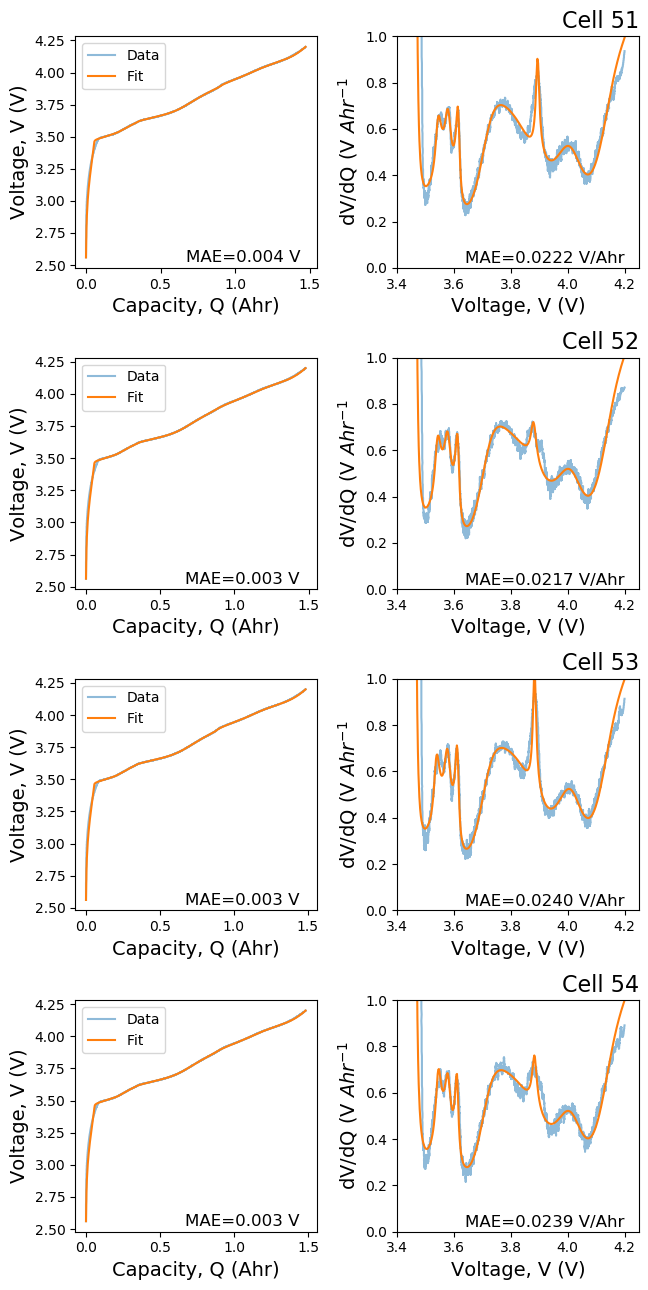

In [32]:
# MSMR results for all the fits for replicates
guess_full_0_52c = yvolt0_52c[0:(3*(nor_pos+nor_neg))]
cap0_52c, v0_52c, dqdu0_52c, dvdq0_52c = msmr.whole_cell(guess_full_0_52c, nor_pos = 6, nor_neg = 6, 
                                                         pos_lower_li_limit = pos_lower_lim_c, neg_lower_li_limit = neg_lower_lim_c,
                                                         temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1),
                                                         n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                         usable_cap = fresh_capacity_52.max())

guess_full_0_53c = yvolt0_53c[0:(3*(nor_pos+nor_neg))]
cap0_53c, v0_53c, dqdu0_53c, dvdq0_53c = msmr.whole_cell(guess_full_0_53c, nor_pos = 6, nor_neg = 6, 
                                                         pos_lower_li_limit = pos_lower_lim_c, neg_lower_li_limit = neg_lower_lim_c,
                                                         temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1),
                                                         n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                         usable_cap = fresh_capacity_53.max())

guess_full_0_54c = yvolt0_54c[0:(3*(nor_pos+nor_neg))]
cap0_54c, v0_54c, dqdu0_54c, dvdq0_54c = msmr.whole_cell(guess_full_0_54c, nor_pos = 6, nor_neg = 6, 
                                                         pos_lower_li_limit = pos_lower_lim_c, neg_lower_li_limit = neg_lower_lim_c,
                                                         temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1),
                                                         n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                         usable_cap = fresh_capacity_54.max())

# Calculating MAEs
capacity_range0_52 = np.linspace(0.0, fresh_capacity_52.max(), 251)
capacity_range0_53 = np.linspace(0.0, fresh_capacity_53.max(), 251)
capacity_range0_54 = np.linspace(0.0, fresh_capacity_54.max(), 251)

fit0_52_mae_c = msmr.mae(fresh_voltage_52, v0_52c, cap0_52c, fresh_capacity_52, capacity_range0_52)
fit0_53_mae_c = msmr.mae(fresh_voltage_53, v0_53c, cap0_53c, fresh_capacity_53, capacity_range0_53)
fit0_54_mae_c = msmr.mae(fresh_voltage_54, v0_54c, cap0_54c, fresh_capacity_54, capacity_range0_54)

ocv_mae_list = [fit0_51_mae_c, fit0_52_mae_c, fit0_53_mae_c, fit0_54_mae_c]

deriv_list = [(v0_51c, dvdq0_51c, fresh_voltage_51, fresh_dvdq_51),
              (v0_52c, dvdq0_52c, fresh_voltage_52, fresh_dvdq_52),
              (v0_53c, dvdq0_53c, fresh_voltage_53, fresh_dvdq_53),
              (v0_54c, dvdq0_54c, fresh_voltage_54, fresh_dvdq_54)]
deriv_mae_list = [msmr.mae(item[3], -(item[1]), item[0], item[2], voltage_range_c) for item in deriv_list]

# Plotting
fig = plt.figure(figsize=(6.5, 13))
ax, ax2 = fig.add_subplot(421), fig.add_subplot(422) # First Row
ax3, ax4 = fig.add_subplot(423), fig.add_subplot(424) # Second Row
ax5, ax6 = fig.add_subplot(425), fig.add_subplot(426) # Third Row
ax7, ax8 = fig.add_subplot(427), fig.add_subplot(428) # Fourth Row

axes = [ax, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
axes_left, axes_right = [ax, ax3, ax5, ax7], [ax2, ax4, ax6, ax8]
cells = ['Cell 51', 'Cell 52', 'Cell 53', 'Cell 54']

# Capacity vs OCV 
ax.plot(fresh_capacity_51, fresh_voltage_51, alpha=0.5, label='Data')
ax.plot(cap0_51c, v0_51c, label='Fit')

ax3.plot(fresh_capacity_52, fresh_voltage_52, alpha=0.5, label='Data')
ax3.plot(cap0_52c, v0_52c, label='Fit')

ax5.plot(fresh_capacity_53, fresh_voltage_53, alpha=0.5, label='Data')
ax5.plot(cap0_53c, v0_53c, label='Fit')

ax7.plot(fresh_capacity_54, fresh_voltage_54, alpha=0.5, label='Data')
ax7.plot(cap0_54c, v0_54c, label='Fit')

# OCV vs dV/dQ
ax2.plot(fresh_voltage_51, fresh_dvdq_51, alpha=0.5, label='Data')
ax2.plot(v0_51c, -dvdq0_51c, label='Fit')

ax4.plot(fresh_voltage_52, fresh_dvdq_52, alpha=0.5, label='Data')
ax4.plot(v0_52c, -dvdq0_52c, label='Fit')

ax6.plot(fresh_voltage_53, fresh_dvdq_53, alpha=0.5, label='Data')
ax6.plot(v0_53c, -dvdq0_53c, label='Fit')

ax8.plot(fresh_voltage_54, fresh_dvdq_54, alpha=0.5, label='Data')
ax8.plot(v0_54c, -dvdq0_54c, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity, Q (Ahr)', fontsize=14)
    axe.set_ylabel('Voltage, V (V)', fontsize=14)
    axe.text(.67, 2.52, 'MAE=%1.3f V' %ocv_mae_list[idx], fontsize=12)
    axe.legend()
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Voltage, V (V)', fontsize=14)
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$', fontsize=14)
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.64, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list[idx], fontsize=12)
    axe.set_title(cells[idx], loc='right', fontsize = 16)
    
fig.tight_layout()
fig.savefig('../figures/Figures SI/0_fit_replicates.png', dpi = 300)

In [33]:
fit_0_replicates = np.vstack((yvolt0_51c, yvolt0_52c, yvolt0_53c, yvolt0_54c))
fit_0_replicate_means = np.round(fit_0_replicates.mean(axis=0),4)
fit_0_replicate_stds = np.round(fit_0_replicates.std(axis=0),4)
print('Parameter Mean and Standard Deviations Amongst the 4 Replicates')
for i in range(0,nor_pos+nor_neg):
    print('{} +/- {} | '.format(fit_0_replicate_means[i*3], fit_0_replicate_stds[i*3]), 
          '{} +/- {} | '.format(fit_0_replicate_means[i*3+1], fit_0_replicate_stds[i*3+1]),
          '{} +/- {}'.format(fit_0_replicate_means[i*3+2], fit_0_replicate_stds[i*3+2]))


Parameter Mean and Standard Deviations Amongst the 4 Replicates
3.6629 +/- 0.0002 |  0.229 +/- 0.0034 |  0.7253 +/- 0.0
3.7464 +/- 0.0001 |  0.3964 +/- 0.014 |  1.0541 +/- 0.0104
3.888 +/- 0.0026 |  0.3121 +/- 0.0037 |  2.6373 +/- 0.011
4.264 +/- 0.0037 |  0.3888 +/- 0.0047 |  4.1457 +/- 0.0
4.0215 +/- 0.0028 |  0.2223 +/- 0.0 |  1.4752 +/- 0.0611
4.1538 +/- 0.002 |  0.1814 +/- 0.0 |  1.1119 +/- 0.013
0.078 +/- 0.0017 |  1.2178 +/- 0.0295 |  0.1076 +/- 0.0
0.1067 +/- 0.0013 |  0.5395 +/- 0.0076 |  0.0992 +/- 0.0014
0.1346 +/- 0.0056 |  0.0594 +/- 0.0018 |  0.1869 +/- 0.001
0.1468 +/- 0.0118 |  0.0608 +/- 0.0048 |  0.2002 +/- 0.0322
0.1746 +/- 0.0042 |  0.1621 +/- 0.0043 |  0.1499 +/- 0.0026
0.3433 +/- 0.0 |  0.0817 +/- 0.0006 |  6.716 +/- 0.1305


<a id='300-Cycles-Replicate-Fitting'></a>

## 300 Cycles Replicate Fitting

<p>&nbsp;</p>

[Back To Top](#top)

In [34]:
# Charge # 300 Cycles

aged_300_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    aged_300_ocv_bounds.append((yvolt0_51c[i*3] - 0.02, yvolt0_51c[i*3] + 0.02))
    aged_300_ocv_bounds.append((yvolt0_51c[i*3 + 1]*0.75, yvolt0_51c[i*3 + 1]*1.25))
    aged_300_ocv_bounds.append((yvolt0_51c[i*3 + 2]*0.75, yvolt0_51c[i*3 + 2]*1.25))
    
aged_300_ocv_bounds.append((0.095, pos_lower_lim_c))
aged_300_ocv_bounds.append((0, neg_lower_lim_c))
    
yvolt300_2c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51c, 
                         args=(voltage_range_c,        # interpolated voltage range
                               a300_data_cap_interp_2,      # interpolated capacity data
                               a300_data_dvdq_interp_2,     # interpolated dvdq data
                               aged_300_voltage_2.min(),  # Minimum voltage
                               aged_300_voltage_2.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_2.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',                 # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.5,                  # capacity weight on error function
                               0.5),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_2c)

yvolt300_3c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51c, 
                         args=(voltage_range_c,        # interpolated voltage range
                               a300_data_cap_interp_3,      # interpolated capacity data
                               a300_data_dvdq_interp_3,     # interpolated dvdq data
                               aged_300_voltage_3.min(),  # Minimum voltage
                               aged_300_voltage_3.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_3.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',                 # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.5,                  # capacity weight on error function
                               0.5),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_3c)

yvolt300_4c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51c, 
                         args=(voltage_range_c,        # interpolated voltage range
                               a300_data_cap_interp_4,      # interpolated capacity data
                               a300_data_dvdq_interp_4,     # interpolated dvdq data
                               aged_300_voltage_4.min(),  # Minimum voltage
                               aged_300_voltage_4.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_4.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',                 # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.5,                  # capacity weight on error function
                               0.5),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_4c)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.02231131709265778
            Iterations: 90
            Function evaluations: 3655
            Gradient evaluations: 90
[3.68304799e+00 2.88792956e-01 5.43993750e-01 3.74119530e+00
 4.74609201e-01 1.33303025e+00 3.90841390e+00 2.64114843e-01
 2.33691119e+00 4.25021934e+00 3.38451912e-01 3.10925812e+00
 4.01542098e+00 2.64302838e-01 1.84008609e+00 4.13747582e+00
 1.36053653e-01 9.20334315e-01 6.66971090e-02 1.31369908e+00
 1.34546875e-01 1.01172470e-01 5.31606894e-01 1.25140625e-01
 1.26987682e-01 6.01988898e-02 2.07615169e-01 1.50660881e-01
 5.94116880e-02 2.73437500e-01 1.79434194e-01 1.62249828e-01
 1.79304181e-01 3.23250000e-01 9.01064152e-02 6.79085465e+00
 1.52742567e-01 5.32617936e-04]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.02210524391365058
            Iterations: 80
            Function evaluations: 3263
            Gradient evaluat

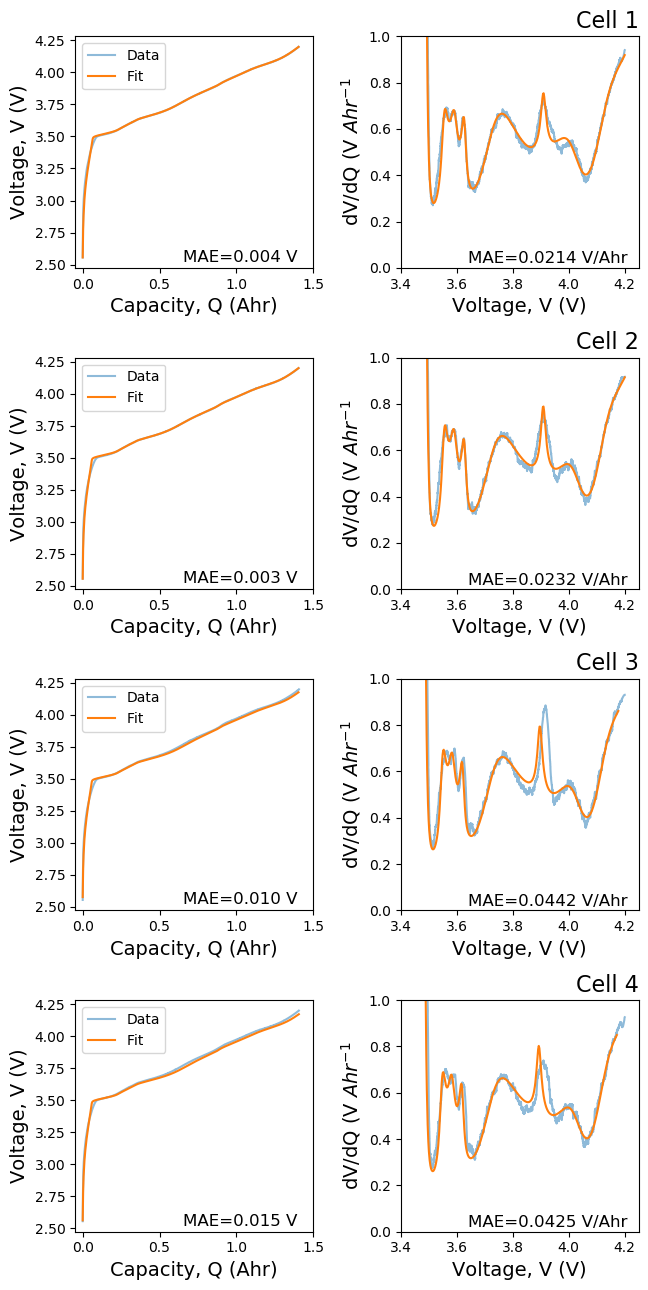

In [35]:
guess_full_300_2c = yvolt300_2c[0:(3*(nor_pos+nor_neg))]
cap300_2c, v300_2c, dqdu300_2c, dvdq300_2c = msmr.whole_cell(guess_full_300_2c, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt300_2c[-2], neg_lower_li_limit = yvolt300_2c[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj = 'Qj',
                                                                 usable_cap = aged_300_capacity_2.max())
guess_full_300_3c = yvolt300_3c[0:(3*(nor_pos+nor_neg))]
cap300_3c, v300_3c, dqdu300_3c, dvdq300_3c = msmr.whole_cell(guess_full_300_2c, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt300_3c[-2], neg_lower_li_limit = yvolt300_3c[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj = 'Qj',
                                                                 usable_cap = aged_300_capacity_2.max())


guess_full_300_4c = yvolt300_4c[0:(3*(nor_pos+nor_neg))]
cap300_4c, v300_4c, dqdu300_4c, dvdq300_4c = msmr.whole_cell(guess_full_300_2c, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt300_4c[-2], neg_lower_li_limit = yvolt300_4c[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj = 'Qj',
                                                                 usable_cap = aged_300_capacity_4.max())


# MAEs
capacity_range300_2 = np.linspace(0.0, aged_300_capacity_2.max(), 251)
capacity_range300_3 = np.linspace(0.0, aged_300_capacity_3.max(), 251)
capacity_range300_4 = np.linspace(0.0, aged_300_capacity_4.max(), 251)

fit300_2_mae_c = msmr.mae(aged_300_voltage_2, v300_2c, cap300_2c, aged_300_capacity_2, capacity_range300_2)
fit300_3_mae_c = msmr.mae(aged_300_voltage_3, v300_3c, cap300_3c, aged_300_capacity_3, capacity_range300_3)
fit300_4_mae_c = msmr.mae(aged_300_voltage_4, v300_4c, cap300_4c, aged_300_capacity_4, capacity_range300_4)

ocv_mae_list_300 = [fit300_1_mae_c, fit300_2_mae_c, fit300_3_mae_c, fit300_4_mae_c]
deriv_list = [(v300_1c, dvdq300_1c, aged_300_voltage_1, aged_300_dvdq_1),
              (v300_2c, dvdq300_2c, aged_300_voltage_2, aged_300_dvdq_2),
              (v300_3c, dvdq300_3c, aged_300_voltage_3, aged_300_dvdq_3),
              (v300_4c, dvdq300_4c, aged_300_voltage_4, aged_300_dvdq_4)]

deriv_mae_list_300 = [msmr.mae(item[3], -(item[1]), item[0], item[2], voltage_range_c) for item in deriv_list]

# Plotting
fig = plt.figure(figsize=(6.5, 13))
ax, ax2 = fig.add_subplot(421), fig.add_subplot(422) # First Row
ax3, ax4 = fig.add_subplot(423), fig.add_subplot(424) # Second Row
ax5, ax6 = fig.add_subplot(425), fig.add_subplot(426) # Third Row
ax7, ax8 = fig.add_subplot(427), fig.add_subplot(428) # Fourth Row

axes = [ax, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
axes_left, axes_right = [ax, ax3, ax5, ax7], [ax2, ax4, ax6, ax8]
cells = ['Cell 1', 'Cell 2', 'Cell 3', 'Cell 4']

# Capacity vs OCV 
ax.plot(aged_300_capacity_1, aged_300_voltage_1, alpha=0.5, label='Data')
ax.plot(cap300_1c, v300_1c, label='Fit')

ax3.plot(aged_300_capacity_2, aged_300_voltage_2, alpha=0.5, label='Data')
ax3.plot(cap300_2c, v300_2c, label='Fit')

ax5.plot(aged_300_capacity_3, aged_300_voltage_3, alpha=0.5, label='Data')
ax5.plot(cap300_3c, v300_3c, label='Fit')

ax7.plot(aged_300_capacity_4, aged_300_voltage_4, alpha=0.5, label='Data')
ax7.plot(cap300_4c, v300_4c, label='Fit')

# OCV vs dV/dQ
ax2.plot(aged_300_voltage_1, aged_300_dvdq_1, alpha=0.5, label='Data')
ax2.plot(v300_1c, -dvdq300_1c, label='Fit')

ax4.plot(aged_300_voltage_2, aged_300_dvdq_2, alpha=0.5, label='Data')
ax4.plot(v300_2c, -dvdq300_2c, label='Fit')

ax6.plot(aged_300_voltage_3, aged_300_dvdq_3, alpha=0.5, label='Data')
ax6.plot(v300_3c, -dvdq300_3c, label='Fit')

ax8.plot(aged_300_voltage_4, aged_300_dvdq_4, alpha=0.5, label='Data')
ax8.plot(v300_4c, -dvdq300_4c, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity, Q (Ahr)', fontsize=14)
    axe.set_ylabel('Voltage, V (V)', fontsize=14)
    axe.text(0.65, 2.52, 'MAE=%1.3f V' %ocv_mae_list_300[idx], fontsize=12)
    axe.set_xlim(-0.05, 1.5)
    axe.legend()
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Voltage, V (V)', fontsize=14)
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$', fontsize=14)
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.64, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_300[idx], fontsize=12)
    axe.set_title(cells[idx], loc='right', fontsize = 16)
    
fig.tight_layout()
fig.savefig('../figures/Figures SI/fit_300_replicates.png', dpi=300)

In [36]:
fit_300_replicates = np.vstack((yvolt300_1c, yvolt300_2c, yvolt300_3c, yvolt300_4c))
fit_300_replicate_means = np.round(fit_300_replicates.mean(axis=0),4)
fit_300_replicate_stds = np.round(fit_300_replicates.std(axis=0),4)
print('Parameter Mean and Standard Deviations Amongst the 4 Replicates')
for i in range(0,nor_pos+nor_neg):
    print('{} +/- {} | '.format(fit_300_replicate_means[i*3], fit_300_replicate_stds[i*3]), 
          '{} +/- {} | '.format(fit_300_replicate_means[i*3+1], fit_300_replicate_stds[i*3+1]),
          '{} +/- {}'.format(fit_300_replicate_means[i*3+2], fit_300_replicate_stds[i*3+2]))


Parameter Mean and Standard Deviations Amongst the 4 Replicates
3.6825 +/- 0.0009 |  0.2888 +/- 0.0 |  0.544 +/- 0.0
3.7502 +/- 0.0058 |  0.4101 +/- 0.0403 |  1.232 +/- 0.0676
3.9084 +/- 0.0 |  0.2759 +/- 0.0169 |  2.496 +/- 0.0928
4.252 +/- 0.0113 |  0.3859 +/- 0.0407 |  3.5416 +/- 0.4358
4.0117 +/- 0.0066 |  0.2453 +/- 0.0192 |  1.8397 +/- 0.0006
4.1395 +/- 0.0022 |  0.1361 +/- 0.0 |  0.9375 +/- 0.019
0.0699 +/- 0.0021 |  1.2921 +/- 0.0285 |  0.1345 +/- 0.0
0.1048 +/- 0.0024 |  0.5366 +/- 0.0072 |  0.1251 +/- 0.0
0.1298 +/- 0.0019 |  0.0541 +/- 0.0042 |  0.1794 +/- 0.0224
0.1515 +/- 0.0008 |  0.067 +/- 0.0061 |  0.2734 +/- 0.0
0.1784 +/- 0.0007 |  0.1546 +/- 0.0067 |  0.1632 +/- 0.012
0.3299 +/- 0.0115 |  0.0972 +/- 0.0043 |  6.7951 +/- 0.0216


<a id='600-Cycles-Replicate-Fitting'></a>

## 600 Cycles Replicate Fitting

<p>&nbsp;</p>

[Back To Top](#top)

In [37]:
# 600 Cycles
aged_600_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    aged_600_ocv_bounds.append((yvolt300_1c[i*3] - 0.01, yvolt300_1c[i*3] + 0.01))
    aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 1]*0.75, yvolt300_1c[i*3 + 1]*1.25))
    aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 2]*0.75, yvolt300_1c[i*3 + 2]*1.25))
    
# for i in range(0,int(nor_pos)):
#     aged_600_ocv_bounds.append((yvolt300_1c[i*3] - 0.015, yvolt300_1c[i*3] + 0.015))
#     aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 1]*0.75, yvolt300_1c[i*3 + 1]*1.25))
#     aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 2]*0.75, yvolt300_1c[i*3 + 2]*1.25))
# for i in range(int(nor_pos),int(nor_pos+nor_neg)):
#     aged_600_ocv_bounds.append((yvolt300_1c[i*3] - 0.01, yvolt300_1c[i*3] + 0.01))
#     aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 1]*0.9, yvolt300_1c[i*3 + 1]*1.1))
#     aged_600_ocv_bounds.append((yvolt300_1c[i*3 + 2]*0.9, yvolt300_1c[i*3 + 2]*1.1))

aged_600_ocv_bounds.append((0.05, yvolt300_1c[-2]))
aged_600_ocv_bounds.append((0, yvolt300_1c[-1]))

yvolt600_50c = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt300_1c, 
                          args=(voltage_range_c,        # interpolated voltage range
                                a600_data_cap_interp_50,      # interpolated capacity data
                                a600_data_dvdq_interp_50,     # interpolated dvdq data
                                aged_600_voltage_50.min(),  # Minimum voltage
                                aged_600_voltage_50.max(),  # Maximum voltage
                                298,                  # temperature
                                6, 6,                 # number of pos rxns, number of neg rxns
                                (3.4,5), (0,1),       # positive voltage range, negative voltange range
                                None,                 # positive lower X limit
                                None,                 # negative lower X limit
                                None,                 # N|P Ratio
                                None,                 # positive electrode full capacity
                                aged_600_capacity_50.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',          # Qj or Xj
                                None,                 # list of pos_U0s
                                None,                 # list of neg_U0s
                                False,                # fixed voltage
                                False,                 # fixed xj_limit
                                0.5,                  # capacity weight on error function
                                0.5),                 # dvdq weight on error function
                          eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                          bounds=aged_600_ocv_bounds, iter=500, full_output=False)

print(yvolt600_50c)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.017227573911104188
            Iterations: 75
            Function evaluations: 3053
            Gradient evaluations: 75
[3.69164377e+00 2.16594717e-01 4.07995313e-01 3.75916534e+00
 3.98594293e-01 1.40725350e+00 3.91841390e+00 1.95161986e-01
 2.04767297e+00 4.23206383e+00 4.07119250e-01 3.74210380e+00
 3.99097817e+00 2.29714626e-01 1.76579775e+00 4.12966045e+00
 1.52865311e-01 9.48393645e-01 6.49649574e-02 1.26582784e+00
 1.68183594e-01 1.02775268e-01 5.43013608e-01 1.56425781e-01
 1.27834438e-01 5.81733026e-02 2.27832882e-01 1.48914965e-01
 7.75656858e-02 3.41796875e-01 1.72904385e-01 1.36488394e-01
 2.12664876e-01 3.13250000e-01 9.59779409e-02 6.49404299e+00
 1.68000141e-01 5.17151999e-04]


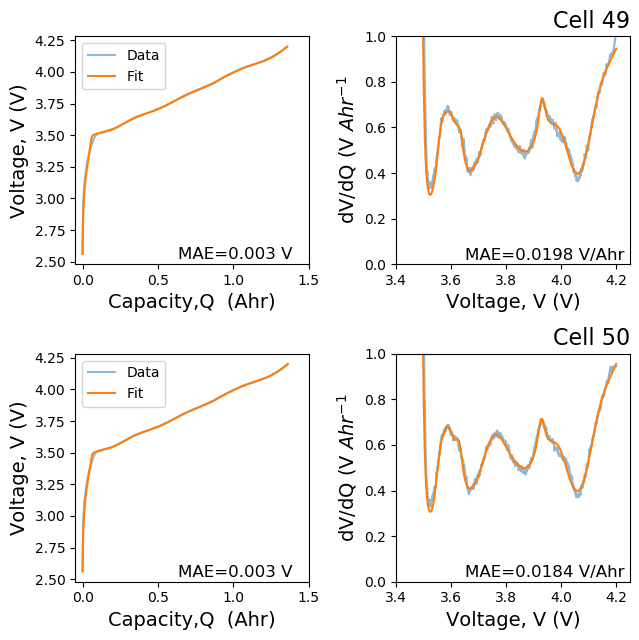

In [38]:
guess_full_600_50c = yvolt600_50c[0:(3*(nor_pos+nor_neg))]

cap600_50c, v600_50c, dqdu600_50c, dvdq600_50c = msmr.whole_cell(guess_full_600_50c, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt600_50c[-2], neg_lower_li_limit = yvolt600_50c[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                                 usable_cap = aged_600_capacity_50.max())
# MAEs

capacity_range600_50 = np.linspace(0.0, aged_600_capacity_50d.max(), 251)
fit600_50_mae_c = msmr.mae(aged_600_voltage_50, v600_50c, cap600_50c, aged_600_capacity_50, capacity_range600_50)
ocv_mae_list_600 = [fit600_49_mae_c, fit600_50_mae_c]

deriv_list = [(v600_49c, dvdq600_49c, aged_600_voltage_49, aged_600_dvdq_49),
              (v600_50c, dvdq600_50c, aged_600_voltage_50, aged_600_dvdq_50)]

deriv_mae_list_600 = [msmr.mae(item[3], (-item[1]), item[0], item[2], voltage_range_c) for item in deriv_list]

# Plotting
fig = plt.figure(figsize=(6.5, 6.5))
ax, ax2, ax3, ax4 = fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)

axes, axes_left, axes_right = [ax, ax2, ax3, ax4], [ax, ax3], [ax2, ax4]
letters = ['(a)', '(b)', '(c)', '(d)']
cells = ['Cell 49', 'Cell 50']

# Capacity vs OCV 
ax.plot(aged_600_capacity_49, aged_600_voltage_49, alpha=0.5, label='Data')
ax.plot(cap600_49c, v600_49c, label='Fit')

ax3.plot(aged_600_capacity_50, aged_600_voltage_50, alpha=0.5, label='Data')
ax3.plot(cap600_50c, v600_50c, label='Fit')

# OCV vs dU/dX
ax2.plot(aged_600_voltage_49, aged_600_dvdq_49, alpha=0.5, label='Data')
ax2.plot(v600_49c, -dvdq600_49c, label='Fit')

ax4.plot(aged_600_voltage_50, aged_600_dvdq_50, alpha=0.5, label='Data')
ax4.plot(v600_50c, -dvdq600_50c, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity,Q  (Ahr)', fontsize=14)
    axe.set_ylabel('Voltage, V (V)', fontsize=14)
    axe.text(.63, 2.52, 'MAE=%1.3f V' %ocv_mae_list_600[idx], fontsize=12)
    axe.set_xlim(-0.05, 1.5)
    axe.legend()
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Voltage, V (V)', fontsize=14)
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$', fontsize=14)
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.65, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_600[idx], fontsize=12)
    axe.set_title(cells[idx], loc='right', fontsize = 16)

fig.tight_layout()
fig.savefig('../figures/Figures SI/fit_600_replicates.png', dpi = 300)

In [39]:
fit_600_replicates = np.vstack((yvolt600_49c, yvolt600_50c))
fit_600_replicate_means = np.round(fit_600_replicates.mean(axis=0),4)
fit_600_replicate_stds = np.round(fit_600_replicates.std(axis=0),4)
print('Parameter Mean and Standard Deviations Amongst the 2 Replicates of 600 Cycles - Charge')
for i in range(0,nor_pos+nor_neg):
    print('{} +/- {} | '.format(fit_600_replicate_means[i*3], fit_600_replicate_stds[i*3]), 
          '{} +/- {} | '.format(fit_600_replicate_means[i*3+1], fit_600_replicate_stds[i*3+1]),
          '{} +/- {}'.format(fit_600_replicate_means[i*3+2], fit_600_replicate_stds[i*3+2]))


Parameter Mean and Standard Deviations Amongst the 2 Replicates of 600 Cycles - Charge
3.6919 +/- 0.0002 |  0.2166 +/- 0.0 |  0.408 +/- 0.0
3.7592 +/- 0.0 |  0.3951 +/- 0.0035 |  1.4026 +/- 0.0046
3.9184 +/- 0.0 |  0.2081 +/- 0.0129 |  2.2499 +/- 0.2022
4.2321 +/- 0.0001 |  0.4163 +/- 0.0092 |  3.7999 +/- 0.0578
3.991 +/- 0.0 |  0.2273 +/- 0.0024 |  1.7642 +/- 0.0016
4.1318 +/- 0.0021 |  0.1462 +/- 0.0067 |  0.9224 +/- 0.026
0.0666 +/- 0.0017 |  1.2662 +/- 0.0003 |  0.1682 +/- 0.0
0.1045 +/- 0.0017 |  0.5405 +/- 0.0025 |  0.1539 +/- 0.0025
0.1286 +/- 0.0008 |  0.0561 +/- 0.002 |  0.2278 +/- 0.0
0.1491 +/- 0.0002 |  0.0794 +/- 0.0019 |  0.3418 +/- 0.0
0.1739 +/- 0.001 |  0.142 +/- 0.0056 |  0.2127 +/- 0.0
0.3132 +/- 0.0 |  0.0943 +/- 0.0017 |  6.5731 +/- 0.0791


<a id='Reaction-Peaks-Over-Cycling'></a>

## Reaction Peaks Over Cycling

A graph for each reaction's parameters, or a graph with all omegas from positive reactions and another with all omegas from the negative reactions.


<p>&nbsp;</p>

[Back To Top](#top)

Charge Data


Text(0.5, 1.025, 'Negative Electrode')

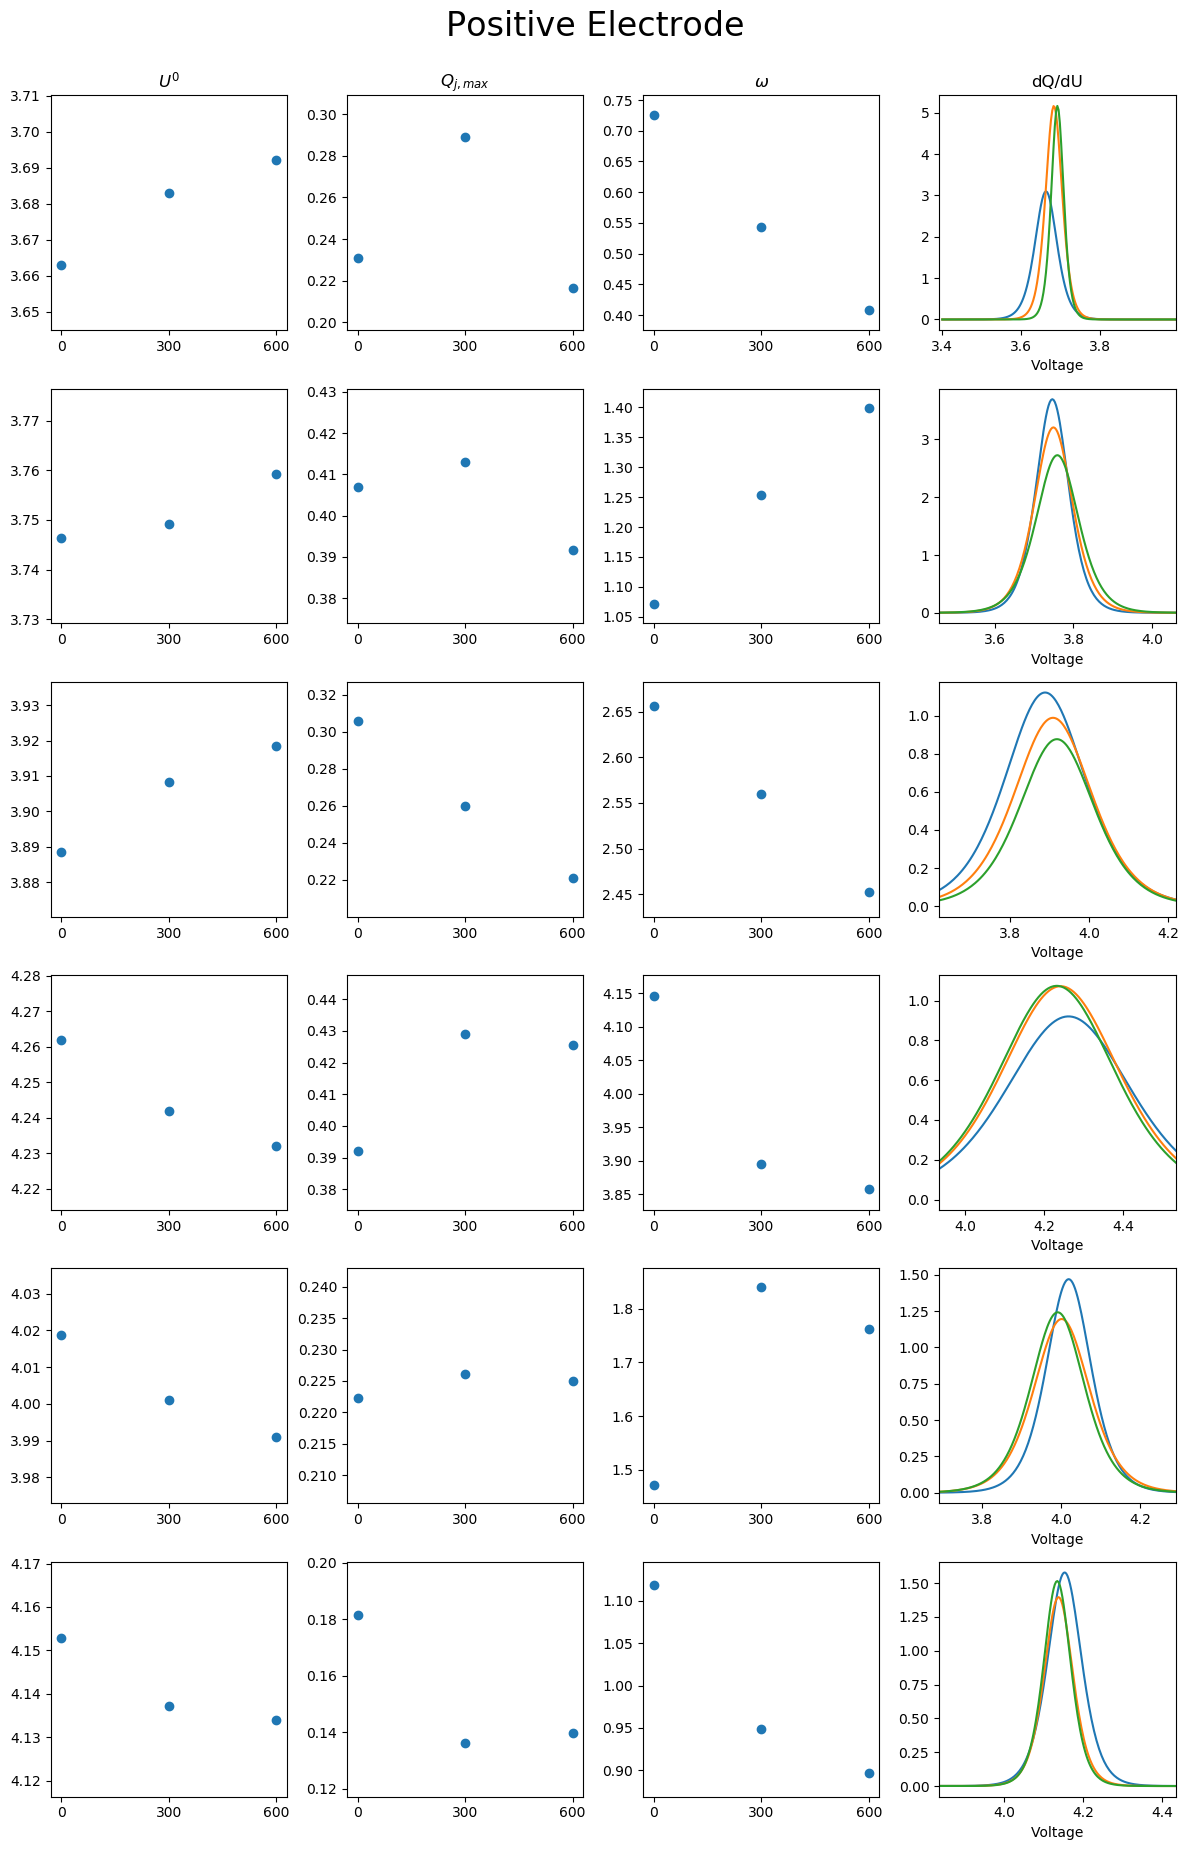

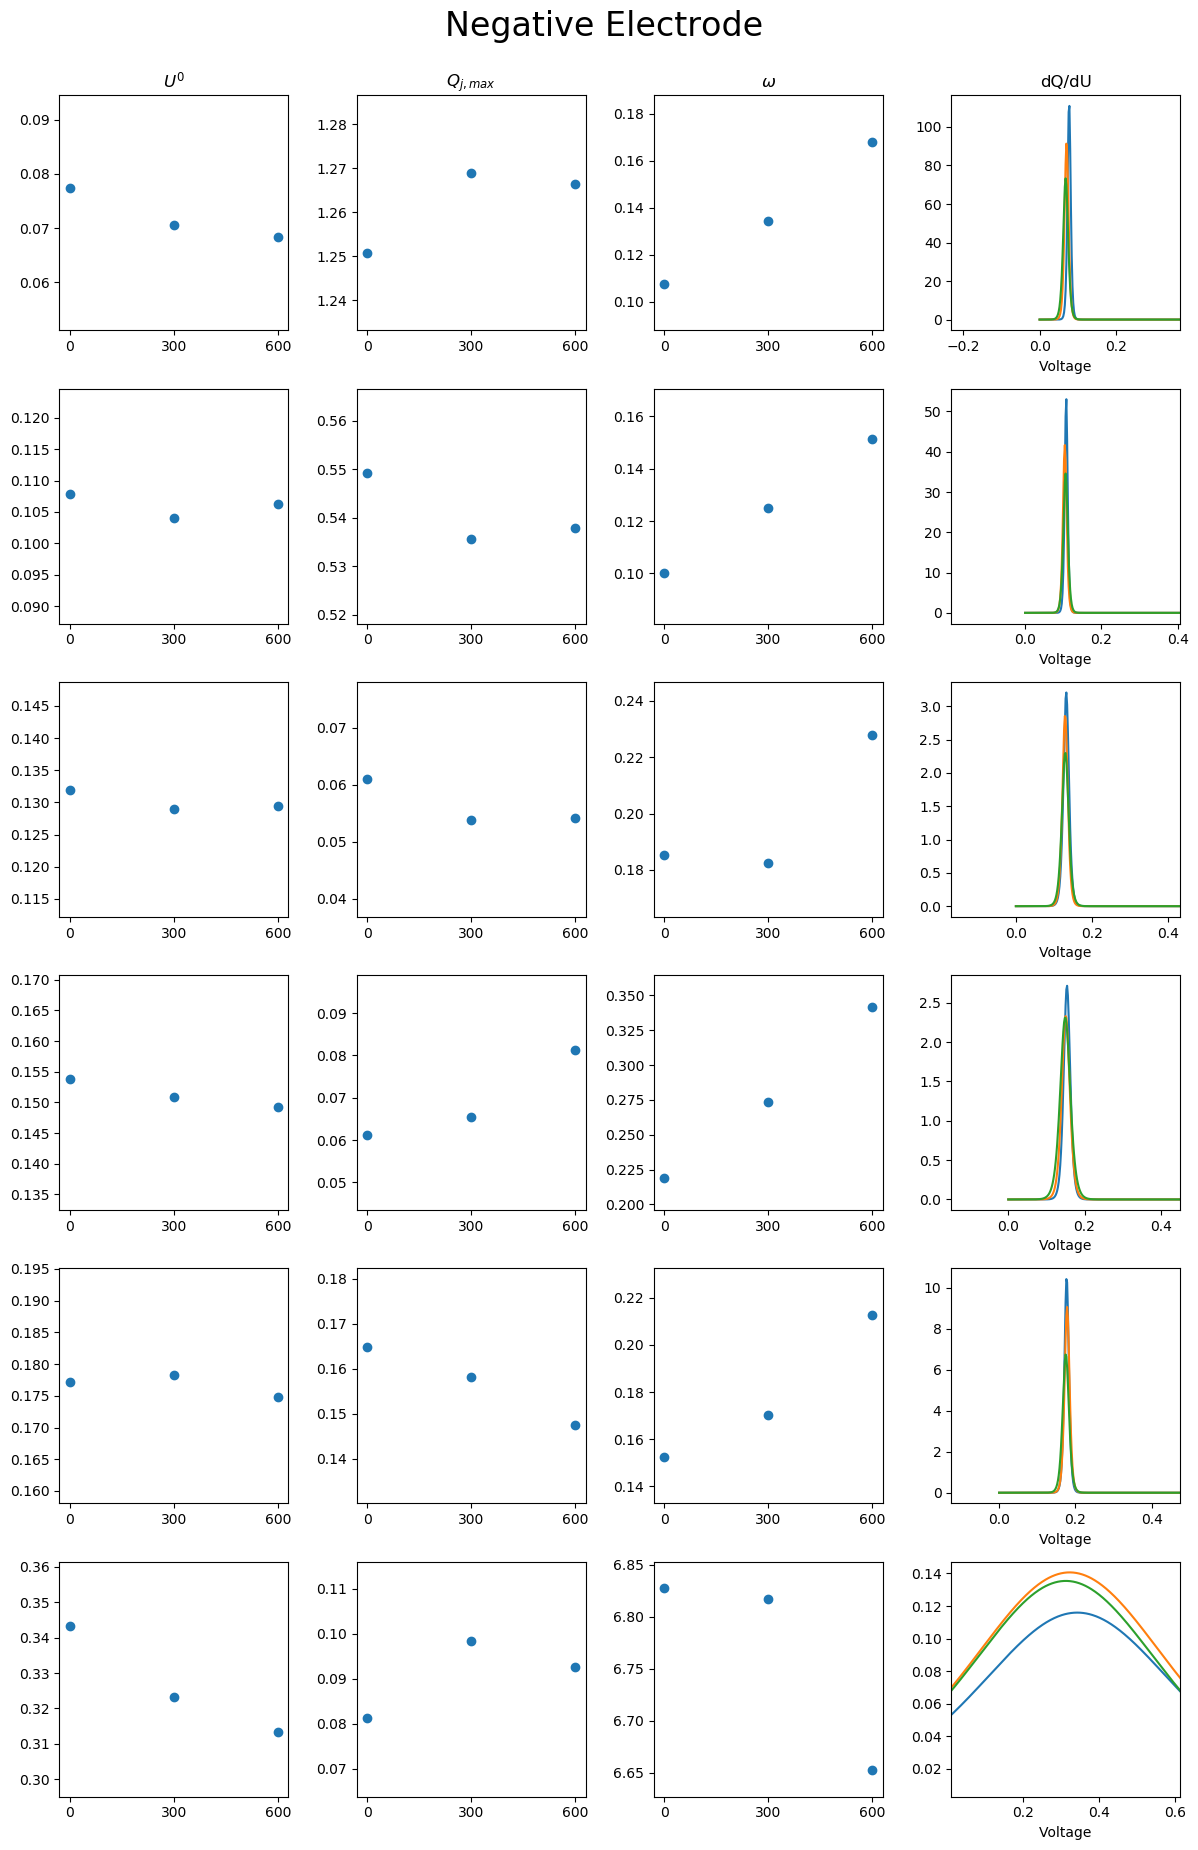

In [26]:
load_data = np.loadtxt('../supplementary-files/parameter-fits/0-300-600-charge-fit-parameters-101521-50-50split.txt')
nor_pos, nor_neg = 6, 6                              
aged_fits = [i[0:(3*(nor_pos+nor_neg))] for i in load_data]
print('Charge Data')

pos_parameter_lists, neg_parameter_lists = [], []
xj_pos_list, xj_neg_list = [0.27], [0.00]

# Populating with every reaction's parameters
for i in range(0,(nor_pos*3)):
    pos_parameter_lists.append([load_data[0][i], load_data[1][i], load_data[2][i]])
for i in range(0,(nor_neg*3)):
    neg_parameter_lists.append([load_data[0][(nor_pos*3)+i], load_data[1][(nor_pos*3)+i], load_data[2][(nor_pos*3)+i]])
for fit in load_data[1:]:
    xj_pos_list.append(fit[-4])
    xj_neg_list.append(fit[-3])

cycles = [0, 300, 600]
nrow, ncol = 6, 4
fig, axe = plt.subplots(figsize = (12, 18), nrows = nrow, ncols = ncol)
fig2, axe2 = plt.subplots(figsize = (12, 18), nrows = nrow, ncols = ncol)
axes, vs = [axe, axe2], [np.linspace(3.4, 5, 500), np.linspace(0, 1, 500)]
params_lists = [pos_parameter_lists, neg_parameter_lists]

for ax in axes:
    ax[0,0].set_title('$U^{0}$')
    ax[0,1].set_title('$Q_{j,max}$')
    ax[0,2].set_title('$\omega$')
    ax[0,3].set_title('dQ/dU')

for idx, parameter_lists in enumerate(params_lists):
    count_peak, count_U0, count_Xj, count_Wj = 0, 0, 1, 2
    for i in range(0, nrow):
        axes[idx][i,0].scatter(cycles, parameter_lists[count_U0]) # Plots each parameter's value
        axes[idx][i,1].scatter(cycles, parameter_lists[count_Xj])
        axes[idx][i,2].scatter(cycles, parameter_lists[count_Wj])    
        axes[idx][i,0].set_xticks([0,300,600]) # Changes all tick marks to be the max cycle numbers
        axes[idx][i,1].set_xticks([0,300,600])
        axes[idx][i,2].set_xticks([0,300,600])
        # Solves for each reaction for each of the cycles and centers the graph on the peak
        for j in range(0, len(parameter_lists[count_U0])):
            xj_rxn, dxdu_rxn = msmr.individual_reactions(vs[idx], parameter_lists[count_U0][j], 
                                                         parameter_lists[count_Xj][j], 
                                                         parameter_lists[count_Wj][j], 298)
            dxdu_rxn = np.nan_to_num(dxdu_rxn) # Changing nans to zeroes for equivalent length reasons
            center_volt = (vs[idx][np.argwhere(-dxdu_rxn == np.max(-dxdu_rxn))][0][0])
            axes[idx][i,3].plot(vs[idx], -dxdu_rxn, label = 'Cycle ' + str(cycles[j]))
            axes[idx][i,3].set_xlim(center_volt - 0.3, center_volt + 0.3)
            axes[idx][i,3].set_xlabel('Voltage')  
        count_U0 += 3
        count_Xj += 3
        count_Wj += 3
        
fig.tight_layout()
fig2.tight_layout()
fig.suptitle('Positive Electrode', fontsize=24, y = 1.025)
fig2.suptitle('Negative Electrode', fontsize=24, y = 1.025)

# fig.savefig('../figures/Figures SI/positive_electrode_reaction_peaks_over_cycling-charge.png', dpi = 300)
# fig2.savefig('../figures/Figures SI/negative_electrode_reaction_peaks_over_cycling-charge.png', dpi = 300)

In [27]:
print(yvolt0_51c[0:3*nor_pos][1::3].sum(), yvolt300_1c[0:3*nor_pos][1::3].sum(), yvolt600_49c[0:3*nor_pos][1::3].sum())
print(yvolt0_51c[3*nor_pos:-2][1::3].sum(), yvolt300_1c[3*nor_pos:-2][1::3].sum(), yvolt600_49c[3*nor_pos:-2][1::3].sum())

1.7398239340132504 1.7532838600571399 1.6192002002254624
2.168346094831126 2.1806124480161513 2.1799668418016642


<a id='Bootstrap-Analysis'></a>

## Bootstrap Analysis

<p>&nbsp;</p>

Bootstrapped Data
* [0 Cycles](#0-cycles-bootstrap)
* [300 Cycles](#300-cycles-bootstrap)
* [600 Cycles](#600-cycles-bootstrap)

[Back To Top](#top)

In [74]:
cell = '51'
summary = np.loadtxt(folderpath + 'cell_{}/params_and_errors/params_and_errors_of_fit_1.csv'.format(cell), delimiter=',')
for i in range(2,501):
    data = np.loadtxt(folderpath + 'cell_{}/params_and_errors/params_and_errors_of_fit_{}.csv'.format(cell, i), delimiter=',')
    summary = np.vstack((summary, data))

#np.savetxt(folderpath + 'cell_{}/params_and_errors/params_and_errors_summary.csv'.format(cell), X=summary, delimiter=',')

In [75]:
len(summary)

500

In [66]:
sum_lims1 = np.zeros([len(summary)])
sum_lims1[:] = 0.185
sum_lims[:,0] = 0.185
sum_lims[:,1] = 0.001

In [81]:
cell = '51'
summary = np.loadtxt(folderpath + 'cell_{}/params_and_errors/params_and_errors_of_fit_1.csv'.format(cell), delimiter=',')
for i in range(2,501):
    data = np.loadtxt(folderpath + 'cell_{}/params_and_errors/params_and_errors_of_fit_{}.csv'.format(cell, i), delimiter=',')
    summary = np.vstack((summary, data))

summary = np.insert(summary, -2, sum_lims[:,0], axis=1)
summary = np.insert(summary, -2, sum_lims[:,1], axis=1)

np.savetxt(folderpath + 'cell_{}/params_and_errors/params_and_errors_summary.csv'.format(cell), X=summary, delimiter=',')

In [57]:
np.insert()

array([[3.66332023e+00, 2.31034365e-01, 7.25325000e-01, ...,
        6.83763029e+00, 3.70659575e-03, 2.55975093e-02],
       [3.66276183e+00, 2.31034365e-01, 7.25325000e-01, ...,
        6.75847084e+00, 3.31130095e-03, 2.32222543e-02],
       [3.70274000e+00, 1.38620619e-01, 1.20887500e+00, ...,
        6.37594530e+00, 4.06409804e-03, 3.82632722e-02],
       ...,
       [3.66274119e+00, 2.31034365e-01, 7.25325000e-01, ...,
        6.77827297e+00, 3.24277541e-03, 2.35612215e-02],
       [3.66946377e+00, 2.31034365e-01, 7.25325000e-01, ...,
        6.95380058e+00, 3.32580181e-03, 2.36838731e-02],
       [3.66506036e+00, 2.31034365e-01, 7.25325000e-01, ...,
        6.88505954e+00, 3.37459098e-03, 2.27100398e-02]])

In [28]:
### Compiling everything into a summary file
run = False

if run == True:
    folderpath='../supplementary-files/oct_bootstrap_results/50-50/'
    cells = ['1','49','51']

    for cell in cells:
        summary = np.loadtxt(folderpath + 'cell_{}/params_and_errors/params_and_errors_of_fit_1.csv'.format(cell), delimiter=',')
        for i in range(2,501):
            data = np.loadtxt(folderpath + 'cell_{}/params_and_errors/params_and_errors_of_fit_{}.csv'.format(cell, i), delimiter=',')
            summary = np.vstack((summary, data))

        np.savetxt(folderpath + 'cell_{}/params_and_errors/params_and_errors_summary.csv'.format(cell), X=summary, delimiter=',')

In [96]:
# 50-50 split dudQ

fit_data_c = np.loadtxt('../supplementary-files/parameter-fits/0-300-600-charge-fit-parameters-101521-50-50split.txt')
fit_data_d = np.loadtxt('../supplementary-files/parameter-fits/0-300-600-discharge-fit-parameters-50-50.txt')
cells = ['cell1', 'cell49', 'cell51']
bootstrap_dict = {}

for cell in cells:
    bootstrap_dict[cell] = {}
    if cell == 'cell51':
        bootstrap_data_c = fit_data_c[0]
        bootstrap_data_d = fit_data_d[0]
        fit_capacity = fresh_capacity_51.max()
        fit_capacity_d = fresh_capacity_51d.max()
    if cell == 'cell1':
        bootstrap_data_c = fit_data_c[1]
        bootstrap_data_d = fit_data_d[1]
        fit_capacity = aged_300_capacity_1.max()
        fit_capacity_d = aged_300_capacity_1d.max()
    if cell == 'cell49':
        bootstrap_data_c = fit_data_c[2]
        bootstrap_data_d = fit_data_d[2]
        fit_capacity = aged_600_capacity_49.max()
        fit_capacity_d = aged_600_capacity_49d.max()
    
    # Charge 
    data_c = np.loadtxt('../supplementary-files/bootstrap-summary-data/50-50/{}_50_50_charge_summary.csv'.format(cell), delimiter=',')
    row_mask_c = data_c[:,-1] < 0.04
    bootstrap_dict[cell]['bootstrap_data_c'] = np.vstack((bootstrap_data_c, data_c[row_mask_c]))
    bootstrap_dict[cell]['Qpos_c'] = bootstrap_dict[cell]['bootstrap_data_c'][:,1:18:3].sum(axis=1)
    bootstrap_dict[cell]['Qpos_nmc_c'] = bootstrap_dict[cell]['bootstrap_data_c'][:,1:12:3].sum(axis=1)
    bootstrap_dict[cell]['Qpos_lmo_c'] = bootstrap_dict[cell]['bootstrap_data_c'][:,13:18:3].sum(axis=1)
    bootstrap_dict[cell]['Qneg_c'] = bootstrap_dict[cell]['bootstrap_data_c'][:,19:36:3].sum(axis=1)
    bootstrap_dict[cell]['means_list_c'] = np.mean(bootstrap_dict[cell]['bootstrap_data_c'], axis=0)
    bootstrap_dict[cell]['std_list_c'] = np.std(bootstrap_dict[cell]['bootstrap_data_c'], axis=0)
    bootstrap_dict[cell]['np_ratio_c'] = bootstrap_dict[cell]['Qneg_c']/bootstrap_dict[cell]['Qpos_c']
        
    # Adding Umin and Umax values for each iteration
    bootstrap_dict[cell]['pos_Umin_c'] = np.zeros(len(bootstrap_dict[cell]['bootstrap_data_c']))
    bootstrap_dict[cell]['neg_Umin_c'] = np.zeros(len(bootstrap_dict[cell]['bootstrap_data_c']))
    bootstrap_dict[cell]['pos_Umax_c'] = np.zeros(len(bootstrap_dict[cell]['bootstrap_data_c']))
    bootstrap_dict[cell]['neg_Umax_c'] = np.zeros(len(bootstrap_dict[cell]['bootstrap_data_c']))
    
    for i in range(0,len(bootstrap_dict[cell]['bootstrap_data_c'])):
        guess = bootstrap_dict[cell]['bootstrap_data_c'][i][0:(nor_pos+nor_neg)*3]
        pos_min, neg_min = bootstrap_dict[cell]['bootstrap_data_c'][i][-4], bootstrap_dict[cell]['bootstrap_data_c'][i][-3]
        results =  msmr.whole_cell(guess, nor_pos = 6, nor_neg = 6,
                                   pos_lower_li_limit = pos_min, neg_lower_li_limit=neg_min,
                                   temp = 298, pos_volt_range = (3.4, 5), 
                                   neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                                   usable_cap = fit_capacity, Qj_or_Xj='Qj', all_output=True)

        c, v, dqdu, dudq = results[0], results[1], results[2], results[3]

        bootstrap_dict[cell]['pos_Umin_c'][i], bootstrap_dict[cell]['pos_Umax_c'][i] = v[1].min(), v[1].max()
        bootstrap_dict[cell]['neg_Umin_c'][i], bootstrap_dict[cell]['neg_Umax_c'][i] = v[2].min(), v[2].max()

# Discharge 
    data_d = np.loadtxt('../supplementary-files/bootstrap-summary-data/50-50/{}_50_50_discharge_summary.csv'.format(cell), delimiter=',')
    row_mask_d = data_d[:,-1] < 1
    bootstrap_dict[cell]['bootstrap_data_d'] = np.vstack((bootstrap_data_d, data_d[row_mask_d]))
    bootstrap_dict[cell]['Qpos_d'] = bootstrap_dict[cell]['bootstrap_data_d'][:,1:18:3].sum(axis=1)
    bootstrap_dict[cell]['Qpos_nmc_d'] = bootstrap_dict[cell]['bootstrap_data_d'][:,1:12:3].sum(axis=1)
    bootstrap_dict[cell]['Qpos_lmo_d'] = bootstrap_dict[cell]['bootstrap_data_d'][:,13:18:3].sum(axis=1)
    bootstrap_dict[cell]['Qneg_d'] = bootstrap_dict[cell]['bootstrap_data_d'][:,19:36:3].sum(axis=1)
    bootstrap_dict[cell]['means_list_d'] = np.mean(bootstrap_dict[cell]['bootstrap_data_d'], axis=0)
    bootstrap_dict[cell]['std_list_d'] = np.std(bootstrap_dict[cell]['bootstrap_data_d'], axis=0)
    bootstrap_dict[cell]['np_ratio_d'] = bootstrap_dict[cell]['Qneg_d']/bootstrap_dict[cell]['Qpos_d']
        
    # Adding Umin and Umax values for each iteration
    bootstrap_dict[cell]['pos_Umin_d'] = np.zeros(len(bootstrap_dict[cell]['bootstrap_data_d']))
    bootstrap_dict[cell]['neg_Umin_d'] = np.zeros(len(bootstrap_dict[cell]['bootstrap_data_d']))
    bootstrap_dict[cell]['pos_Umax_d'] = np.zeros(len(bootstrap_dict[cell]['bootstrap_data_d']))
    bootstrap_dict[cell]['neg_Umax_d'] = np.zeros(len(bootstrap_dict[cell]['bootstrap_data_d']))
    
    for i in range(0,len(bootstrap_dict[cell]['bootstrap_data_d'])):
        guess = bootstrap_dict[cell]['bootstrap_data_d'][i][0:(nor_pos+nor_neg)*3]
        pos_min, neg_min = bootstrap_dict[cell]['bootstrap_data_d'][i][-4], bootstrap_dict[cell]['bootstrap_data_d'][i][-3]
        results =  msmr.whole_cell(guess, nor_pos = 6, nor_neg = 6,
                                   pos_lower_li_limit = pos_min, neg_lower_li_limit=neg_min,
                                   temp = 298, pos_volt_range = (3.4, 5), 
                                   neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                                   usable_cap = fit_capacity_d, Qj_or_Xj='Qj', all_output=True)

        c, v, dqdu, dudq = results[0], results[1], results[2], results[3]

        bootstrap_dict[cell]['pos_Umin_d'][i], bootstrap_dict[cell]['pos_Umax_d'][i] = v[1].min(), v[1].max()
        bootstrap_dict[cell]['neg_Umin_d'][i], bootstrap_dict[cell]['neg_Umax_d'][i] = v[2].min(), v[2].max()

In [55]:
for i in range(1,500):
    guess = np.loadtxt('../supplementary-files/oct_bootstrap_results/50-50/cell_51/params_and_errors/params_and_errors_of_fit_{}.csv'.format(i), delimiter=',')
    results = msmr.whole_cell(guess[0:36], nor_pos = 6, nor_neg = 6,
                              pos_lower_li_limit = 0.185, neg_lower_li_limit=0.001,
                              temp = 298, pos_volt_range = (3.4, 5), 
                              neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                              usable_cap = fresh_capacity_51.max(), Qj_or_Xj='Qj', all_output=True)

    c, v, dqdu, dudq = results[0], results[1], results[2], results[3]

    #print(pos_min, neg_min)

    #print(v[1].min(), v[1].max())
    #print(v[2].min(), v[2].max())

    print(v[1].min()-v[2].max(), v[1].max()-v[2].min())


2.5610001800848052 4.19999999396395
2.560999988928179 4.200000023140578
2.5609998497585877 4.200000020258889
2.560999835117325 4.199999577944272
2.561000084584324 4.199999823160338
2.5609994514266163 4.199999997376063
2.560999543839829 4.200000095196335
2.560999984210247 4.19999998177886
2.56100000335882 4.200000016322959
2.5610000007789795 4.199999969127506
2.5609996152991505 4.199999879198801
2.5610000171375873 4.199999946944216
2.560999907649279 4.2000001391666535
2.5609999804089347 4.200000015024763
2.5610000017031047 4.1999999066562665
2.560999413867567 4.199999967876785
2.560999991350392 4.1999999943473085
2.560999974942579 4.20000000428367
2.5609995225230575 4.199999838729605
2.5610000434104387 4.199999991100839
2.560999893342746 4.199999246167853
2.5609999789572475 4.199999985366431
2.5609999873083864 4.1999999438342766
2.560999855647106 4.199999773386197
2.5610001963501663 4.199999354313006
2.5610001233166644 4.199999994855085
2.5609998613240306 4.200000016273448
2.56099989867

2.561000000237031 4.199999998030617
2.5610004175035805 4.2000000682441305
2.5610000647040385 4.200000006315484
2.560999993242769 4.200000002979886
2.5609999671267225 4.199999993756703
2.560999336441369 4.199999672883751
2.561000088056285 4.199999867852546
2.560999988775234 4.199999982074725
2.561000645722736 4.20000001366917
2.560999998484996 4.199999954072813
2.561000052652913 4.200000006617465
2.5610000068394005 4.199999946851641
2.561000014108458 4.199999980914926
2.560999485348994 4.199999975159227
2.560999581058663 4.199999987969406
2.5609999865609225 4.199999988082628
2.560999981429673 4.199999959304354
2.5609999240876644 4.199999991561749
2.5609997037225876 4.199999924067738
2.5610000166398788 4.199999879575052
2.5609999854128915 4.199999961986241
2.561000077090822 4.200000013794847
2.5610002675615355 4.199999999780266
2.5609995808909813 4.199999990410372
2.5610000203273553 4.199999630888555
2.5609998721831304 4.19999999194324
2.5610000005350253 4.19999992647946
2.56099998826626

2.5609996305015543 4.200000034339361
2.560999984385287 4.200000022200194
2.560999942592276 4.199999825288182
2.5609999949252154 4.200000050636033
2.5609997862957483 4.199999930400856
2.560999737864337 4.200000005067352
2.561000199143556 4.199999976181115
2.5609999791292415 4.199999999882666
2.560999653469433 4.1999999757836415
2.560999838510643 4.199999968918702
2.5610000205480894 4.199999878418721
2.56100000266214 4.20000004930383
2.5610001875736628 4.200000025170233
2.5609999717996823 4.200000010681473
2.5609999026088532 4.199999979670377
2.561000089297515 4.199999960373865
2.5609999614709498 4.2000000171129095
2.5609999886965302 4.199999994911062
2.5610000071817343 4.200000001616548
2.5609999937298014 4.199999985151382
2.560999955740244 4.199999988728066
2.560999512286795 4.199999989292942
2.5610002052638285 4.199999997942562
2.5610001383317145 4.199999994418599
2.561000035674006 4.200000003436625
2.5609997639789337 4.19999979831742


<a id='0-cycles-bootstrap'></a>

### 0 Cycles

<p>&nbsp;</p>

[Bootstrap Analysis](#Bootstrap-Analysis)
<p>&nbsp;</p>
All histograms have the black vertical lines representing the mean value and dotted vertical lines are the parameter value used in the best fits shown above)

Histograms to plot

1) OCV error
2) dUdQ Error
3) Qpos
4) Qneg
5) NP Ratio
6) Umin+
7) Umax+
8) Umin-
9) Umin+

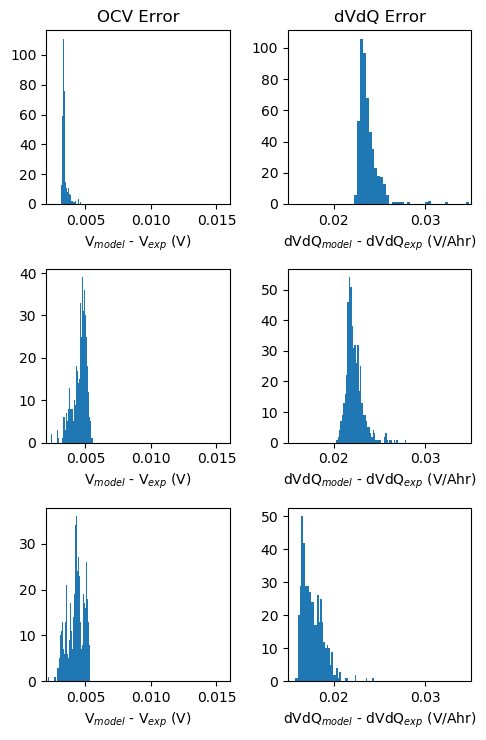

In [97]:
error_params = ['OCV Error', ' dVdQ Error']
base_len=2.5
fig, ax1 = plt.subplots(figsize=(base_len*len(error_params), base_len*3), nrows=3, ncols=len(error_params))
cells = ['cell51', 'cell1', 'cell49']
cycles = ['0 Cycles', '300 Cycles', '600 Cycles']

for idx, cell in enumerate(cells):
    ax1[idx,0].hist(bootstrap_dict[cell]['bootstrap_data_c'][:,-2], bins=50)
    ax1[idx,1].hist(bootstrap_dict[cell]['bootstrap_data_c'][:,-1], bins=50)
    ax1[idx,0].set_xlim(0.002, 0.016)
    ax1[idx,0].ticklabel_format(axis="x", style="sci")
    ax1[idx,0].set_xlabel('V$_{model}$ - V$_{exp}$ (V)')
    
    ax1[idx,1].set_xlim(0.015, 0.035)
    ax1[idx,1].ticklabel_format(axis="x", style="sci")
    ax1[idx,1].set_xlabel('dVdQ$_{model}$ - dVdQ$_{exp}$ (V/Ahr)')
    
ax1[0,0].set_title('OCV Error')
ax1[0,1].set_title('dVdQ Error')
plt.tight_layout()
#fig.savefig('../figures/Figure 5/bootstrapped_compiled_errors.png', dpi = 300, bbox_inches='tight')

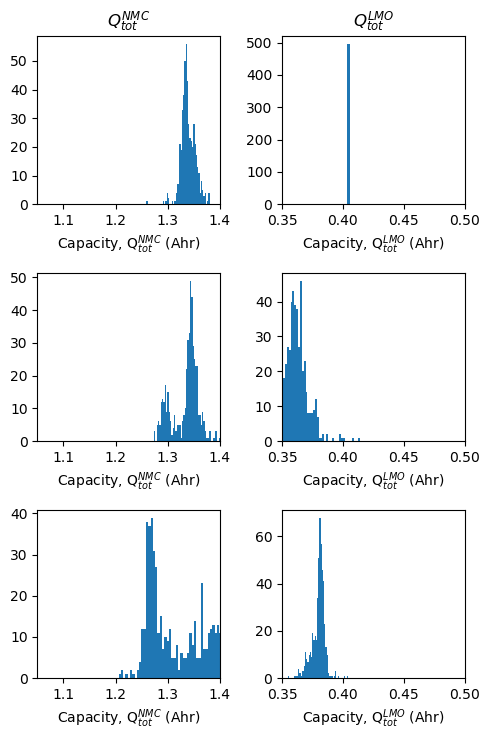

In [98]:
capacity_params = ['Qpos_nmc_c', 'Qpos_lmo_c']
base_len=2.5
fig, ax = plt.subplots(figsize=(base_len*len(capacity_params), base_len*3), nrows=3, ncols=len(capacity_params))
cells = ['cell51', 'cell1', 'cell49']
cycles = ['0 Cycles', '300 Cycles', '600 Cycles']

for j in range(0,len(capacity_params)):
    for idx, cell in enumerate(cells):
        if cell == 'cell51' and j == 1:
            ax[idx,j].hist(bootstrap_dict[cell][capacity_params[j]], bins=10)
        else:
            ax[idx,j].hist(bootstrap_dict[cell][capacity_params[j]], bins=50)
    
for i in range(0,3):
    ax[i,0].set_xlabel("Capacity, Q$_{tot}^{NMC}$ (Ahr)")
    ax[i,0].set_xlim(1.05, 1.4)
    ax[i,1].set_xlabel("Capacity, Q$_{tot}^{LMO}$ (Ahr)")
    ax[i,1].set_xlim(0.35, 0.5)

ax[0,0].set_title('$Q_{tot}^{NMC}$')
ax[0,1].set_title('$Q_{tot}^{LMO}$')

plt.tight_layout()
#fig.savefig('../figures/Figure 5/bootstrapped_compiled_capacities_LMO-NMC-0-100.png', dpi = 300, bbox_inches='tight')

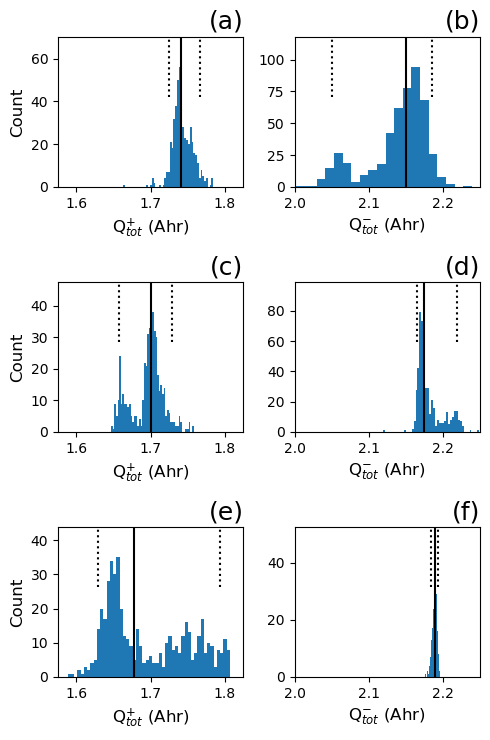

In [106]:
capacity_params = ['Qpos_c', 'Qneg_c']
base_len=2.5
fig, ax = plt.subplots(figsize=(base_len*len(capacity_params), base_len*3), nrows=3, ncols=len(capacity_params))
cells = ['cell51', 'cell1', 'cell49']
cycles = ['0 Cycles', '300 Cycles', '600 Cycles']

for j in range(0,len(capacity_params)):
    for idx, cell in enumerate(cells):
        y,x, _ = ax[idx,j].hist(bootstrap_dict[cell][capacity_params[j]], bins=50)
        ax[idx,j].axvline(x=np.median(bootstrap_dict[cell][capacity_params[j]]), color='k')
        lower_percentile = np.percentile(bootstrap_dict[cell][capacity_params[j]], 5)
        upper_percentile = np.percentile(bootstrap_dict[cell][capacity_params[j]], 95)
        ax[idx,j].plot((lower_percentile, lower_percentile), (2.25*y.max()/3, 500), color='k', ls=':')
        ax[idx,j].plot((upper_percentile, upper_percentile), (2.25*y.max()/3, 500), color='k', ls=':')
        ax[idx,j].set_ylim(0, y.max()*1.25)
    
for i in range(0,3):
    ax[i,0].set_xlabel("Q$_{tot}^{+}$ (Ahr)", fontsize=12)
    ax[i,0].set_xlim(1.575, 1.825)
    ax[i,1].set_xlabel("Q$_{tot}^{-}$ (Ahr)", fontsize=12)
    ax[i,1].set_xlim(2, 2.25)
    ax[i,0].set_ylabel('Count', fontsize=12)

ax[0,0].set_title('(a)', loc='right', fontsize = 18)
ax[0,1].set_title('(b)', loc='right', fontsize = 18)
ax[1,0].set_title('(c)', loc='right', fontsize = 18)
ax[1,1].set_title('(d)', loc='right', fontsize = 18)
ax[2,0].set_title('(e)', loc='right', fontsize = 18)
ax[2,1].set_title('(f)', loc='right', fontsize = 18)    

plt.tight_layout()
fig.savefig('../figures/Figure 5/figure_5.png', dpi = 300, bbox_inches='tight')

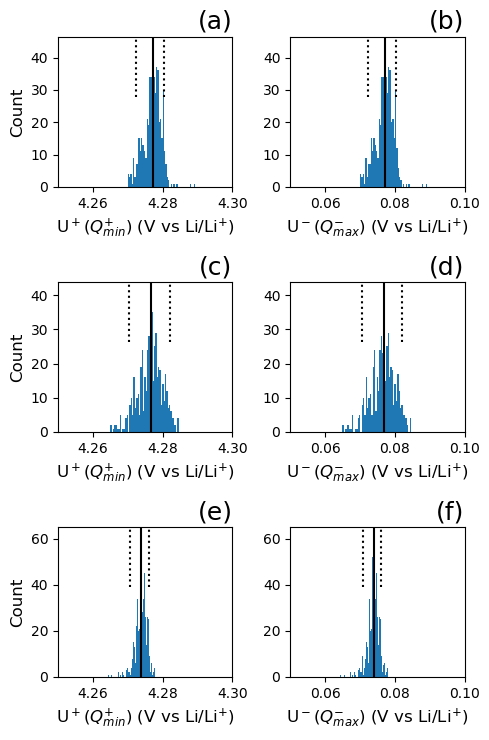

In [100]:
top_of_charge_params = ['pos_Umax_c', 'neg_Umin_c']
base_len=2.5
fig, ax = plt.subplots(figsize=(base_len*len(top_of_charge_params), base_len*3), nrows=3, ncols=len(capacity_params))
cells = ['cell51', 'cell1', 'cell49']
cycles = ['0 Cycles', '300 Cycles', '600 Cycles']

for j in range(0,len(top_of_charge_params)):
    for idx, cell in enumerate(cells):
        y,x, _ = ax[idx,j].hist(bootstrap_dict[cell][top_of_charge_params[j]], bins=50)
        ax[idx,j].axvline(x=np.median(bootstrap_dict[cell][top_of_charge_params[j]]), color='k')
        lower_percentile = np.percentile(bootstrap_dict[cell][top_of_charge_params[j]], 5)
        upper_percentile = np.percentile(bootstrap_dict[cell][top_of_charge_params[j]], 95)
        ax[idx,j].plot((lower_percentile, lower_percentile), (2.25*y.max()/3, 500), color='k', ls=':')
        ax[idx,j].plot((upper_percentile, upper_percentile), (2.25*y.max()/3, 500), color='k', ls=':')
        ax[idx,j].set_ylim(0, y.max()*1.25)
    
for i in range(0,3):
    ax[i,0].set_xlabel('U$^+$($Q_{min}^{+}$) (V vs Li/Li$^{+}$)', fontsize=12)
    ax[i,1].set_xlabel('U$^-$($Q_{max}^{-}$) (V vs Li/Li$^{+}$)', fontsize=12)
    ax[i,0].set_xlim(4.25, 4.3)
    ax[i,1].set_xlim(0.05, 0.1)
    ax[i,0].set_ylabel('Count', fontsize=12)
    
ax[0,0].set_title('(a)', loc='right', fontsize = 18)
ax[0,1].set_title('(b)', loc='right', fontsize = 18)
ax[1,0].set_title('(c)', loc='right', fontsize = 18)
ax[1,1].set_title('(d)', loc='right', fontsize = 18)
ax[2,0].set_title('(e)', loc='right', fontsize = 18)
ax[2,1].set_title('(f)', loc='right', fontsize = 18)

plt.tight_layout()
fig.savefig('../figures/Figure 6/figure_6.png', dpi = 300, bbox_inches='tight')

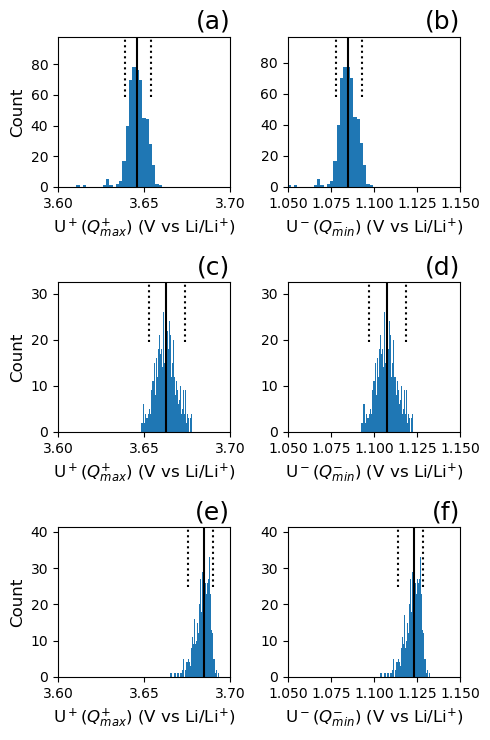

In [102]:
bot_of_charge_params = ['pos_Umin_c', 'neg_Umax_c']
base_len=2.5
fig, ax = plt.subplots(figsize=(base_len*len(bot_of_charge_params), base_len*3), nrows=3, ncols=len(capacity_params))
cells = ['cell51', 'cell1', 'cell49']
cycles = ['0 Cycles', '300 Cycles', '600 Cycles']

for j in range(0,len(top_of_charge_params)):
    for idx, cell in enumerate(cells):
        y,x, _ = ax[idx,j].hist(bootstrap_dict[cell][bot_of_charge_params[j]], bins=50)
        ax[idx,j].axvline(x=np.median(bootstrap_dict[cell][bot_of_charge_params[j]]), color='k')
        lower_percentile = np.percentile(bootstrap_dict[cell][bot_of_charge_params[j]], 5)
        upper_percentile = np.percentile(bootstrap_dict[cell][bot_of_charge_params[j]], 95)
        ax[idx,j].plot((lower_percentile, lower_percentile), (2.25*y.max()/3, 500), color='k', ls=':')
        ax[idx,j].plot((upper_percentile, upper_percentile), (2.25*y.max()/3, 500), color='k', ls=':')
        ax[idx,j].set_ylim(0, y.max()*1.25)
    
for i in range(0,3):
    ax[i,0].set_xlabel('U$^+$($Q_{max}^{+}$) (V vs Li/Li$^{+}$)', fontsize=12)
    ax[i,1].set_xlabel('U$^-$($Q_{min}^{-}$) (V vs Li/Li$^{+}$)', fontsize=12)
    ax[i,0].set_xlim(3.6, 3.7)
    ax[i,1].set_xlim(1.05, 1.15)
    ax[i,0].set_ylabel('Count', fontsize=12)
    
ax[0,0].set_title('(a)', loc='right', fontsize = 18)
ax[0,1].set_title('(b)', loc='right', fontsize = 18)
ax[1,0].set_title('(c)', loc='right', fontsize = 18)
ax[1,1].set_title('(d)', loc='right', fontsize = 18)
ax[2,0].set_title('(e)', loc='right', fontsize = 18)
ax[2,1].set_title('(f)', loc='right', fontsize = 18)

plt.tight_layout()
fig.savefig('../figures/Figure 7/figure_7.png', dpi = 300, bbox_inches='tight')

In [26]:
guess = np.loadtxt('../supplementary-files/oct_bootstrap_results/50-50/cell_1/params_and_errors/params_and_errors_of_fit_150.csv', delimiter=',')
results = msmr.whole_cell(guess[0:36], nor_pos = 6, nor_neg = 6,
                          pos_lower_li_limit = guess[-4], neg_lower_li_limit=guess[-3],
                          temp = 298, pos_volt_range = (3.4, 5), 
                          neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                          usable_cap = aged_300_capacity_1.max(), Qj_or_Xj='Qj', all_output=True)

c, v, dqdu, dudq = results[0], results[1], results[2], results[3]

#print(pos_min, neg_min)

print(v[1].min(), v[1].max())
print(v[2].min(), v[2].max())

print(v[1].min()-v[2].max())
print(v[1].max()-v[2].min())
print(guess[1:18:3].sum(), guess[19:36:3].sum())

3.659142931953976 4.275094122514671
0.07512412213104507 1.103792950674303
2.555349981279673
4.199970000383625
1.7042186025420718 2.171693821587242


In [43]:
guess = np.loadtxt('../supplementary-files/oct_bootstrap_results/50-50/cell_49/params_and_errors/params_and_errors_of_fit_298.csv', delimiter=',')
results = msmr.whole_cell(guess[0:36], nor_pos = 6, nor_neg = 6,
                          pos_lower_li_limit = guess[-4], neg_lower_li_limit=guess[-3],
                          temp = 298, pos_volt_range = (3.4, 5), 
                          neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                          usable_cap = aged_600_capacity_49.max(), Qj_or_Xj='Qj', all_output=True)

c, v, dqdu, dudq = results[0], results[1], results[2], results[3]

#print(pos_min, neg_min)

print(v[1].min(), v[1].max())
print(v[2].min(), v[2].max())

print(v[1].min()-v[2].max())
print(v[1].max()-v[2].min())
print(guess[1:18:3].sum(), guess[19:36:3].sum())

3.68277612011047 4.273630990317813
0.07366098934240255 1.1214761296216793
2.5612999904887905
4.19997000097541
1.6475840338934398 2.1896561207486887


histogram of U at Qmins and histogram of U at Qmaxs

Don't feel the need yet to implement the relationship Umin (Work to be done)
Instead, just find the histogram of the error of Qmin-neg versus what we get out.

In [100]:
i = 150
cell = 'cell49'
guess = bootstrap_dict[cell]['bootstrap_data_c'][i][0:(nor_pos+nor_neg)*3]
pos_min, neg_min = bootstrap_dict[cell]['bootstrap_data_c'][i][-4], bootstrap_dict[cell]['bootstrap_data_c'][i][-3]
results = msmr.whole_cell(guess, nor_pos = 6, nor_neg = 6,
                          pos_lower_li_limit = pos_min, neg_lower_li_limit=neg_min,
                          temp = 298, pos_volt_range = (3.4, 5), 
                          neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                          usable_cap = aged_300_capacity_1.max(), Qj_or_Xj='Qj', all_output=True)

c, v, dqdu, dudq = results[0], results[1], results[2], results[3]

print(pos_min, neg_min)

print(v[1].min(), v[1].max())
print(v[2].min(), v[2].max())

print(v[1].min()-v[2].max())
print(v[1].max()-v[2].min())


0.18368876100700654 0.0004282338766377041
3.6555293946230503 4.283427619257601
0.08277190411304906 1.115690748361729
2.5398386462613214
4.200655715144552


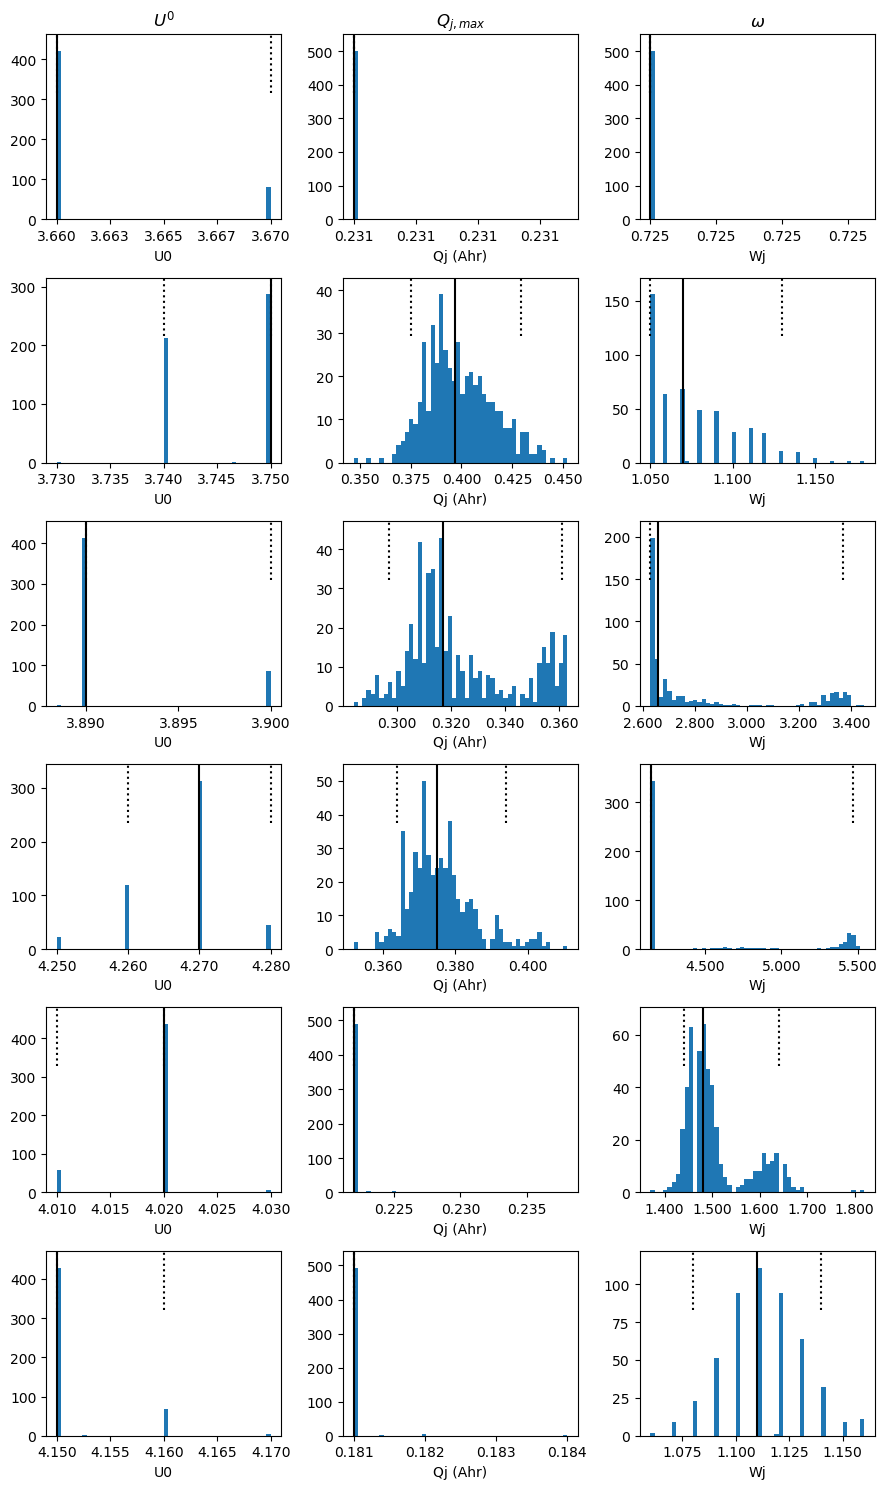

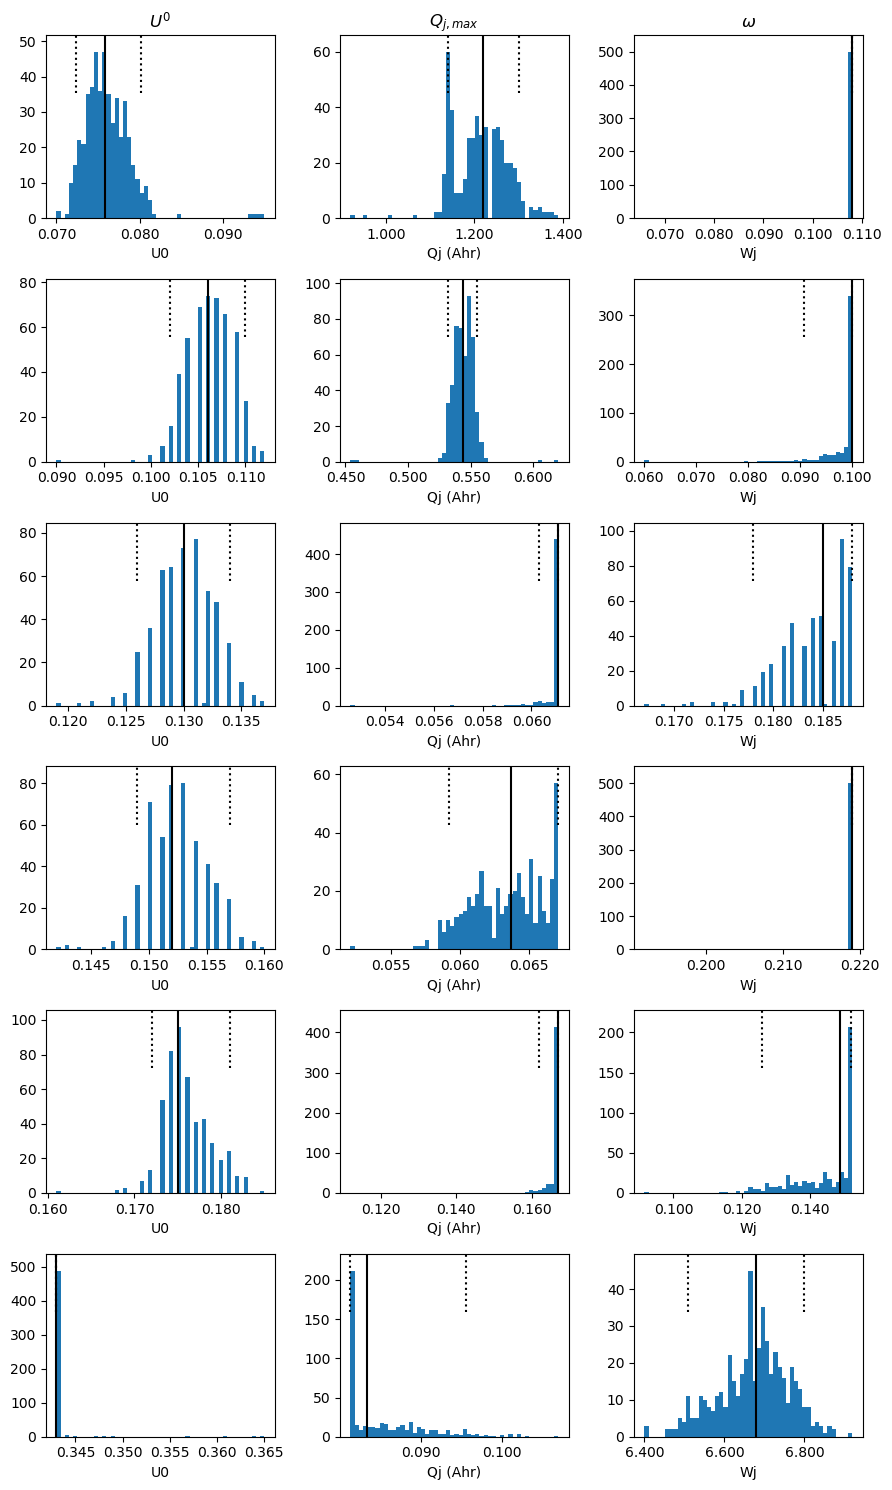

In [48]:
pos_0_fig_c, pos_0_modes_c = mp.plot_parameters_bootstrap(bootstrap_dict['cell51']['bootstrap_data_c'], 'pos', True)
neg_0_fig_c, neg_0_modes_c = mp.plot_parameters_bootstrap(bootstrap_dict['cell51']['bootstrap_data_c'], 'neg', True)

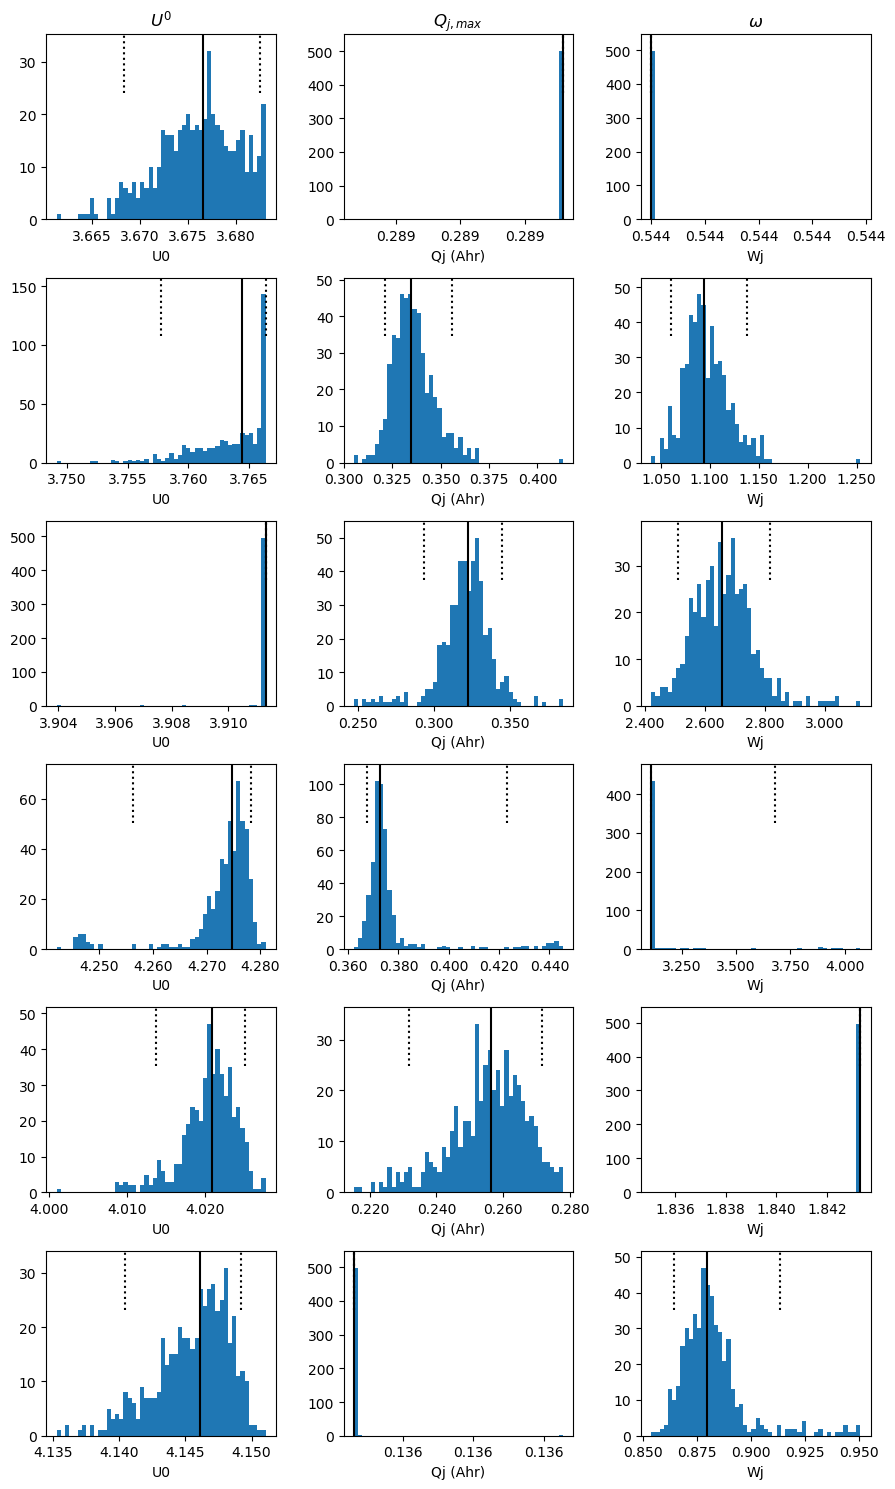

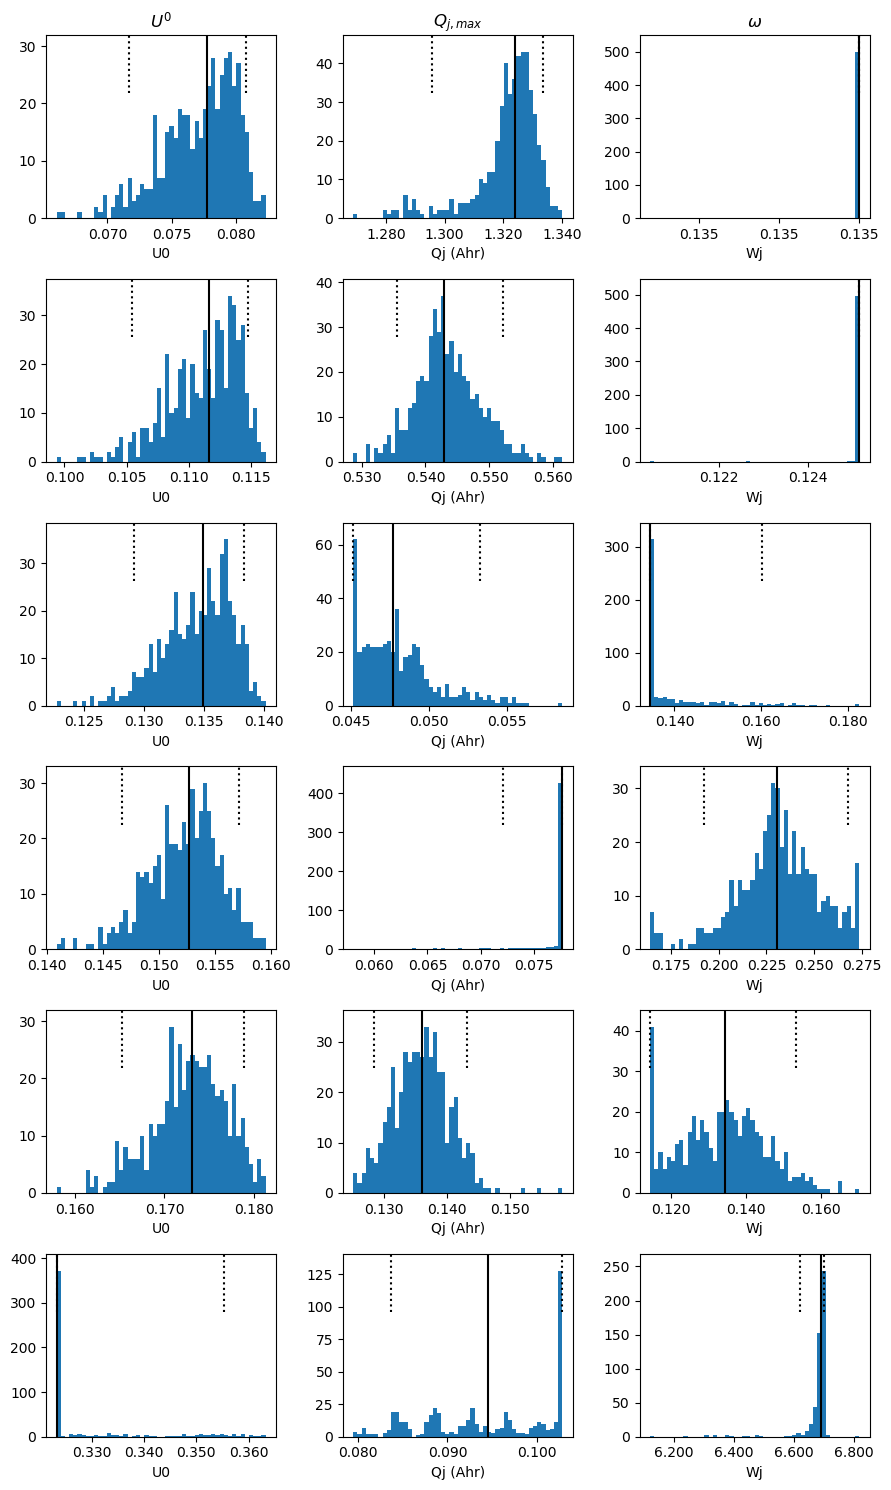

In [49]:
pos_300_fig_c, pos_300_modes_c = mp.plot_parameters_bootstrap(bootstrap_dict['cell1']['bootstrap_data_c'], 'pos', True)
neg_300_fig_c, neg_300_modes_c = mp.plot_parameters_bootstrap(bootstrap_dict['cell1']['bootstrap_data_c'], 'neg', True)

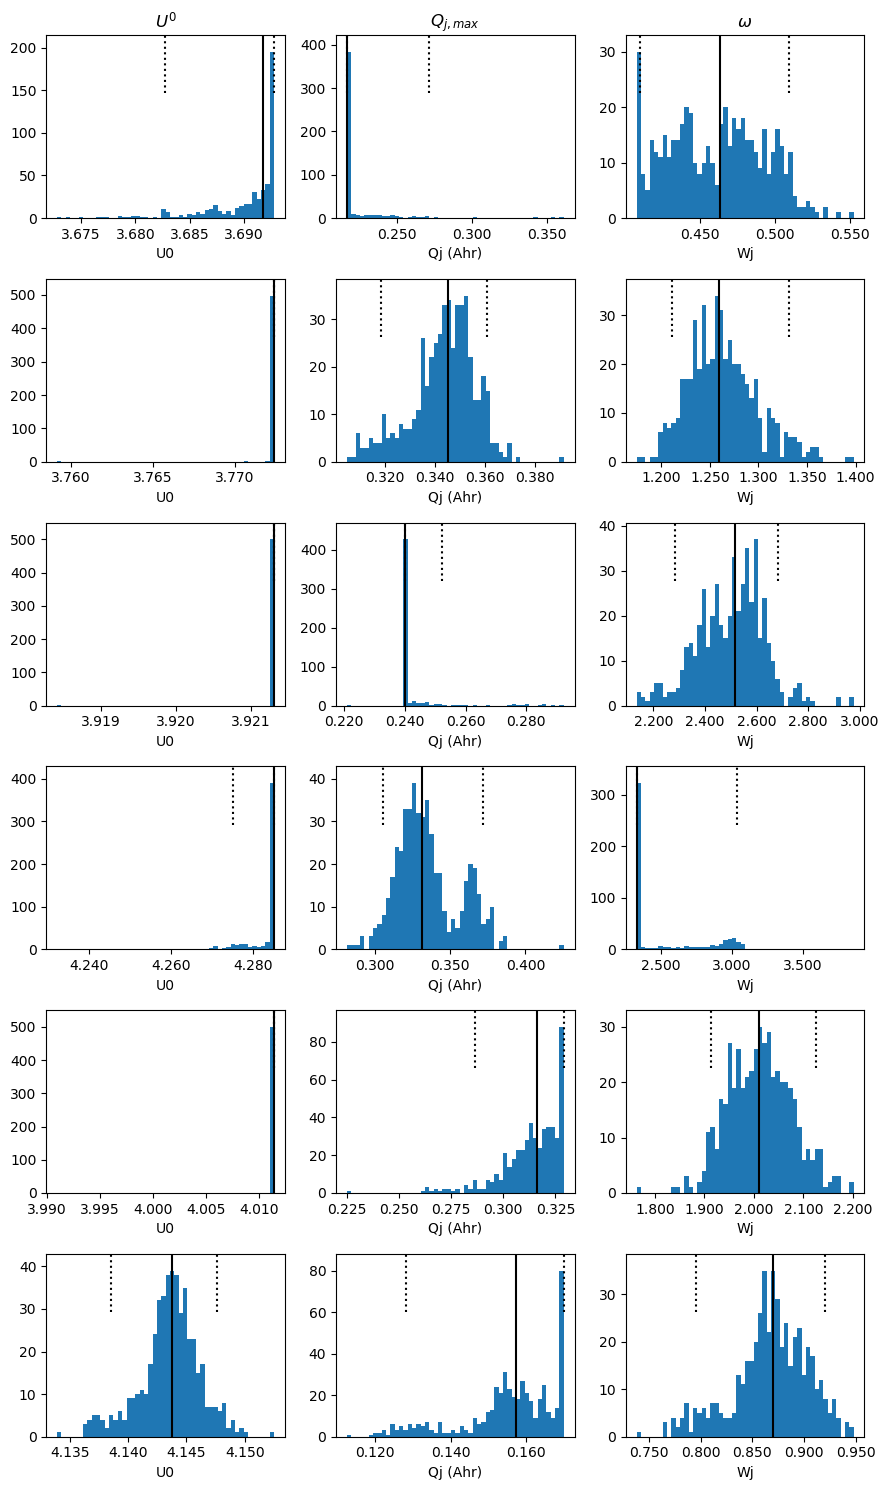

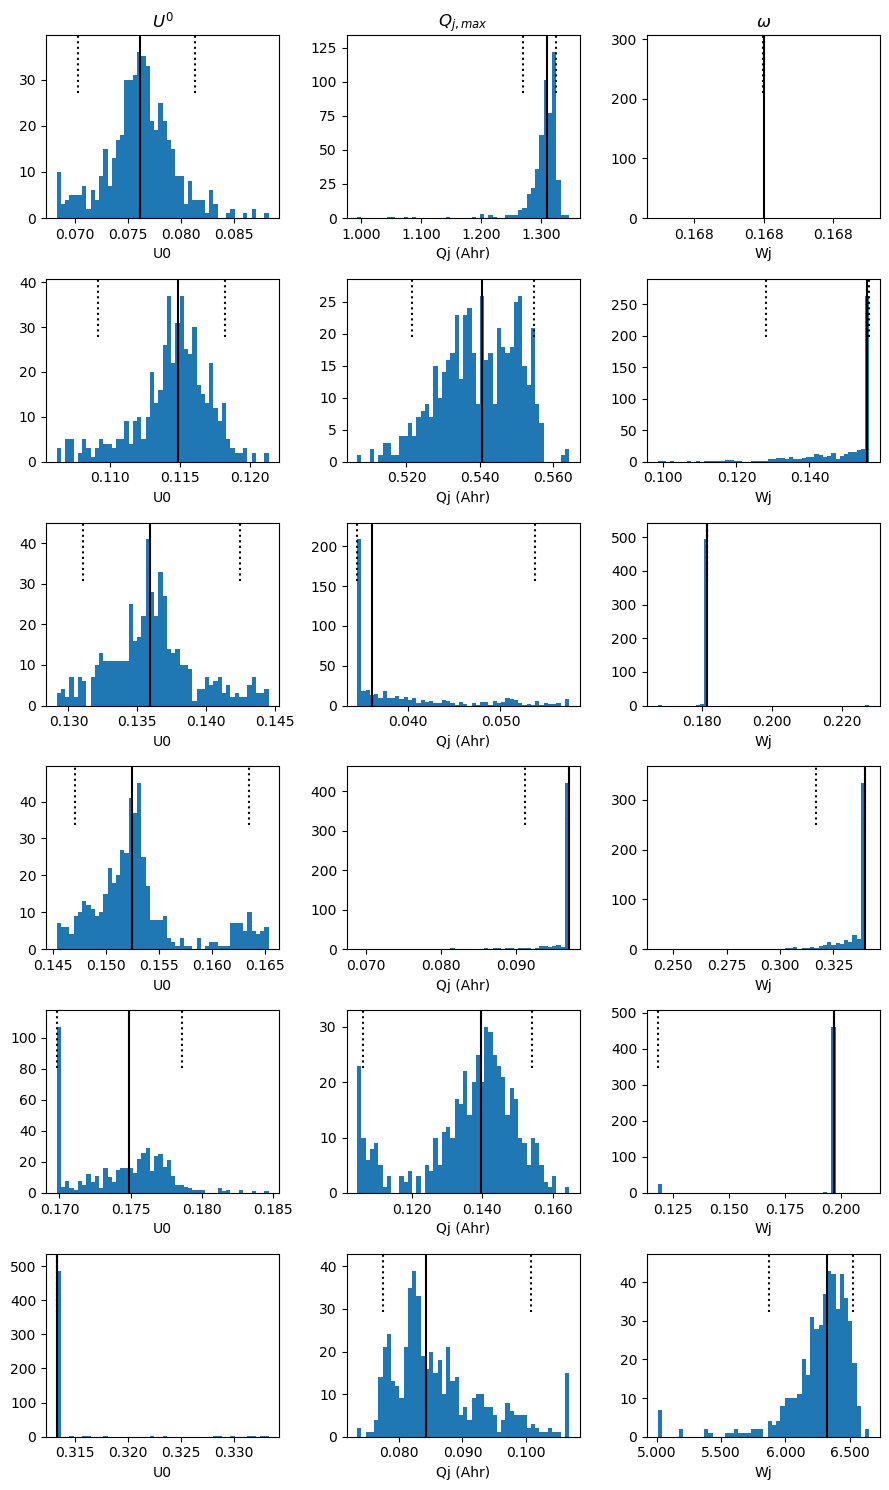

In [50]:
pos_600_fig_c, pos_600_modes_c = mp.plot_parameters_bootstrap(bootstrap_dict['cell49']['bootstrap_data_c'], 'pos', True)
neg_600_fig_c, neg_600_modes_c = mp.plot_parameters_bootstrap(bootstrap_dict['cell49']['bootstrap_data_c'], 'neg', True)

In [79]:
pos_0_fig_c.savefig('../figures/Figures SI/bootstrap/pos0_charge.png', dpi = 300)
neg_0_fig_c.savefig('../figures/Figures SI/bootstrap/neg0_charge.png', dpi = 300)

pos_300_fig_c.savefig('../figures/Figures SI/bootstrap/pos300_charge.png', dpi = 300)
neg_300_fig_c.savefig('../figures/Figures SI/bootstrap/neg300_charge.png', dpi = 300)

pos_600_fig_c.savefig('../figures/Figures SI/bootstrap/pos600_charge.png', dpi = 300)
neg_600_fig_c.savefig('../figures/Figures SI/bootstrap/neg600_charge.png', dpi = 300)

<a id= 'Discharged-Fitting-Results'></a>

### Discharged Fitting Results

* [Discharged Fitting](#Discharged-Fitting)
* [Discharged Replicate Fitting](#Discharged-Replicates)
* [Discharged - Reaction Peaks over Cycling](#Discharged-Reaction-Peaks-Over-Cycling)
* [Discharged Bootstrapped Results](#Discharged-Bootstrapped-Results)
<p>&nbsp;</p>

[Back To Top](#top)

<a id= 'Discharged-Fitting'></a>

#### Discharged Fitting

0.18750592973080085 0.00032239348456072973


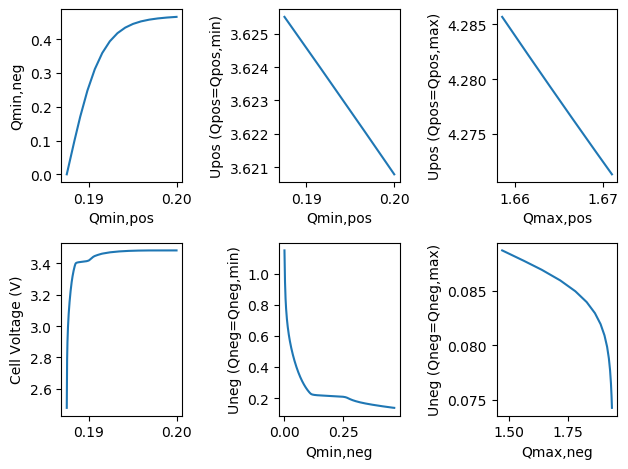

In [48]:
usable_cap = fresh_capacity_51d.max()
lower_v_limit = fresh_voltage_51d.min()
upper_v_limit = fresh_voltage_51d.max()
blend_volt, blend_cap, blend_dqdu = pos_whole
graph_volt, graph_cap, graph_dqdu = neg_whole
f_pos_cap_interp = interp1d(blend_cap, blend_volt, fill_value='extrapolate')
f_neg_cap_interp = interp1d(graph_cap, graph_volt, fill_value='extrapolate')

f_pos_v_interp = interp1d(blend_volt, blend_cap, fill_value='extrapolate')
f_neg_v_interp = interp1d(graph_volt, graph_cap, fill_value='extrapolate')

pos_low_li_np = np.linspace(0.18, 0.2, 2000)

pos_low_li_lims, neg_low_li_lims = np.array([]), np.array([])
pos_high_li_lims, neg_high_li_lims = pos_low_li_lims + usable_cap, np.array([])
pos_upp_vs, neg_low_vs = np.array([]), np.array([])
pos_low_vs, neg_upp_vs = np.array([]), np.array([])
lower_voltages = np.array([])

for i in pos_low_li_np:
    pos_upper_v = f_pos_cap_interp(i+usable_cap) # Lower voltage because higher fill
    pos_lower_v = f_pos_cap_interp(i) # Higher voltage because lower fill
    neg_upper_v = pos_lower_v - upper_v_limit # Calculates 4.2 V
    if neg_upper_v < 0:
        pass
    elif neg_upper_v >= 0:
        neg_upper_q = f_neg_v_interp(neg_upper_v)
        neg_lower_q = neg_upper_q - usable_cap
        neg_lower_v = f_neg_cap_interp(neg_lower_q)
        min_v = pos_upper_v - neg_lower_v
    
        if neg_lower_q < 0:
            pass
        elif neg_lower_q >= 0:
            pos_low_li_lims = np.append(pos_low_li_lims, i)
            neg_low_li_lims = np.append(neg_low_li_lims, neg_lower_q)
            pos_high_li_lims = np.append(pos_high_li_lims, (i+usable_cap))
            neg_high_li_lims = np.append(neg_high_li_lims, neg_upper_q)
            neg_low_vs = np.append(neg_low_vs, neg_lower_v)
            neg_upp_vs = np.append(neg_upp_vs, neg_upper_v)
            pos_upp_vs = np.append(pos_upp_vs, pos_upper_v)
            pos_low_vs = np.append(pos_low_vs, pos_lower_v)
            lower_voltages = np.append(lower_voltages, min_v)

fig = plt.figure()
ax1, ax2, ax3 = fig.add_subplot(231), fig.add_subplot(232), fig.add_subplot(233), 
ax4, ax5, ax6 = fig.add_subplot(234), fig.add_subplot(235), fig.add_subplot(236) 

axes = [ax1, ax2, ax3, ax4, ax5, ax6]

ax1.plot(pos_low_li_lims, neg_low_li_lims)
ax2.plot(pos_low_li_lims, pos_upp_vs)
ax3.plot(pos_high_li_lims, pos_low_vs)
ax6.plot(neg_high_li_lims, neg_upp_vs)
ax5.plot(neg_low_li_lims, neg_low_vs)
ax4.plot(pos_low_li_lims, lower_voltages)

# for i in axes:
#     i.set_xlabel('Qmin,pos')
    
ax1.set_ylabel('Qmin,neg')
ax1.set_xlabel('Qmin,pos')

ax2.set_xlabel('Qmin,pos')
ax2.set_ylabel('Upos (Qpos=Qpos,min)')

ax3.set_xlabel('Qmax,pos')
ax3.set_ylabel('Upos (Qpos=Qpos,max)')

ax6.set_xlabel('Qmax,neg')
ax6.set_ylabel('Uneg (Qneg=Qneg,max)')

ax5.set_xlabel('Qmin,neg')
ax5.set_ylabel('Uneg (Qneg=Qneg,min)')

ax4.set_ylabel('Cell Voltage (V)')

plt.tight_layout()

posin = interp1d(lower_voltages, pos_low_li_lims)
negin = interp1d(lower_voltages, neg_low_li_lims)

pos_lower_lim_dis = np.round(posin(fresh_voltage_51d.min()), 3)
neg_lower_lim_dis = np.round(negin(fresh_voltage_51d.min()), 3)
print(posin(fresh_voltage_51d.min()), negin(fresh_voltage_51d.min()))

In [49]:
# Fresh guess for the discharged data (moving U0's by two different constants (c1 and c2) 
# to account for hysteresis in the capacity curves)
pos_c = 1.8
neg_c = 1.98

# Take the Xj form of the initial guess and multiply it by the initial guesses of the 
# total electrode capacities
c, c2 = 0.015, 0.025
fresh_guess_d = np.array([3.6827400e+00-c, 1.0268194e-01*pos_c, 9.6710000e-01, # Positive Electrode
                          3.7264500e+00-c, 2.4795833e-01*pos_c, 1.3971200e+00, 
                          3.9057500e+00-c, 1.6131806e-01*pos_c, 3.5050000e+00, 
                          4.2605500e+00-c, 2.5193056e-01*pos_c, 5.5275700e+00,
                          4.0117300e+00-c, 1.3002639e-01*pos_c, 1.5200000e+00, 
                          4.1690200e+00-c, 1.0608472e-01*pos_c, 9.3000000e-01, 
                        
                          7.5430000e-02+c2, 5.7137000e-01*neg_c, 8.6110000e-02, # Negative Electrode
                          1.0299000e-01+c2, 2.5463000e-01*neg_c, 8.0090000e-02,
                          1.2431000e-01+c2, 2.4680000e-02*neg_c, 1.5000000e-01, 
                          1.4634000e-01+c2, 2.7120000e-02*neg_c, 1.7500000e-01, 
                          1.6846000e-01+c2, 6.7440000e-02*neg_c, 1.2200000e-01, 
                          3.6325000e-01+c2, 5.4760000e-02*neg_c, 5.9735400e+00,
                        
                          pos_lower_lim_dis, neg_lower_lim_dis]) # Lower Lithiation Bounds

In [50]:
# Discharged

# Set bounds for each parameter
fresh_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    fresh_ocv_bounds.append((fresh_guess_d[i*3] - 0.02, fresh_guess_d[i*3] + 0.02))
    fresh_ocv_bounds.append((fresh_guess_d[i*3 + 1]*0.75, fresh_guess_d[i*3 + 1]*1.25))
    fresh_ocv_bounds.append((fresh_guess_d[i*3 + 2]*0.75, fresh_guess_d[i*3 + 2]*1.25))

fresh_ocv_bounds.append((0.15, pos_lower_lim_dis))
fresh_ocv_bounds.append((0, neg_lower_lim_dis))
    
fresh_ocv_bounds[13] = (fresh_guess_d[13]*0.95, fresh_guess_d[13]*1.05)
fresh_ocv_bounds[16] = (fresh_guess_d[16]*0.95, fresh_guess_d[16]*1.05)

# Fitting function
yvolt0_51d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess_d, 
                        args=(voltage_range_d,           # interpolated voltage range
                              data_cap_interp_51d,       # interpolated capacity data
                              data_dvdq_interp_51d,     # interpolated dvdq data
                              fresh_voltage_51d.min(),   # Minimum voltage
                              fresh_voltage_51d.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              pos_lower_lim_dis, neg_lower_lim_dis,                 # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_51d.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',               # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False,                     # fixed voltage
                              True,                      # fixed xj_limit
                              0.5, 
                              0.5),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)

print(yvolt0_51d)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.030959180922323627
            Iterations: 97
            Function evaluations: 3938
            Gradient evaluations: 97
[3.67709637 0.14844258 1.16945256 3.72501616 0.51267538 1.5863992
 3.90521852 0.22852447 2.62875    4.26555    0.42185409 5.49832364
 4.01137016 0.22234513 1.9        4.1580281  0.18140487 1.1625
 0.10497764 0.84916737 0.1076375  0.13239499 0.56434069 0.1001125
 0.15193053 0.061083   0.15173336 0.17360997 0.04824003 0.21875
 0.19933956 0.14188327 0.1525     0.36825    0.10560326 4.480155
 0.188      0.        ]


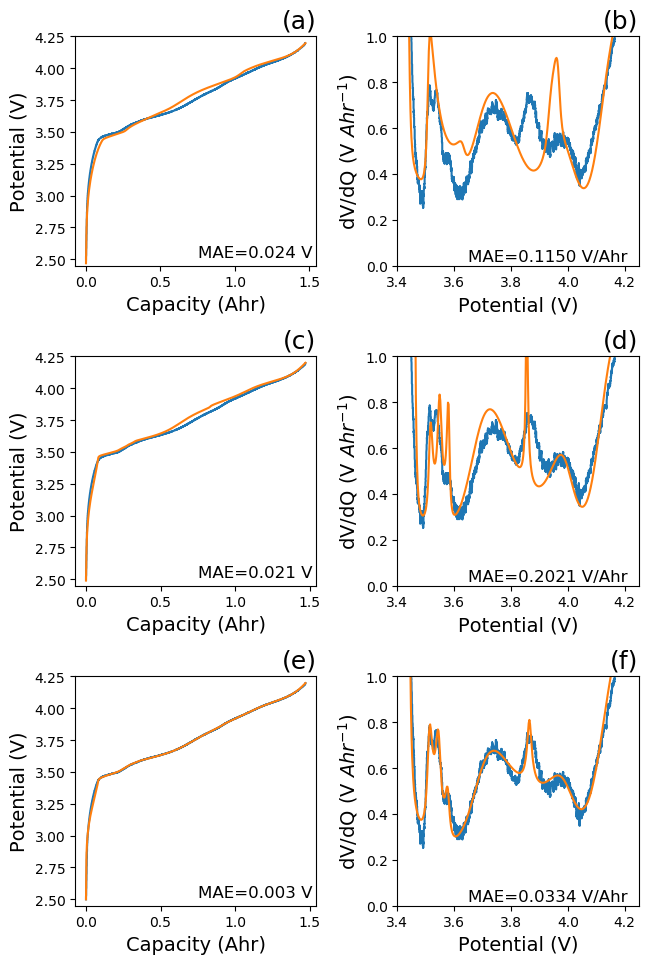

In [57]:
guess_full_0_51d = yvolt0_51d[0:(3*(nor_pos+nor_neg))]

# Verbrugge et al. (2017) Base Parameters
cap_verb_d, v_verb_d, dqdu_verb_d, dvdq_verb_d = msmr.whole_cell(parameter_matrix=params, nor_pos = 6, 
                                                                nor_neg = 6, pos_lower_li_limit = pos_lower_lim_dis, 
                                                                neg_lower_li_limit=neg_lower_lim_dis, temp = 298, n_p=None, p_capacity=None,
                                                                pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                usable_cap = fresh_capacity_51.max(), Qj_or_Xj='Qj')


# Discharged - Initial Guess
cap_g_d, v_g_d, dqdu_g_d, dvdq_g_d = msmr.whole_cell(fresh_guess_d, nor_pos = 6, nor_neg = 6,
                                                     pos_lower_li_limit = pos_lower_lim_dis, neg_lower_li_limit=neg_lower_lim_dis,
                                                     temp = 298, pos_volt_range = (3.4, 5), 
                                                     neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                                                     usable_cap = fresh_capacity_51d.max(), Qj_or_Xj='Qj')

# Discharged - Fit
cap0_51d, v0_51d, dqdu0_51d, dvdq0_51d = msmr.whole_cell(guess_full_0_51d, nor_pos = 6, nor_neg = 6,
                                                         pos_lower_li_limit = pos_lower_lim_dis, neg_lower_li_limit=neg_lower_lim_dis,
                                                         temp = 298, pos_volt_range = (3.4, 5), 
                                                         neg_volt_range = (0, 1), p_capacity=None, n_p=None,
                                                         usable_cap = fresh_capacity_51d.max(), Qj_or_Xj='Qj')

# Discharged (MAE)
capacity_range0_51 = np.linspace(fresh_capacity_51d.min(), fresh_capacity_51d.max(), 251)
verb_mae = msmr.mae(fresh_voltage_51d, v_verb_d, cap_verb_d, fresh_capacity_51d, capacity_range0_51)
guess_mae = msmr.mae(fresh_voltage_51d, v_g_d, cap_g_d, fresh_capacity_51d, capacity_range0_51)
fit0_51_mae_d = msmr.mae(fresh_voltage_51d, v0_51d, cap0_51d, fresh_capacity_51d, capacity_range0_51)
ocv_mae_list_d = [verb_mae, guess_mae, fit0_51_mae_d]

deriv_list = [(v_verb_d, dvdq_verb_d), (v_g_d, dvdq_g_d), (v0_51d, dvdq0_51d)]
deriv_mae_list_d = [msmr.mae(fresh_dvdq_51d, -(item[1]), item[0], fresh_voltage_51d, voltage_range_d) for item in deriv_list]

# Discharged Plotting
fig = plt.figure(figsize=(6.5, 3.25*3))

ax, ax2 = fig.add_subplot(321), fig.add_subplot(322) # First Row
ax3, ax4 = fig.add_subplot(323), fig.add_subplot(324) # Second Row
ax5, ax6 = fig.add_subplot(325), fig.add_subplot(326) # Third Row
axes, axes_left, axes_right = [ax, ax2, ax3, ax4, ax5, ax6], [ax, ax3, ax5], [ax2, ax4, ax6] 

letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for idx, axe in enumerate(axes):
    axe.set_title(letters[idx], loc='right', fontsize = 18)
    
for idx, axe in enumerate(axes_left):
    axe.plot(fresh_capacity_51d, fresh_voltage_51d, label='Data')
    axe.set_xlabel('Capacity (Ahr)', fontsize=14)
    axe.set_ylabel('Potential (V)', fontsize=14)
    axe.text(.75, 2.52, 'MAE=%1.3f V' %ocv_mae_list_d[idx], fontsize=12)
    axe.set_ylim(2.45, 4.25)
    
for idx, axe in enumerate(axes_right):
    axe.plot(fresh_voltage_51d, fresh_dvdq_51d, label='Data')
    axe.set_xlabel('Potential (V)', fontsize=14)
    axe.set_ylabel('dV/dQ (V $Ahr^{-1})$', fontsize=14)
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.65, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_d[idx], fontsize=12)

# Capacity vs OCV 
ax.plot(cap_verb_d, (v_verb_d))
ax3.plot(cap_g_d, (v_g_d))
ax5.plot(cap0_51d, (v0_51d))

# OCV vs dV/dQ
ax2.plot(v_verb_d, -dvdq_verb_d)
ax4.plot(v_g_d, -dvdq_g_d)
ax6.plot(v0_51d, -dvdq0_51d)

fig.tight_layout()

In [58]:
# Discharged 
aged_300_ocv_bounds = []

# Setting different bounds for the positive and negative electrodes
for i in range(0,int(nor_pos+nor_neg)):
    aged_300_ocv_bounds.append((yvolt0_51d[i*3] - 0.02, yvolt0_51d[i*3] + 0.02))
    aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 1]*0.75, yvolt0_51d[i*3 + 1]*1.25))
    aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 2]*0.75, yvolt0_51d[i*3 + 2]*1.25))
# for i in range(int(nor_pos),int(nor_pos+nor_neg)):
#     aged_300_ocv_bounds.append((yvolt0_51d[i*3] - 0.005, yvolt0_51d[i*3] + 0.005))
#     aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 1]*0.9, yvolt0_51d[i*3 + 1]*1.1))
#     aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 2]*0.9, yvolt0_51d[i*3 + 2]*1.1))

aged_300_ocv_bounds.append((0.1, pos_lower_lim_dis))
aged_300_ocv_bounds.append((0, neg_lower_lim_dis))

yvolt300_1d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51d, 
                         args=(voltage_range_d,        # interpolated voltage range
                               a300_data_cap_interp_1d,      # interpolated capacity data
                               a300_data_dvdq_interp_1d,     # interpolated dvdq data
                               aged_300_voltage_1d.min(),  # Minimum voltage
                               aged_300_voltage_1d.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_1d.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',          # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.5,                  # capacity weight on error function
                               0.5),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_1d)

# Setting different bounds for the positive and negative electrodes
aged_600_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    aged_600_ocv_bounds.append((yvolt300_1d[i*3] - 0.02, yvolt300_1d[i*3] + 0.02))
    aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 1]*0.75, yvolt300_1d[i*3 + 1]*1.25))
    aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 2]*0.75, yvolt300_1d[i*3 + 2]*1.25))
# for i in range(int(nor_pos),int(nor_pos+nor_neg)):
#     aged_600_ocv_bounds.append((yvolt300_1d[i*3] - 0.005, yvolt300_1d[i*3] + 0.005))
#     aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 1]*0.9, yvolt300_1d[i*3 + 1]*1.1))
#     aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 2]*0.9, yvolt300_1d[i*3 + 2]*1.1))

aged_600_ocv_bounds.append((0.05, yvolt300_1d[-2]))
aged_600_ocv_bounds.append((0, yvolt300_1d[-1]))

yvolt600_49d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt300_1d, 
                          args=(voltage_range_d,        # interpolated voltage range
                                a600_data_cap_interp_49d,      # interpolated capacity data
                                a600_data_dvdq_interp_49d,     # interpolated dvdq data
                                aged_600_voltage_49d.min(),  # Minimum voltage
                                aged_600_voltage_49d.max(),  # Maximum voltage
                                298,                  # temperature
                                6, 6,                 # number of pos rxns, number of neg rxns
                                (3.4,5), (0,1),       # positive voltage range, negative voltange range
                                None,                 # positive lower X limit
                                None,                 # negative lower X limit
                                None,                 # N|P Ratio
                                None,                 # positive electrode full capacity
                                aged_600_capacity_49d.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',          # Qj or Xj
                                None,                 # list of pos_U0s
                                None,                 # list of neg_U0s
                                False,                # fixed voltage
                                False,                 # fixed xj_limit
                                0.5,                  # capacity weight on error function
                                0.5),                 # dvdq weight on error function
                          eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                          bounds=aged_600_ocv_bounds, iter=500, full_output=False)

print(yvolt600_49d)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.03390213039920767
            Iterations: 49
            Function evaluations: 2011
            Gradient evaluations: 49
[3.68505208 0.18555323 0.87708942 3.74195042 0.43558309 1.78429677
 3.92521852 0.17139335 2.64093369 4.26269707 0.39886333 5.46313772
 3.99137016 0.22488327 1.96050789 4.15131086 0.20083656 1.4006761
 0.09990156 0.85821195 0.13447946 0.13291858 0.55510416 0.12514063
 0.15179704 0.07635375 0.15009222 0.1715344  0.054791   0.2734375
 0.20143547 0.13936273 0.18776936 0.34825    0.11562662 4.29549951
 0.18091124 0.        ]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.024862650729007337
            Iterations: 63
            Function evaluations: 2567
            Gradient evaluations: 63
[3.69962465 0.23194153 0.65781707 3.75997092 0.38965947 1.90950673
 3.94521852 0.12854501 2.67473749 4.24269707 0.30132337 5.45629646
 3.97374006 0

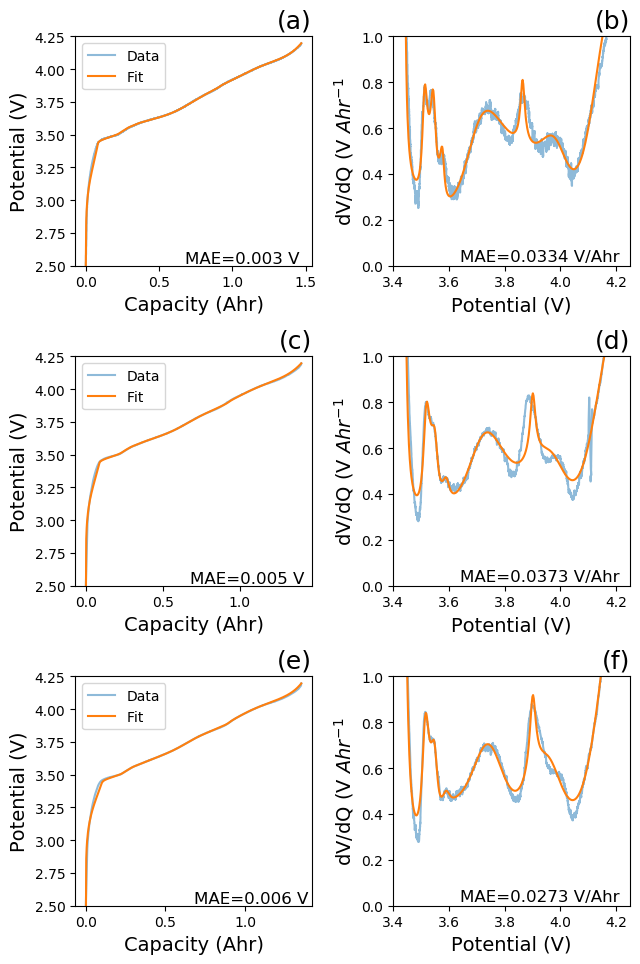

In [59]:
# Discharged Fits

guess_full_300_1d = yvolt300_1d[0:(3*(nor_pos+nor_neg))]
cap300_1d, v300_1d, dqdu300_1d, dvdq300_1d = msmr.whole_cell(guess_full_300_1d, nor_pos = 6, nor_neg = 6, 
                                                             pos_lower_li_limit = yvolt300_1d[-2], neg_lower_li_limit = yvolt300_1d[-1],
                                                             temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1.25), 
                                                             usable_cap = aged_300_capacity_1d.max(), n_p=None, p_capacity=None,
                                                             Qj_or_Xj='Qj')

guess_full_600_49d = yvolt600_49d[0:(3*(nor_pos+nor_neg))]
cap600_49d, v600_49d, dqdu600_49d, dvdq600_49d = msmr.whole_cell(guess_full_600_49d, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt600_49d[-2], neg_lower_li_limit = yvolt600_49d[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1.25), 
                                                                 usable_cap = aged_600_capacity_49d.max(), n_p=None, p_capacity=None,
                                                                 Qj_or_Xj='Qj')

capacity_range300_1 = np.linspace(0.0, aged_300_capacity_1d.max(), 1000)
capacity_range600_49 = np.linspace(0.0, aged_600_capacity_49d.max(), 1000)

#MAE
fit300_1_mae_d = msmr.mae(aged_300_voltage_1d, v300_1d, cap300_1d, aged_300_capacity_1d, capacity_range300_1)
fit600_49_mae_d = msmr.mae(aged_600_voltage_49d, v600_49d, cap600_49d, aged_600_capacity_49d, capacity_range600_49)
ocv_mae_list_all = [fit0_51_mae_d, fit300_1_mae_d, fit600_49_mae_d]
deriv_list = [(v0_51d, dvdq0_51d, fresh_voltage_51d, fresh_dvdq_51d),
              (v300_1d, dvdq300_1d, aged_300_voltage_1d, aged_300_dvdq_1d),
              (v600_49d, dvdq600_49d, aged_600_voltage_49d, aged_600_dvdq_49d)]
deriv_mae_list_all = [msmr.mae(item[3], -(item[1]), item[0], item[2], voltage_range_d) for item in deriv_list]

# Plotting
fig = plt.figure(figsize=(6.5, 9.75))
ax, ax2 = fig.add_subplot(321), fig.add_subplot(322)
ax3, ax4 = fig.add_subplot(323), fig.add_subplot(324)
ax5, ax6 = fig.add_subplot(325), fig.add_subplot(326)
axes, axes_left, axes_right = [ax, ax2, ax3, ax4, ax5, ax6], [ax, ax3, ax5], [ax2, ax4, ax6]
letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']

for idx, axe in enumerate(axes):
    axe.set_title(letters[idx], loc='right', fontsize = 18)

# Capacity vs OCV 
ax.plot(fresh_capacity_51d, fresh_voltage_51d, alpha=0.5, label='Data')
ax.plot(cap0_51d, v0_51d, label='Fit')

ax3.plot(aged_300_capacity_1d, aged_300_voltage_1d, alpha=0.5, label='Data')
ax3.plot(cap300_1d, v300_1d, label='Fit')

ax5.plot(aged_600_capacity_49d, aged_600_voltage_49d, alpha=0.5, label='Data')
ax5.plot(cap600_49d, v600_49d, label='Fit')

# OCV vs dV/dQ
ax2.plot(fresh_voltage_51d, fresh_dvdq_51d, alpha=0.5, label='Data')
ax2.plot(v0_51d, -dvdq0_51d, label='Fit')

ax4.plot(aged_300_voltage_1d, aged_300_dvdq_1d, alpha=0.5, label='Data')
ax4.plot(v300_1d, -dvdq300_1d, label='Fit')

ax6.plot(aged_600_voltage_49d, aged_600_dvdq_49d, alpha=0.5, label='Data')
ax6.plot(v600_49d, -dvdq600_49d, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity (Ahr)',fontsize=14)
    axe.set_ylabel('Potential (V)',fontsize=14)
    axe.set_ylim(2.5, 4.25)
    axe.text(.68, 2.52, 'MAE=%1.3f V' %ocv_mae_list_all[idx], fontsize=12)
    axe.legend()
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Potential (V)',fontsize=14)
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$', fontsize=14)
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1.)
    axe.text(3.64, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_all[idx], fontsize=12)
#ax.axhline(y=3.45)
fig.tight_layout()
#fig.savefig('../figures/Figures SI/0-300-600-discharged_fits.png', dpi=300)

In [97]:
run = True

if run == True:
    fit_0_data = np.append(yvolt0_51d, (ocv_mae_list_all[0], deriv_mae_list_all[0]))
    fit_300_data = np.append(yvolt300_1d, (ocv_mae_list_all[1], deriv_mae_list_all[1]))
    fit_600_data = np.append(yvolt600_49d, (ocv_mae_list_all[2], deriv_mae_list_all[2]))

    save_data = np.vstack((fit_0_data, fit_300_data, fit_600_data))
    np.savetxt('../supplementary-files/parameter-fits/0-300-600-discharge-fit-parameters-50-50.txt', save_data)
    
else:
    pass

<a id= 'Discharged-Replicates'></a>

### Discharged Replicates

[Back to Top of Discharged Section](#Discharged-Fitting-Results)

[Back To Top of Notebook](#top)
    

In [64]:
# Discharged
fresh_ocv_bounds = []
for i in range(0,int(nor_pos+nor_neg)):
    fresh_ocv_bounds.append((fresh_guess_d[i*3] - 0.02, fresh_guess_d[i*3] + 0.02))
    fresh_ocv_bounds.append((fresh_guess_d[i*3 + 1]*0.75, fresh_guess_d[i*3 + 1]*1.25))
    fresh_ocv_bounds.append((fresh_guess_d[i*3 + 2]*0.75, fresh_guess_d[i*3 + 2]*1.25))

fresh_ocv_bounds.append((0.095, pos_lower_lim_dis))
fresh_ocv_bounds.append((0, neg_lower_lim_dis))
    
fresh_ocv_bounds[13] = (fresh_guess_d[13]*0.95, fresh_guess_d[13]*1.05)
fresh_ocv_bounds[16] = (fresh_guess_d[16]*0.95, fresh_guess_d[16]*1.05)

yvolt0_52d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess_d, 
                        args=(voltage_range_d,             # interpolated voltage range
                              data_cap_interp_52d,       # interpolated capacity data
                              data_dvdq_interp_52d,     # interpolated dvdq data
                              fresh_voltage_52d.min(),   # Minimum voltage
                              fresh_voltage_52d.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              pos_lower_lim_dis, neg_lower_lim_dis,                  # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_52d.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',                     # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False,                     # fixed voltage
                              True,                      # fixed xj_limit
                              0.5, 0.5),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)

print(yvolt0_52d)

yvolt0_53d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess_d, 
                        args=(voltage_range_d,             # interpolated voltage range
                              data_cap_interp_53d,       # interpolated capacity data
                              data_dvdq_interp_53d,     # interpolated dvdq data
                              fresh_voltage_53d.min(),   # Minimum voltage
                              fresh_voltage_53d.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              pos_lower_lim_dis, neg_lower_lim_dis,                  # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_53d.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',               # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False,                     # fixed voltage
                              True,                      # fixed xj_limit
                              0.5, 0.5),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)

print(yvolt0_53d)

yvolt0_54d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=fresh_guess_d, 
                        args=(voltage_range_d,             # interpolated voltage range
                              data_cap_interp_54d,       # interpolated capacity data
                              data_dvdq_interp_54d,     # interpolated dvdq data
                              fresh_voltage_54d.min(),   # Minimum voltage
                              fresh_voltage_54d.max(),   # Maximum voltage
                              298,                       # temperature
                              6, 6,                      # number of pos rxns, number of neg rxns
                              (3.4,5), (0,1),            # positive voltage range, negative voltange range
                              pos_lower_lim_dis, neg_lower_lim_dis,                 # positive | neg lower X or Q limit
                              None,                      # N|P Ratio
                              None,                      # positive electrode full capacity
                              fresh_capacity_54d.max(),  # usable/cyclable capacity within the voltage limits
                              'Qj', 'MAE',               # Qj or Xj
                              None,                      # list of pos_U0s
                              None,                      # list of neg_U0s
                              False,                     # fixed voltage
                              True,                      # fixed xj_limit
                              0.5, 0.5),                 # capacity vs dvdq weight on error function
                        eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                        bounds=fresh_ocv_bounds, iter=500, full_output=False)

print(yvolt0_54d)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.027298615677889847
            Iterations: 114
            Function evaluations: 4616
            Gradient evaluations: 114
[3.66946051 0.16937868 0.725325   3.73145    0.4531454  1.38659133
 3.89323768 0.24701429 2.62875    4.26181882 0.42504417 5.71099392
 4.01673    0.22234513 1.87843415 4.15922231 0.18140487 1.1625
 0.10457319 0.84848445 0.1076375  0.12982836 0.57423974 0.1001125
 0.14980021 0.061083   0.15788337 0.17134678 0.04815018 0.21875
 0.19726468 0.14767203 0.1525     0.36825    0.09844437 4.480155
 0.188      0.        ]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.030900270395410837
            Iterations: 59
            Function evaluations: 2402
            Gradient evaluations: 59
[3.67323507 0.13862062 0.725325   3.73145    0.4462345  1.37509265
 3.87809842 0.30169284 3.19014253 4.26555    0.42075399 5.87785699
 4.01673    0.2223

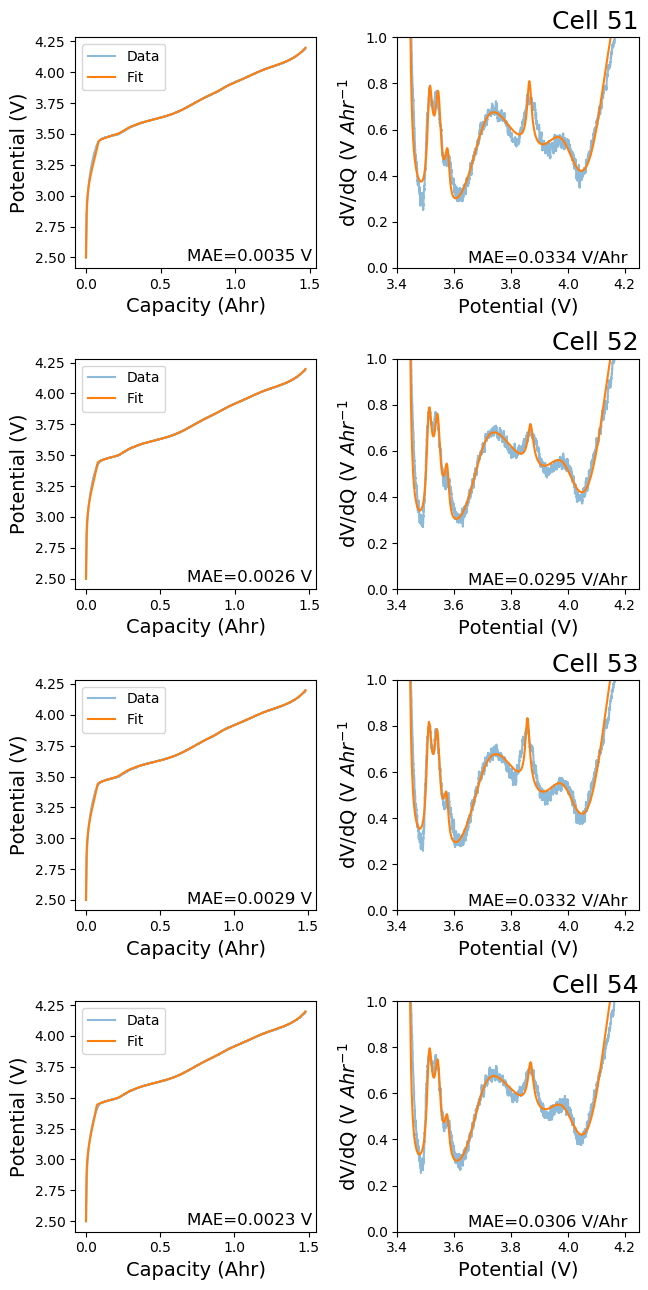

In [69]:
guess_full_0_52d = yvolt0_52d[0:(3*(nor_pos+nor_neg))]
cap0_52d, v0_52d, dqdu0_52d, dvdq0_52d = msmr.whole_cell(guess_full_0_52d, nor_pos = 6, nor_neg = 6, 
                                                         pos_lower_li_limit = pos_lower_lim_dis, neg_lower_li_limit=neg_lower_lim_dis,
                                                         temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1),
                                                         n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                         usable_cap = fresh_capacity_52d.max())

guess_full_0_53d = yvolt0_53d[0:(3*(nor_pos+nor_neg))]
cap0_53d, v0_53d, dqdu0_53d, dvdq0_53d = msmr.whole_cell(guess_full_0_53d, nor_pos = 6, nor_neg = 6, 
                                                         pos_lower_li_limit = pos_lower_lim_dis, neg_lower_li_limit=neg_lower_lim_dis,
                                                         temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1),
                                                         n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                         usable_cap = fresh_capacity_53d.max())

guess_full_0_54d = yvolt0_54d[0:(3*(nor_pos+nor_neg))]
cap0_54d, v0_54d, dqdu0_54d, dvdq0_54d = msmr.whole_cell(guess_full_0_54d, nor_pos = 6, nor_neg = 6, 
                                                         pos_lower_li_limit = pos_lower_lim_dis, neg_lower_li_limit=neg_lower_lim_dis,
                                                         temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1),
                                                         n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                         usable_cap = fresh_capacity_54d.max())

# maes
capacity_range0_52 = np.linspace(0.0, fresh_capacity_52d.max(), 251)
capacity_range0_53 = np.linspace(0.0, fresh_capacity_53d.max(), 251)
capacity_range0_54 = np.linspace(0.0, fresh_capacity_54d.max(), 251)

fit0_52_mae_d = msmr.mae(fresh_voltage_52d, v0_52d, cap0_52d, fresh_capacity_52d, capacity_range0_52)
fit0_53_mae_d = msmr.mae(fresh_voltage_53d, v0_53d, cap0_53d, fresh_capacity_53d, capacity_range0_53)
fit0_54_mae_d = msmr.mae(fresh_voltage_54d, v0_54d, cap0_54d, fresh_capacity_54d, capacity_range0_54)

ocv_mae_list = [fit0_51_mae_d, fit0_52_mae_d, fit0_53_mae_d, fit0_54_mae_d]

deriv_list = [(v0_51d, dvdq0_51d, fresh_voltage_51d, -fresh_dvdq_51d),
              (v0_52d, dvdq0_52d, fresh_voltage_52d, -fresh_dvdq_52d),
              (v0_53d, dvdq0_53d, fresh_voltage_53d, -fresh_dvdq_53d),
              (v0_54d, dvdq0_54d, fresh_voltage_54d, -fresh_dvdq_54d)]
deriv_mae_list = [msmr.mae(item[3], (item[1]), item[0], item[2], voltage_range_d) for item in deriv_list]

# Plotting
fig = plt.figure(figsize=(6.5, 13))
ax, ax2 = fig.add_subplot(421), fig.add_subplot(422) # First Row
ax3, ax4 = fig.add_subplot(423), fig.add_subplot(424) # Second Row
ax5, ax6 = fig.add_subplot(425), fig.add_subplot(426) # Third Row
ax7, ax8 = fig.add_subplot(427), fig.add_subplot(428) # Fourth Row

axes = [ax, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
axes_left, axes_right = [ax, ax3, ax5, ax7], [ax2, ax4, ax6, ax8]
letters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
cells = ['Cell 51', 'Cell 52', 'Cell 53', 'Cell 54']

# Capacity vs OCV 
ax.plot(fresh_capacity_51d, fresh_voltage_51d, alpha=0.5, label='Data')
ax.plot(cap0_51d, v0_51d, label='Fit')

ax3.plot(fresh_capacity_52d, fresh_voltage_52d, alpha=0.5, label='Data')
ax3.plot(cap0_52d, v0_52d, label='Fit')

ax5.plot(fresh_capacity_53d, fresh_voltage_53d, alpha=0.5, label='Data')
ax5.plot(cap0_53d, v0_53d, label='Fit')

ax7.plot(fresh_capacity_54d, fresh_voltage_54d, alpha=0.5, label='Data')
ax7.plot(cap0_54d, v0_54d, label='Fit')

# OCV vs dU/dX
ax2.plot(fresh_voltage_51d, fresh_dvdq_51d, alpha=0.5, label='Data')
ax2.plot(v0_51d, -dvdq0_51d, label='Fit')

ax4.plot(fresh_voltage_52d, fresh_dvdq_52d, alpha=0.5, label='Data')
ax4.plot(v0_52d, -dvdq0_52d, label='Fit')

ax6.plot(fresh_voltage_53d, fresh_dvdq_53d, alpha=0.5, label='Data')
ax6.plot(v0_53d, -dvdq0_53d, label='Fit')

ax8.plot(fresh_voltage_54d, fresh_dvdq_54d, alpha=0.5, label='Data')
ax8.plot(v0_54d, -dvdq0_54d, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity (Ahr)', fontsize=14)
    axe.set_ylabel('Potential (V)', fontsize=14)
    axe.text(.68, 2.47, 'MAE=%1.4f V' %ocv_mae_list[idx], fontsize=12)
    axe.legend()
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Potential (V)', fontsize=14)
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$', fontsize=14)
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.65, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list[idx], fontsize=12)
    axe.set_title(cells[idx], loc='right', fontsize = 18)
    
fig.tight_layout()
#fig.savefig('../figures/supplementary/0_fit_replicates.png', dpi = 300)

In [70]:
# Discharge # 300 Cycles

aged_300_ocv_bounds = []
for i in range(0,int(nor_pos)):
    aged_300_ocv_bounds.append((yvolt0_51d[i*3] - 0.01, yvolt0_51d[i*3] + 0.01))
    aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 1]*0.9, yvolt0_51d[i*3 + 1]*1.1))
    aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 2]*0.9, yvolt0_51d[i*3 + 2]*1.1))
for i in range(int(nor_pos),int(nor_pos+nor_neg)):
    aged_300_ocv_bounds.append((yvolt0_51d[i*3] - 0.005, yvolt0_51d[i*3] + 0.005))
    aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 1]*0.9, yvolt0_51d[i*3 + 1]*1.1))
    aged_300_ocv_bounds.append((yvolt0_51d[i*3 + 2]*0.9, yvolt0_51d[i*3 + 2]*1.1))

aged_300_ocv_bounds.append((0.095, pos_lower_lim_dis))
aged_300_ocv_bounds.append((0, neg_lower_lim_dis))
    
yvolt300_2d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51d, 
                         args=(voltage_range_d,        # interpolated voltage range
                               a300_data_cap_interp_2d,      # interpolated capacity data
                               a300_data_dvdq_interp_2d,     # interpolated dvdq data
                               aged_300_voltage_2d.min(),  # Minimum voltage
                               aged_300_voltage_2d.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_2d.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',                 # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.5,                  # capacity weight on error function
                               0.5),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_2d)

yvolt300_3d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51d, 
                         args=(voltage_range_d,        # interpolated voltage range
                               a300_data_cap_interp_3,      # interpolated capacity data
                               a300_data_dvdq_interp_3d,     # interpolated dvdq data
                               aged_300_voltage_3d.min(),  # Minimum voltage
                               aged_300_voltage_3d.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_3d.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',                 # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.5,                  # capacity weight on error function
                               0.5),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_3d)

yvolt300_4d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt0_51d, 
                         args=(voltage_range_d,        # interpolated voltage range
                               a300_data_cap_interp_4d,      # interpolated capacity data
                               a300_data_dvdq_interp_4d,     # interpolated dvdq data
                               aged_300_voltage_4d.min(),  # Minimum voltage
                               aged_300_voltage_4d.max(),  # Maximum voltage
                               298,                  # temperature
                               6, 6,                 # number of pos rxns, number of neg rxns
                               (3.4,5), (0,1),       # positive voltage range, negative voltange range
                               None,                 # positive lower X limit
                               None,                 # negative lower X limit
                               None,                 # N|P Ratio
                               None,                 # positive electrode full capacity
                               aged_300_capacity_4d.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',                 # Qj or Xj
                               None,                 # list of pos_U0s
                               None,                 # list of neg_U0s
                               False,                # fixed voltage
                               False,                 # fixed xj_limit
                               0.5,                  # capacity weight on error function
                               0.5),                 # dvdq weight on error function
                         eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                         bounds=aged_300_ocv_bounds, iter=500, full_output=False)

print(yvolt300_4d)

G:\My Drive\A- Research\github\msmr-whole-cell-manuscript\jupyter\utilities\msmr.py:87: RuntimeWarning: overflow encountered in square
  dxjdu = (-Xj/w)*((f*np.exp(f*(U-U0)/w))/(1+np.exp(f*(U-U0)/w))**2)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.03752511763585557
            Iterations: 70
            Function evaluations: 2845
            Gradient evaluations: 70
[3.67650574 0.13848621 1.05250731 3.73244772 0.46140784 1.74503912
 3.91521852 0.20567202 2.8662991  4.256794   0.43118424 5.31576885
 4.00137016 0.22884208 2.04971402 4.15388737 0.16326438 1.23402713
 0.10162616 0.8545526  0.11840125 0.13399618 0.53970231 0.11012375
 0.15185623 0.0671913  0.1383281  0.16986825 0.05306404 0.240625
 0.19724818 0.13626944 0.16775    0.36325    0.10537028 4.0321395
 0.188      0.        ]
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.039706173429323706
            Iterations: 61
            Function evaluations: 2482
            Gradient evaluations: 61
[3.67615309 0.13527932 1.05250731 3.73325487 0.46140784 1.74503912
 3.91521852 0.20567202 2.7607009  4.25895898 0.43622349 4.94849128
 4.00560788 0.

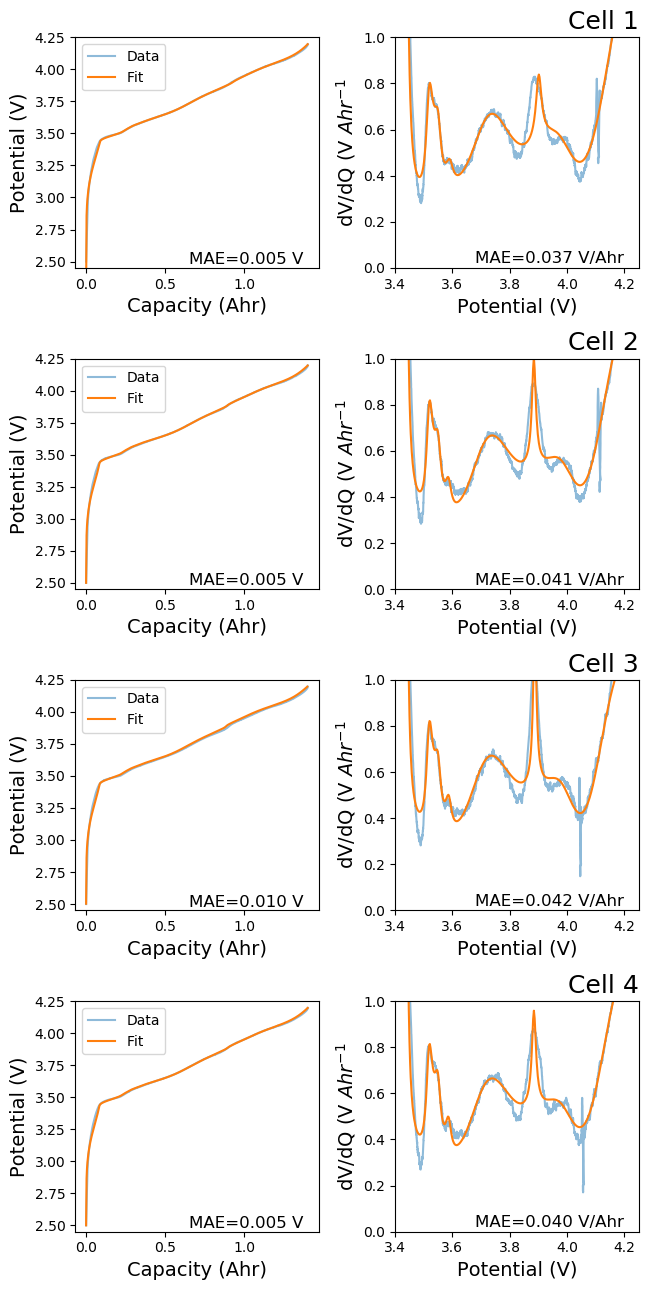

In [98]:
guess_full_300_2d = yvolt300_2d[0:(3*(nor_pos+nor_neg))]
cap300_2d, v300_2d, dqdu300_2d, dvdq300_2d = msmr.whole_cell(guess_full_300_2d, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt300_2d[-2], neg_lower_li_limit = yvolt300_2d[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj = 'Qj',
                                                                 usable_cap = aged_300_capacity_2d.max())
guess_full_300_3d = yvolt300_3d[0:(3*(nor_pos+nor_neg))]
cap300_3d, v300_3d, dqdu300_3d, dvdq300_3d = msmr.whole_cell(guess_full_300_3d, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt300_3d[-2], neg_lower_li_limit = yvolt300_3d[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj = 'Qj',
                                                                 usable_cap = aged_300_capacity_2d.max())

guess_full_300_4d = yvolt300_4d[0:(3*(nor_pos+nor_neg))]
cap300_4d, v300_4d, dqdu300_4d, dvdq300_4d = msmr.whole_cell(guess_full_300_4d, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt300_4d[-2], neg_lower_li_limit = yvolt300_4d[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj = 'Qj',
                                                                 usable_cap = aged_300_capacity_4d.max())
# MAEs
capacity_range300_2 = np.linspace(0.0, aged_300_capacity_2d.max(), 251)
capacity_range300_3 = np.linspace(0.0, aged_300_capacity_3d.max(), 251)
capacity_range300_4 = np.linspace(0.0, aged_300_capacity_4d.max(), 251)

fit300_2_mae_d = msmr.mae(aged_300_voltage_2d, v300_2d, cap300_2d, aged_300_capacity_2d, capacity_range300_2)
fit300_3_mae_d = msmr.mae(aged_300_voltage_3d, v300_3d, cap300_3d, aged_300_capacity_3d, capacity_range300_3)
fit300_4_mae_d = msmr.mae(aged_300_voltage_4d, v300_4d, cap300_4d, aged_300_capacity_4d, capacity_range300_4)

ocv_mae_list_300 = [fit300_1_mae_d, fit300_2_mae_d, fit300_3_mae_d, fit300_4_mae_d]
deriv_list = [(v300_1d, -dvdq300_1d, aged_300_voltage_1d, aged_300_dvdq_1d),
              (v300_2d, -dvdq300_2d, aged_300_voltage_2d, aged_300_dvdq_2d),
              (v300_3d, -dvdq300_3d, aged_300_voltage_3d, aged_300_dvdq_3d),
              (v300_4d, -dvdq300_4d, aged_300_voltage_4d, aged_300_dvdq_4d)]

deriv_mae_list_300 = [msmr.mae(item[3], (item[1]), item[0], item[2], voltage_range_d) for item in deriv_list]

# Plotting
fig = plt.figure(figsize=(6.5, 13))
ax, ax2 = fig.add_subplot(421), fig.add_subplot(422) # First Row
ax3, ax4 = fig.add_subplot(423), fig.add_subplot(424) # Second Row
ax5, ax6 = fig.add_subplot(425), fig.add_subplot(426) # Third Row
ax7, ax8 = fig.add_subplot(427), fig.add_subplot(428) # Fourth Row

axes = [ax, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
axes_left, axes_right = [ax, ax3, ax5, ax7], [ax2, ax4, ax6, ax8]
letters = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
cells = ['Cell 1', 'Cell 2', 'Cell 3', 'Cell 4']

# Capacity vs OCV 
ax.plot(aged_300_capacity_1d, aged_300_voltage_1d, alpha=0.5, label='Data')
ax.plot(cap300_1d, v300_1d, label='Fit')

ax3.plot(aged_300_capacity_2d, aged_300_voltage_2d, alpha=0.5, label='Data')
ax3.plot(cap300_2d, v300_2d, label='Fit')

ax5.plot(aged_300_capacity_3d, aged_300_voltage_3d, alpha=0.5, label='Data')
ax5.plot(cap300_3d, v300_3d, label='Fit')

ax7.plot(aged_300_capacity_4d, aged_300_voltage_4d, alpha=0.5, label='Data')
ax7.plot(cap300_4d, v300_4d, label='Fit')

# OCV vs dV/dQ
ax2.plot(aged_300_voltage_1d, aged_300_dvdq_1d, alpha=0.5, label='Data')
ax2.plot(v300_1d, -dvdq300_1d, label='Fit')

ax4.plot(aged_300_voltage_2d, aged_300_dvdq_2d, alpha=0.5, label='Data')
ax4.plot(v300_2d, -dvdq300_2d, label='Fit')

ax6.plot(aged_300_voltage_3d, aged_300_dvdq_3d, alpha=0.5, label='Data')
ax6.plot(v300_3d, -dvdq300_3d, label='Fit')

ax8.plot(aged_300_voltage_4d, aged_300_dvdq_4d, alpha=0.5, label='Data')
ax8.plot(v300_4d, -dvdq300_4d, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity (Ahr)', fontsize=14)
    axe.set_ylabel('Potential (V)', fontsize=14)
    axe.set_ylim(2.45, 4.25)
    axe.text(.65, 2.48, 'MAE=%1.3f V' %ocv_mae_list_300[idx], fontsize=12)
    axe.legend()
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Potential (V)', fontsize=14)
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$', fontsize=14)
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.68, 0.02, 'MAE=%1.3f V/Ahr' %deriv_mae_list_300[idx], fontsize=12)
    axe.set_title(cells[idx], loc='right', fontsize = 18)
    
fig.tight_layout()
#fig.savefig('../figures/supplementary/fit_300_replicates.png', dpi=300)

In [82]:
aged_600_ocv_bounds = []
for i in range(0,int(nor_pos)):
    aged_600_ocv_bounds.append((yvolt300_1d[i*3] - 0.01, yvolt300_1d[i*3] + 0.01))
    aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 1]*0.9, yvolt300_1d[i*3 + 1]*1.1))
    aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 2]*0.9, yvolt300_1d[i*3 + 2]*1.1))
for i in range(int(nor_pos),int(nor_pos+nor_neg)):
    aged_600_ocv_bounds.append((yvolt300_1d[i*3] - 0.005, yvolt300_1d[i*3] + 0.005))
    aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 1]*0.9, yvolt300_1d[i*3 + 1]*1.1))
    aged_600_ocv_bounds.append((yvolt300_1d[i*3 + 2]*0.9, yvolt300_1d[i*3 + 2]*1.1))

aged_600_ocv_bounds.append((0.05, yvolt300_1d[-2]))
aged_600_ocv_bounds.append((0, yvolt300_1d[-1]))

yvolt600_50d = fmin_slsqp(func=msmr.verbrugge_whole_cell_opt, x0=yvolt300_1d, 
                          args=(voltage_range_d,        # interpolated voltage range
                                a600_data_cap_interp_50d,      # interpolated capacity data
                                a600_data_dvdq_interp_50d,     # interpolated dvdq data
                                aged_600_voltage_50d.min(),  # Minimum voltage
                                aged_600_voltage_50d.max(),  # Maximum voltage
                                298,                  # temperature
                                6, 6,                 # number of pos rxns, number of neg rxns
                                (3.4,5), (0,1),       # positive voltage range, negative voltange range
                                None,                 # positive lower X limit
                                None,                 # negative lower X limit
                                None,                 # N|P Ratio
                                None,                 # positive electrode full capacity
                                aged_600_capacity_50d.max(), # usable/cyclable capacity within the voltage limits
                               'Qj', 'MAE',          # Qj or Xj
                                None,                 # list of pos_U0s
                                None,                 # list of neg_U0s
                                False,                # fixed voltage
                                False,                 # fixed xj_limit
                                0.5,                  # capacity weight on error function
                                0.5),                 # dvdq weight on error function
                          eqcons=[msmr.lower_v_constraint, msmr.upper_v_constraint],
                          bounds=aged_600_ocv_bounds, iter=500, full_output=False)

print(yvolt600_50d)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.029098697793505365
            Iterations: 42
            Function evaluations: 1720
            Gradient evaluations: 42
[3.68540511 0.20410855 0.78938048 3.7460021  0.40478298 1.86454746
 3.93521852 0.15425402 2.664209   4.25315307 0.358977   5.50517475
 3.98139543 0.21796063 1.7644571  4.14781872 0.20769313 1.31264034
 0.09490156 0.85339394 0.1479274  0.13134277 0.52484117 0.13765469
 0.15047683 0.08398912 0.15739044 0.17187502 0.05666448 0.28974806
 0.20390351 0.129189   0.19047917 0.34325    0.12645503 4.20299863
 0.16029004 0.        ]


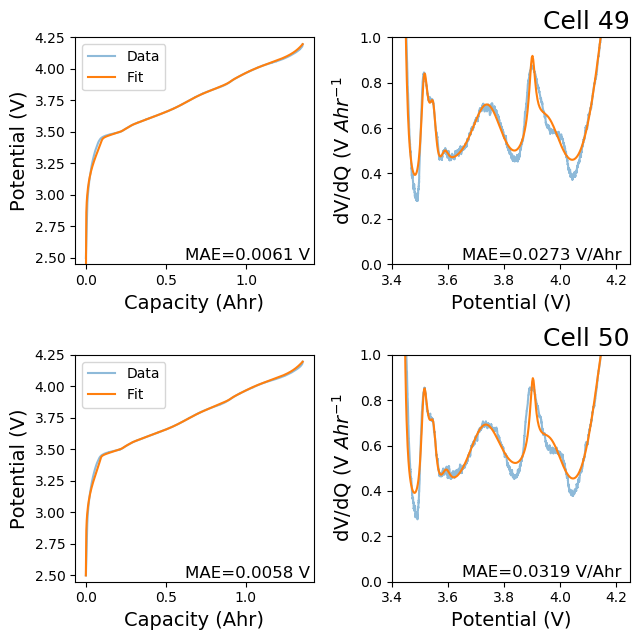

In [96]:
guess_full_600_50d = yvolt600_50d[0:(3*(nor_pos+nor_neg))]

cap600_50d, v600_50d, dqdu600_50d, dvdq600_50d = msmr.whole_cell(guess_full_600_50d, nor_pos = 6, nor_neg = 6, 
                                                                 pos_lower_li_limit = yvolt600_50d[-2], neg_lower_li_limit = yvolt600_50d[-1],
                                                                 temp = 298, pos_volt_range = (3.4, 5), neg_volt_range = (0, 1), 
                                                                 n_p = None, p_capacity = None, Qj_or_Xj='Qj',
                                                                 usable_cap = aged_600_capacity_50d.max())
# MAEs
capacity_range600_50 = np.linspace(0.0, aged_600_capacity_50d.max(), 251)
fit600_50_mae_d = msmr.mae(aged_600_voltage_50d, v600_50d, cap600_50d, aged_600_capacity_50d, capacity_range600_50)
ocv_mae_list_600 = [fit600_49_mae_d, fit600_50_mae_d]

deriv_list = [(v600_49d, -dvdq600_49d, aged_600_voltage_49d, aged_600_dvdq_49d),
              (v600_50d, -dvdq600_50d, aged_600_voltage_50d, aged_600_dvdq_50d)]

deriv_mae_list_600 = [msmr.mae(item[3], item[1], item[0], item[2], voltage_range_d) for item in deriv_list]

# Plotting
fig = plt.figure(figsize=(6.5, 6.5))
ax, ax2, ax3, ax4 = fig.add_subplot(221), fig.add_subplot(222), fig.add_subplot(223), fig.add_subplot(224)

axes, axes_left, axes_right = [ax, ax2, ax3, ax4], [ax, ax3], [ax2, ax4]
letters = ['a', 'b', 'c', 'd']
cells = ['Cell 49', 'Cell 50']

# Capacity vs OCV 
ax.plot(aged_600_capacity_49d, aged_600_voltage_49d, alpha=0.5, label='Data')
ax.plot(cap600_49d, v600_49d, label='Fit')

ax3.plot(aged_600_capacity_50d, aged_600_voltage_50d, alpha=0.5, label='Data')
ax3.plot(cap600_50d, v600_50d, label='Fit')

# OCV vs dU/dX
ax2.plot(aged_600_voltage_49d, aged_600_dvdq_49d, alpha=0.5, label='Data')
ax2.plot(v600_49d, -dvdq600_49d, label='Fit')

ax4.plot(aged_600_voltage_50d, aged_600_dvdq_50d, alpha=0.5, label='Data')
ax4.plot(v600_50d, -dvdq600_50d, label='Fit')

for idx, axe in enumerate(axes_left):
    axe.set_xlabel('Capacity (Ahr)', fontsize=14)
    axe.set_ylabel('Potential (V)', fontsize=14)
    axe.set_ylim(2.45, 4.25)
    axe.text(.62, 2.48, 'MAE=%1.4f V' %ocv_mae_list_600[idx], fontsize=12)
    axe.legend()
    
for idx, axe in enumerate(axes_right):
    axe.set_xlabel('Potential (V)', fontsize=14)
    axe.set_ylabel('dV/dQ (V $Ahr^{-1}$', fontsize=14)
    axe.set_xlim(3.4, 4.25)
    axe.set_ylim(0, 1)
    axe.text(3.65, 0.02, 'MAE=%1.4f V/Ahr' %deriv_mae_list_600[idx], fontsize=12)
    axe.set_title(cells[idx], loc='right', fontsize = 18)

fig.tight_layout()
#fig.savefig('../figures/supplementary/fit_600_replicates.png', dpi = 300)

<a id= 'Discharged-Reaction-Peaks-Over-Cycling'></a>

### Discharged - Reaction Peaks over Cycling


[Back to Top of Discharged Section](#Discharged-Fitting-Results)

[Back To Top of Notebook](#top)

Discharge Data


Text(0.5, 1.025, 'Negative Electrode')

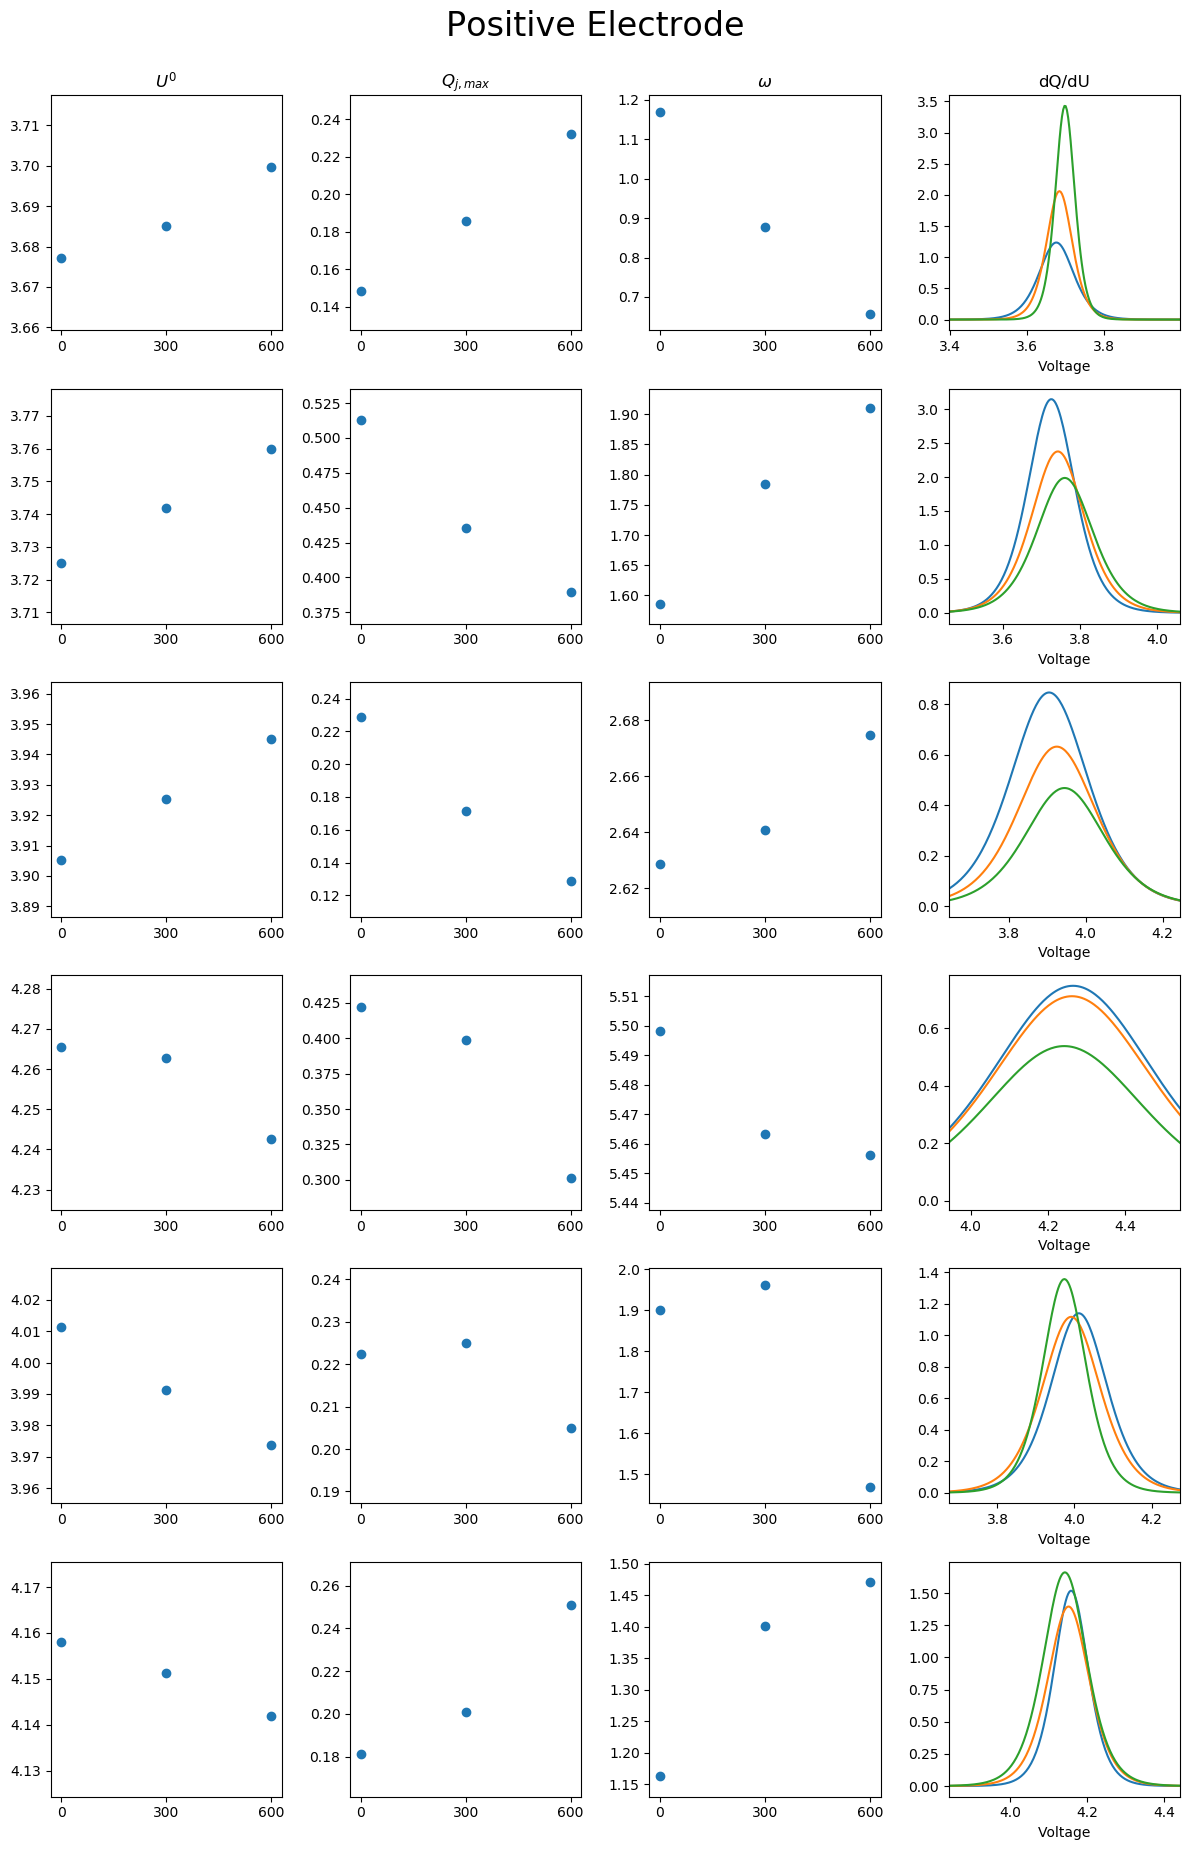

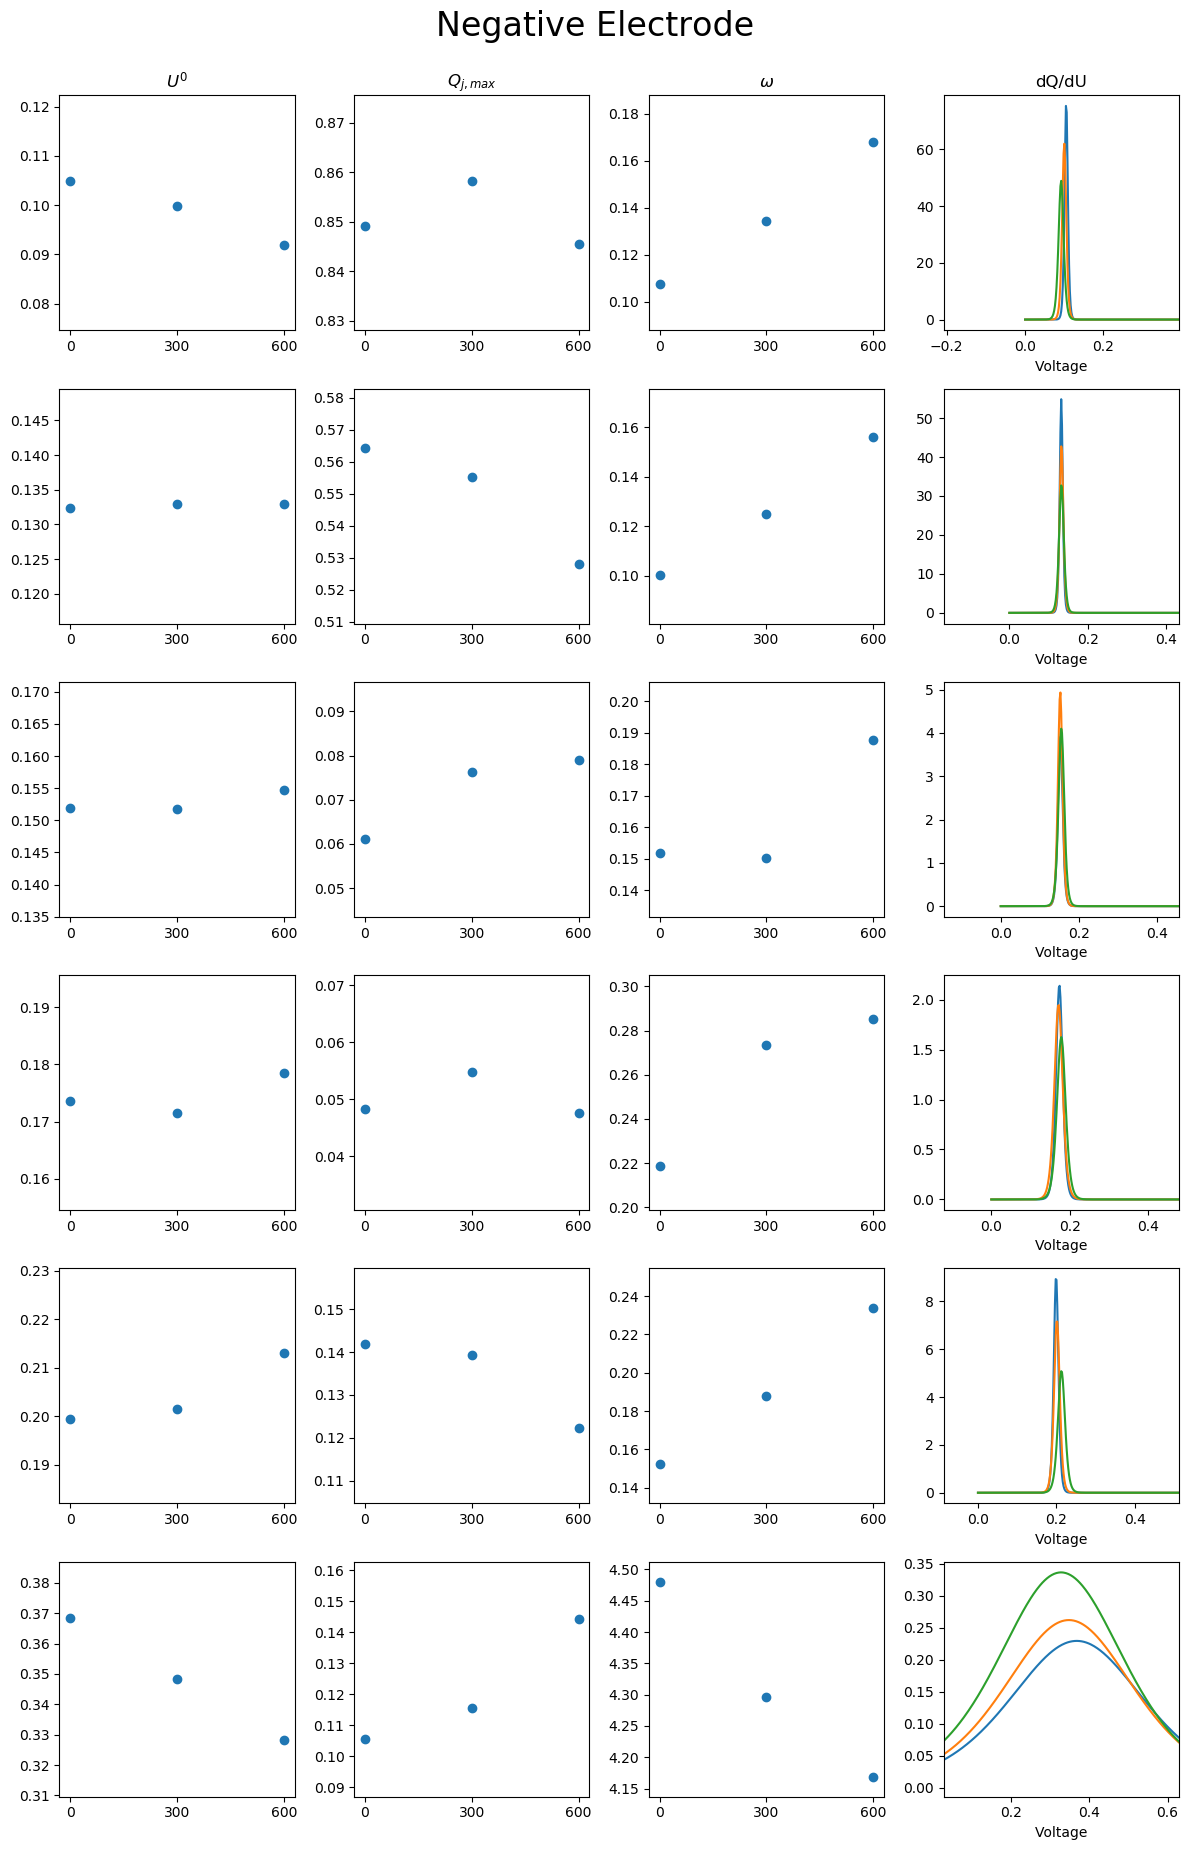

In [87]:
load_data = np.loadtxt('../supplementary-files/parameter-fits/0-300-600-discharge-fit-parameters-50-50.txt')
nor_pos, nor_neg = 6, 6                              
aged_fits = [i[0:(3*(nor_pos+nor_neg))] for i in load_data]
print('Discharge Data')

pos_parameter_lists, neg_parameter_lists = [], []
xj_pos_list, xj_neg_list = [0.27], [0.00]

# Populating with every reaction's parameters
for i in range(0,(nor_pos*3)):
    pos_parameter_lists.append([load_data[0][i], load_data[1][i], load_data[2][i]])
for i in range(0,(nor_neg*3)):
    neg_parameter_lists.append([load_data[0][(nor_pos*3)+i], load_data[1][(nor_pos*3)+i], load_data[2][(nor_pos*3)+i]])
for fit in load_data[1:]:
    xj_pos_list.append(fit[-4])
    xj_neg_list.append(fit[-3])

cycles = [0, 300, 600]
nrow, ncol = 6, 4
fig, axe = plt.subplots(figsize = (12, 18), nrows = nrow, ncols = ncol)
fig2, axe2 = plt.subplots(figsize = (12, 18), nrows = nrow, ncols = ncol)
axes, vs = [axe, axe2], [np.linspace(3.4, 5, 500), np.linspace(0, 1, 500)]
params_lists = [pos_parameter_lists, neg_parameter_lists]

for ax in axes:
    ax[0,0].set_title('$U^{0}$')
    ax[0,1].set_title('$Q_{j,max}$')
    ax[0,2].set_title('$\omega$')
    ax[0,3].set_title('dQ/dU')

for idx, parameter_lists in enumerate(params_lists):
    count_peak, count_U0, count_Xj, count_Wj = 0, 0, 1, 2
    for i in range(0, nrow):
        axes[idx][i,0].scatter(cycles, parameter_lists[count_U0]) # Plots each parameter's value
        axes[idx][i,1].scatter(cycles, parameter_lists[count_Xj])
        axes[idx][i,2].scatter(cycles, parameter_lists[count_Wj])    
        axes[idx][i,0].set_xticks([0,300,600]) # Changes all tick marks to be the max cycle numbers
        axes[idx][i,1].set_xticks([0,300,600])
        axes[idx][i,2].set_xticks([0,300,600])
        # Solves for each reaction for each of the cycles and centers the graph on the peak
        for j in range(0, len(parameter_lists[count_U0])):
            xj_rxn, dxdu_rxn = msmr.individual_reactions(vs[idx], parameter_lists[count_U0][j], 
                                                         parameter_lists[count_Xj][j], 
                                                         parameter_lists[count_Wj][j], 298)
            dxdu_rxn = np.nan_to_num(dxdu_rxn) # Changing nans to zeroes for equivalent length reasons
            center_volt = (vs[idx][np.argwhere(-dxdu_rxn == np.max(-dxdu_rxn))][0][0])
            axes[idx][i,3].plot(vs[idx], -dxdu_rxn, label = 'Cycle ' + str(cycles[j]))
            axes[idx][i,3].set_xlim(center_volt - 0.3, center_volt + 0.3)
            axes[idx][i,3].set_xlabel('Voltage')  
        count_U0 += 3
        count_Xj += 3
        count_Wj += 3
        
fig.tight_layout()
fig2.tight_layout()
fig.suptitle('Positive Electrode', fontsize=24, y = 1.025)
fig2.suptitle('Negative Electrode', fontsize=24, y = 1.025)

# fig.savefig('../figures/Figures SI/positive_electrode_reaction_peaks_over_cycling-discharge.png', dpi = 300)
# fig2.savefig('../figures/Figures SI/negative_electrode_reaction_peaks_over_cycling-discharge.png', dpi = 300)

<a id= 'Discharged-Bootstrapped-Results'></a>

### Discharged - Bootstrapped Results


[Back to Top of Discharged Section](#Discharged-Fitting-Results)

[Back To Top of Notebook](#top)

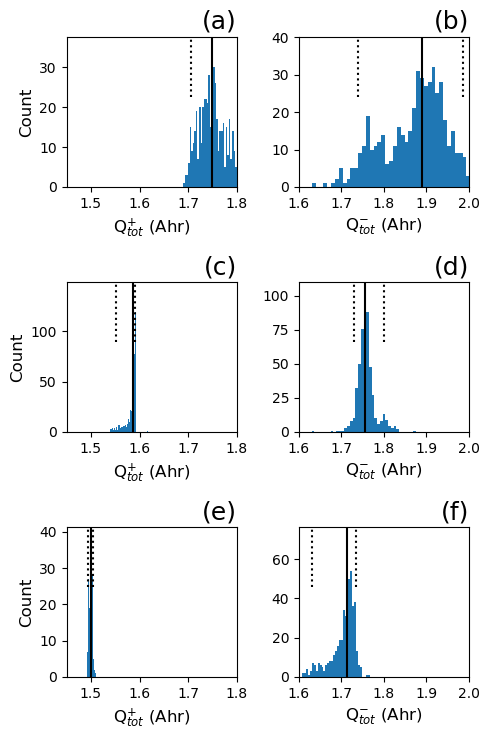

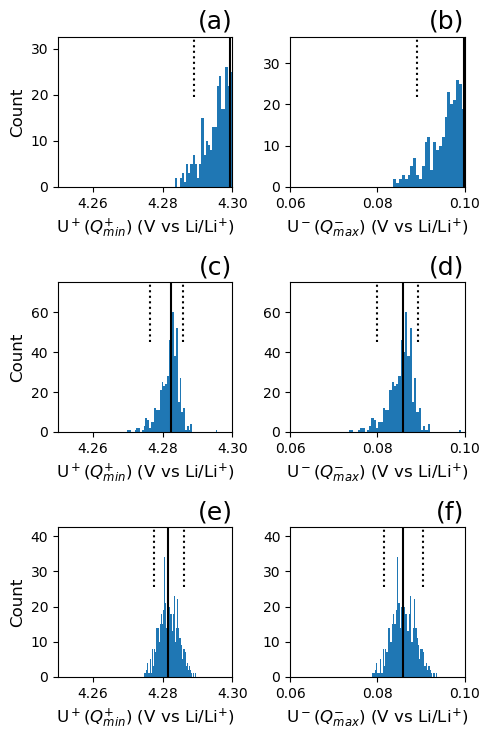

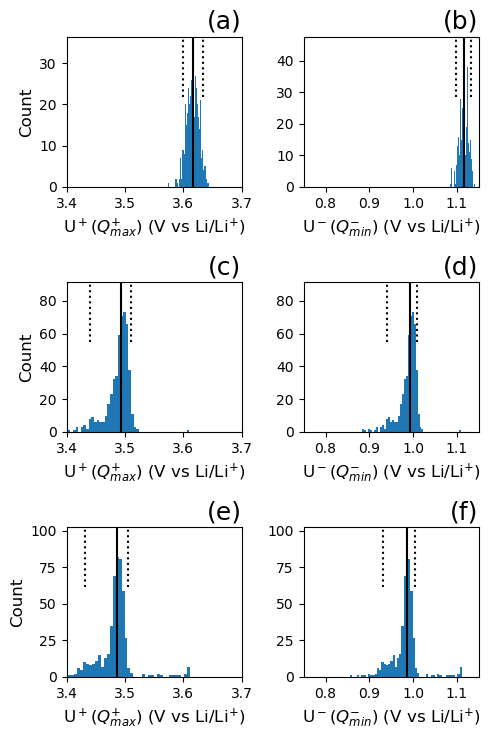

In [89]:
capacity_params = ['Qpos_d', 'Qneg_d']
base_len=2.5
fig, ax = plt.subplots(figsize=(base_len*len(capacity_params), base_len*3), nrows=3, ncols=len(capacity_params))
cells = ['cell51', 'cell1', 'cell49']
cycles = ['0 Cycles', '300 Cycles', '600 Cycles']

for j in range(0,len(capacity_params)):
    for idx, cell in enumerate(cells):
        y,x, _ = ax[idx,j].hist(bootstrap_dict[cell][capacity_params[j]], bins=50)
        ax[idx,j].axvline(x=np.median(bootstrap_dict[cell][capacity_params[j]]), color='k')
        lower_percentile = np.percentile(bootstrap_dict[cell][capacity_params[j]], 5)
        upper_percentile = np.percentile(bootstrap_dict[cell][capacity_params[j]], 95)
        ax[idx,j].plot((lower_percentile, lower_percentile), (2.25*y.max()/3, 500), color='k', ls=':')
        ax[idx,j].plot((upper_percentile, upper_percentile), (2.25*y.max()/3, 500), color='k', ls=':')
        ax[idx,j].set_ylim(0, y.max()*1.25)
    
for i in range(0,3):
    ax[i,0].set_xlabel("Q$_{tot}^{+}$ (Ahr)", fontsize=12)
    ax[i,0].set_xlim(1.45, 1.8)
    ax[i,1].set_xlabel("Q$_{tot}^{-}$ (Ahr)", fontsize=12)
    ax[i,1].set_xlim(1.6, 2.0)
    ax[i,0].set_ylabel('Count', fontsize=12)

ax[0,0].set_title('(a)', loc='right', fontsize = 18)
ax[0,1].set_title('(b)', loc='right', fontsize = 18)
ax[1,0].set_title('(c)', loc='right', fontsize = 18)
ax[1,1].set_title('(d)', loc='right', fontsize = 18)
ax[2,0].set_title('(e)', loc='right', fontsize = 18)
ax[2,1].set_title('(f)', loc='right', fontsize = 18)    

plt.tight_layout()
#fig.savefig('../figures/Figures SI/qtot_histograms.png', dpi = 300, bbox_inches='tight')

top_of_charge_params = ['pos_Umax_d', 'neg_Umin_d']
base_len=2.5
fig, ax = plt.subplots(figsize=(base_len*len(top_of_charge_params), base_len*3), nrows=3, ncols=len(capacity_params))
cells = ['cell51', 'cell1', 'cell49']
cycles = ['0 Cycles', '300 Cycles', '600 Cycles']

for j in range(0,len(top_of_charge_params)):
    for idx, cell in enumerate(cells):
        y,x, _ = ax[idx,j].hist(bootstrap_dict[cell][top_of_charge_params[j]], bins=50)
        ax[idx,j].axvline(x=np.median(bootstrap_dict[cell][top_of_charge_params[j]]), color='k')
        lower_percentile = np.percentile(bootstrap_dict[cell][top_of_charge_params[j]], 5)
        upper_percentile = np.percentile(bootstrap_dict[cell][top_of_charge_params[j]], 95)
        ax[idx,j].plot((lower_percentile, lower_percentile), (2.25*y.max()/3, 500), color='k', ls=':')
        ax[idx,j].plot((upper_percentile, upper_percentile), (2.25*y.max()/3, 500), color='k', ls=':')
        ax[idx,j].set_ylim(0, y.max()*1.25)
    
for i in range(0,3):
    ax[i,0].set_xlabel('U$^+$($Q_{min}^{+}$) (V vs Li/Li$^{+}$)', fontsize=12)
    ax[i,1].set_xlabel('U$^-$($Q_{max}^{-}$) (V vs Li/Li$^{+}$)', fontsize=12)
    ax[i,0].set_xlim(4.25, 4.3)
    ax[i,1].set_xlim(0.06, 0.1)
    ax[i,0].set_ylabel('Count', fontsize=12)
    
ax[0,0].set_title('(a)', loc='right', fontsize = 18)
ax[0,1].set_title('(b)', loc='right', fontsize = 18)
ax[1,0].set_title('(c)', loc='right', fontsize = 18)
ax[1,1].set_title('(d)', loc='right', fontsize = 18)
ax[2,0].set_title('(e)', loc='right', fontsize = 18)
ax[2,1].set_title('(f)', loc='right', fontsize = 18)

plt.tight_layout()
#fig.savefig('../figures/Figures SI/top_of_charge_hists.png', dpi = 300, bbox_inches='tight')

bot_of_discharge_params = ['pos_Umin_d', 'neg_Umax_d']
base_len=2.5
fig, ax = plt.subplots(figsize=(base_len*len(top_of_charge_params), base_len*3), nrows=3, ncols=len(capacity_params))
cells = ['cell51', 'cell1', 'cell49']
cycles = ['0 Cycles', '300 Cycles', '600 Cycles']

for j in range(0,len(bot_of_discharge_params)):
    for idx, cell in enumerate(cells):
        y,x, _ = ax[idx,j].hist(bootstrap_dict[cell][bot_of_discharge_params[j]], bins=50)
        ax[idx,j].axvline(x=np.median(bootstrap_dict[cell][bot_of_discharge_params[j]]), color='k')
        lower_percentile = np.percentile(bootstrap_dict[cell][bot_of_discharge_params[j]], 5)
        upper_percentile = np.percentile(bootstrap_dict[cell][bot_of_discharge_params[j]], 95)
        ax[idx,j].plot((lower_percentile, lower_percentile), (2.25*y.max()/3, 500), color='k', ls=':')
        ax[idx,j].plot((upper_percentile, upper_percentile), (2.25*y.max()/3, 500), color='k', ls=':')
        ax[idx,j].set_ylim(0, y.max()*1.25)
    
for i in range(0,3):
    ax[i,0].set_xlabel('U$^+$($Q_{max}^{+}$) (V vs Li/Li$^{+}$)', fontsize=12)
    ax[i,1].set_xlabel('U$^-$($Q_{min}^{-}$) (V vs Li/Li$^{+}$)', fontsize=12)
    ax[i,0].set_xlim(3.4, 3.7)
    ax[i,1].set_xlim(0.75, 1.15)
    ax[i,0].set_ylabel('Count', fontsize=12)
    
ax[0,0].set_title('(a)', loc='right', fontsize = 18)
ax[0,1].set_title('(b)', loc='right', fontsize = 18)
ax[1,0].set_title('(c)', loc='right', fontsize = 18)
ax[1,1].set_title('(d)', loc='right', fontsize = 18)
ax[2,0].set_title('(e)', loc='right', fontsize = 18)
ax[2,1].set_title('(f)', loc='right', fontsize = 18)

plt.tight_layout()
#fig.savefig('../figures/Figures SI/bot_of_discharge.png', dpi = 300, bbox_inches='tight')

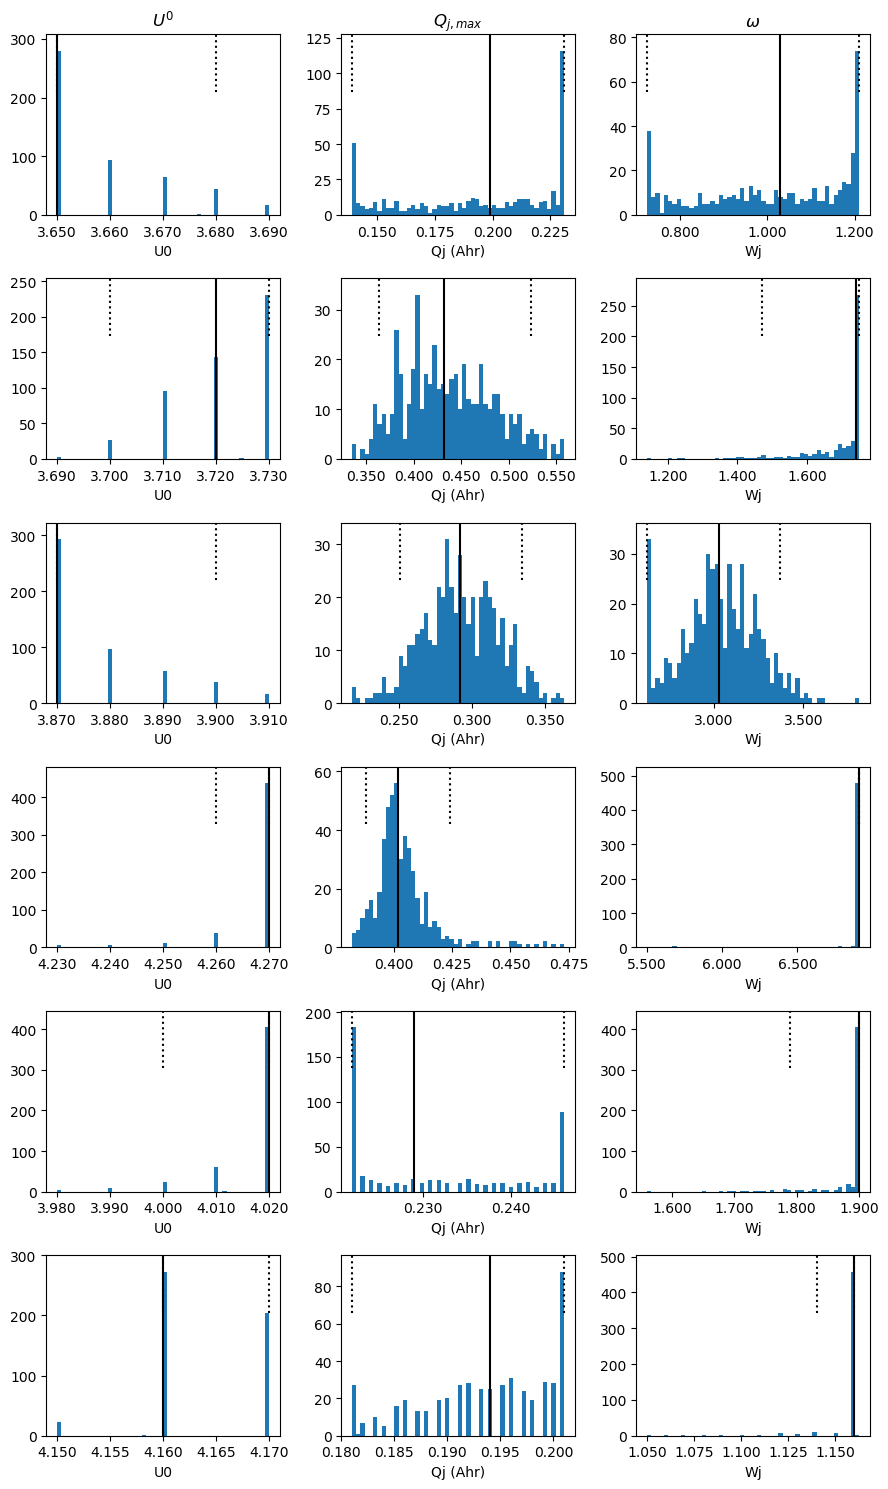

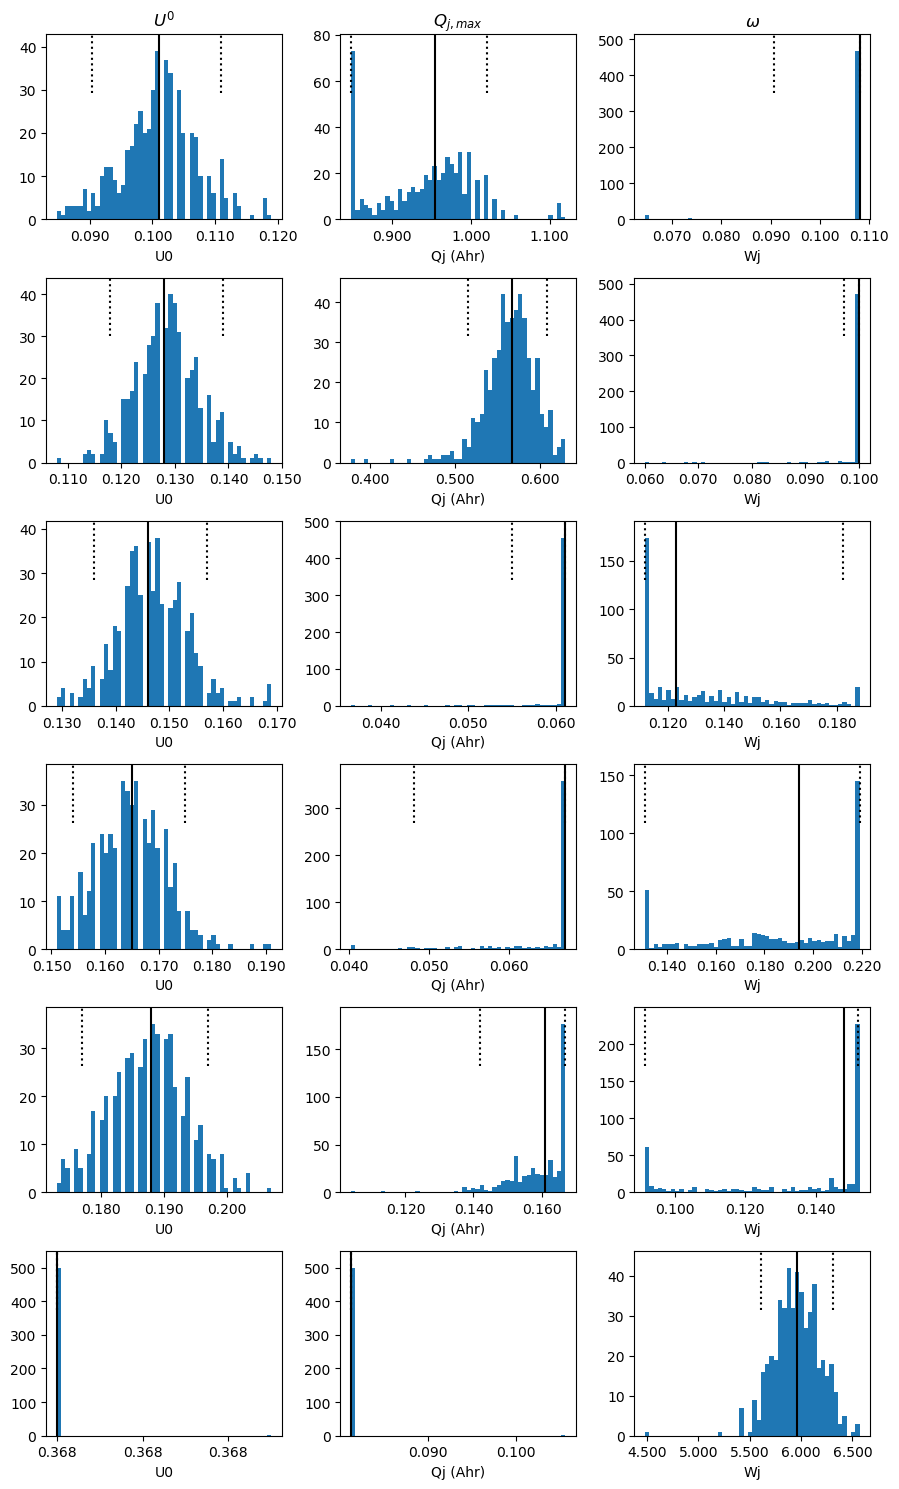

In [93]:
pos_0_fig_d, pos_0_modes_d = mp.plot_parameters_bootstrap(bootstrap_dict['cell51']['bootstrap_data_d'], 'pos', True)
neg_0_fig_d, neg_0_modes_d = mp.plot_parameters_bootstrap(bootstrap_dict['cell51']['bootstrap_data_d'], 'neg', True)

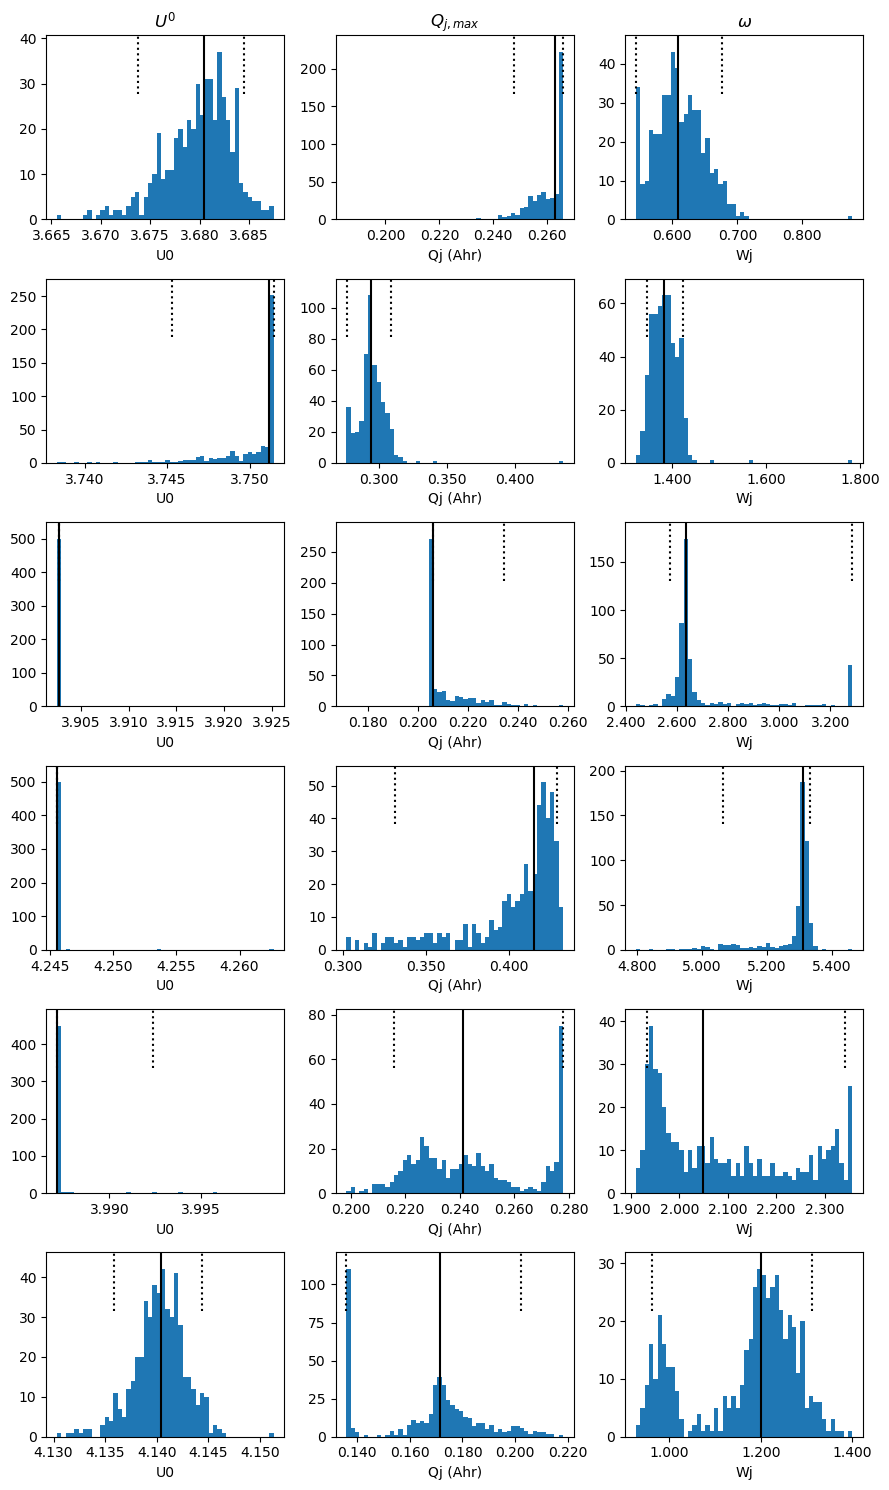

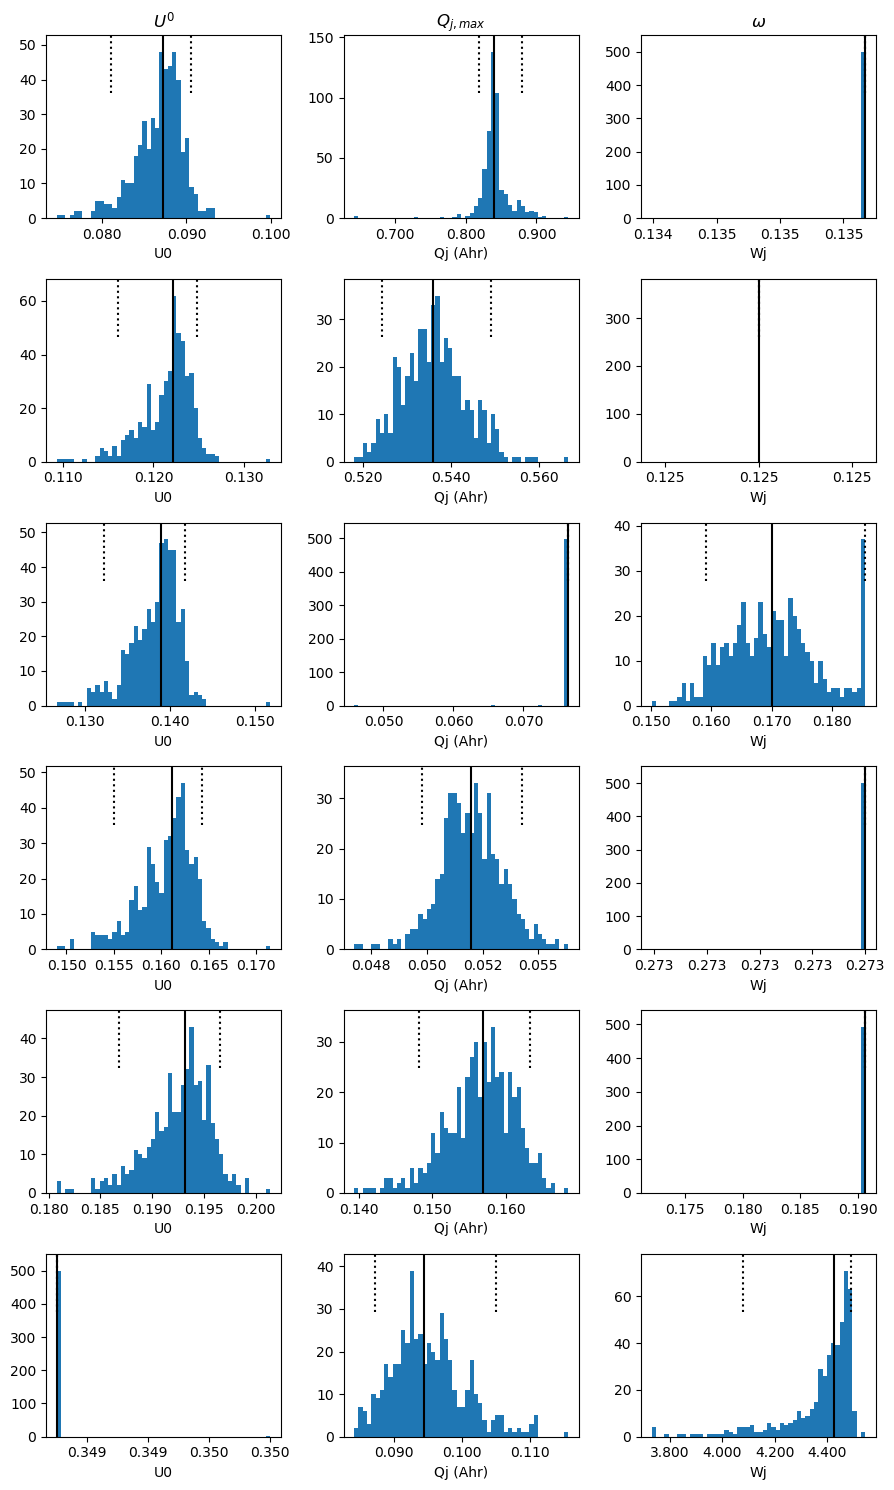

In [94]:
pos_300_fig_d, pos_300_modes_d = mp.plot_parameters_bootstrap(bootstrap_dict['cell1']['bootstrap_data_d'], 'pos', True)
neg_300_fig_d, neg_300_modes_d = mp.plot_parameters_bootstrap(bootstrap_dict['cell1']['bootstrap_data_d'], 'neg', True)

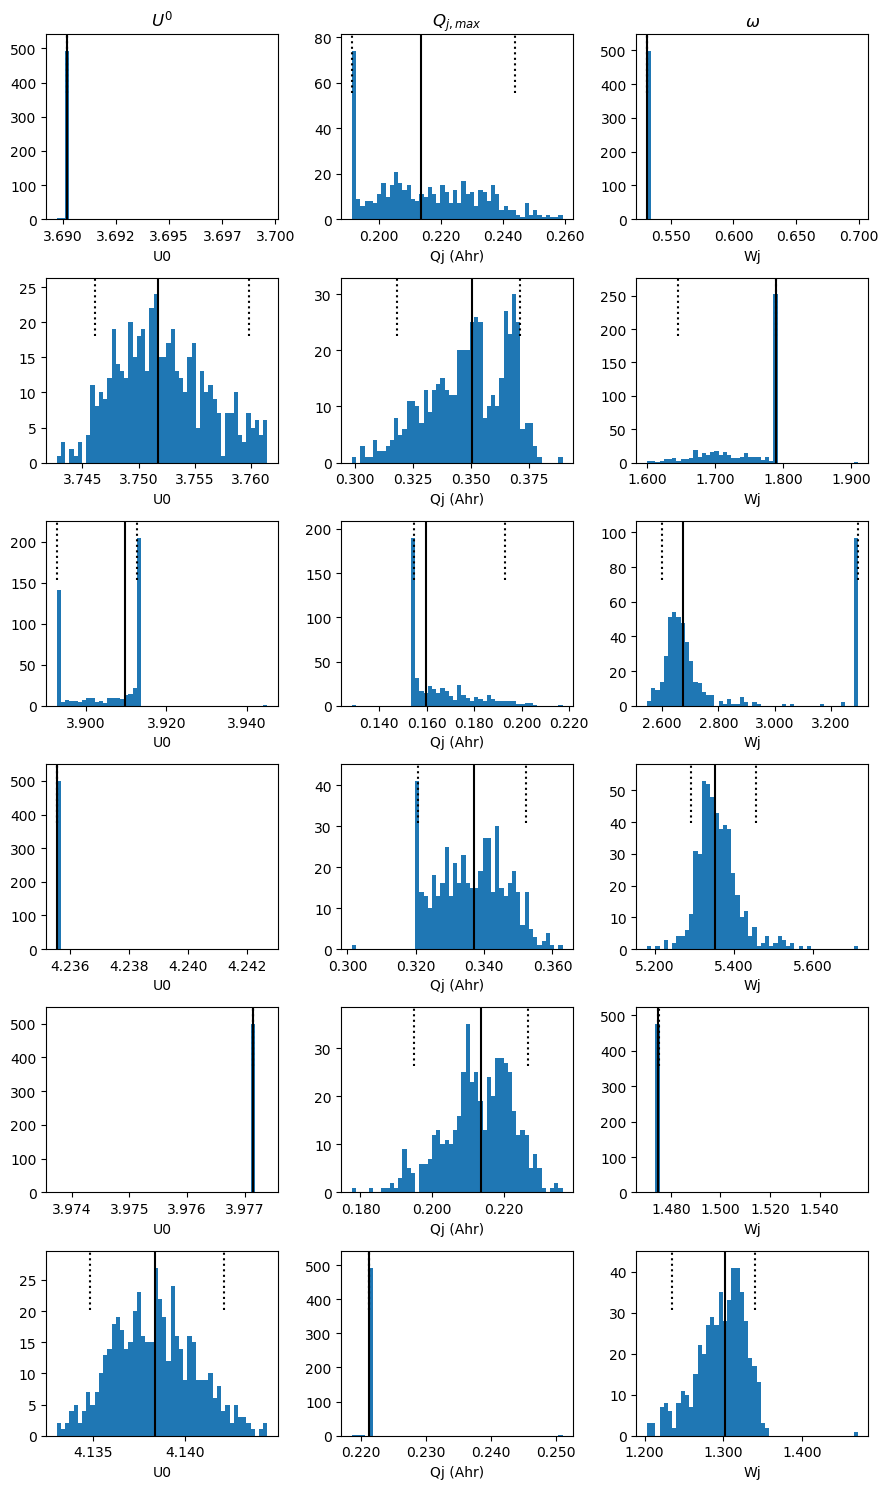

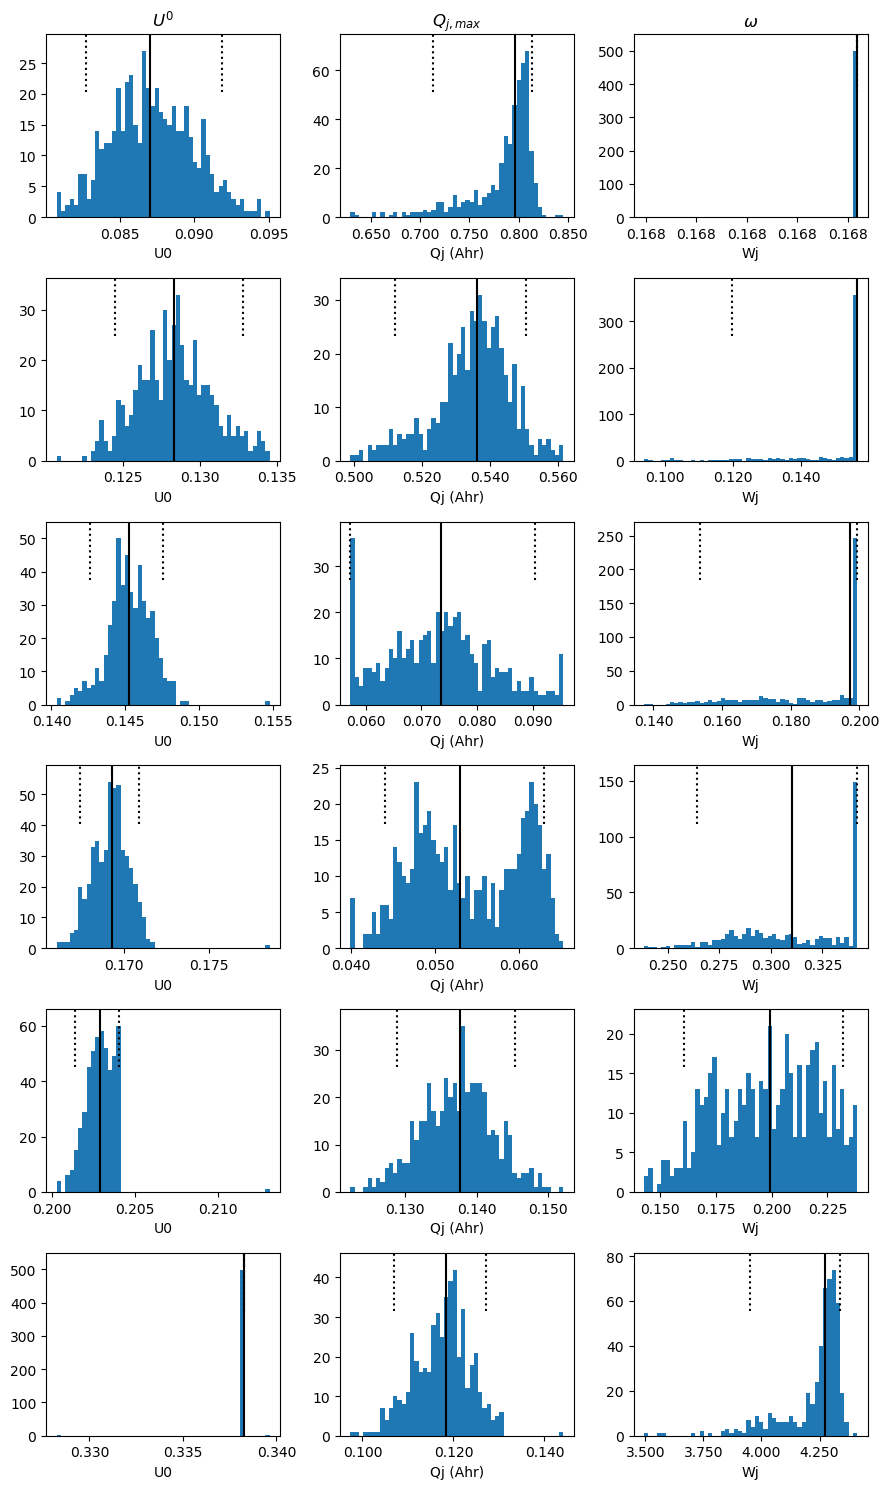

In [95]:
pos_600_fig_d, pos_600_modes_d = mp.plot_parameters_bootstrap(bootstrap_dict['cell49']['bootstrap_data_d'], 'pos', True)
neg_600_fig_d, neg_600_modes_d = mp.plot_parameters_bootstrap(bootstrap_dict['cell49']['bootstrap_data_d'], 'neg', True)

In [85]:
# Saving all the histogram figures
pos_0_fig_d.savefig('../figures/Figures SI/bootstrap/pos_0d_bootstrap.png', dpi = 300)
neg_0_fig_d.savefig('../figures/Figures SI/bootstrap/neg_0d_bootstrap.png', dpi = 300)
pos_300_fig_d.savefig('../figures/Figures SI/bootstrap/pos_300d_bootstrap.png', dpi = 300)
neg_300_fig_d.savefig('../figures/Figures SI/bootstrap/neg_300d_bootstrap.png', dpi = 300)
pos_600_fig_d.savefig('../figures/Figures SI/bootstrap/pos_600d_bootstrap.png', dpi = 300)
neg_600_fig_d.savefig('../figures/Figures SI/bootstrap/neg_600d_bootstrap.png', dpi = 300)